In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import shap
import openpyxl

/Users/lingqimeng/opt/anaconda3/lib/python3.9/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/Users/lingqimeng/opt/anaconda3/lib/python3.9/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_

In [2]:
df_clin = pd.read_excel('../Processed data copy 6/Clinic.xlsx', sheet_name='TC1', header=0)
df_clin = df_clin.drop(columns=['ADAS-COG', 'Mini Mental', 'SEX', 'Age', 'Cigarette'])
df_clin['ADAS group'] = df_clin['ADAS group'].replace({'Low': 0, 'Medium': 1, 'High': 2})
df_clin

Patient ID  ADAS group    HB   HCT   RBC   WBC  Platelet  Neutrophil%  \
0     TR10001           1  13.6  40.0  4.75  7.32       224         69.2   
1     TR10002           2  11.2  33.7  3.92  5.70        80         56.1   
2     TR10004           2  11.9  36.3  4.42  8.43       225         72.2   
3     TR10005           2  13.1  38.5  4.76  5.28       195         60.9   
4     TR10006           1  13.0  35.7  4.21  5.67       229         58.4   
..        ...         ...   ...   ...   ...   ...       ...          ...   
82    TR20109           0  11.9  36.0  4.47  8.13       190         65.5   
83    TR20114           1  11.9  37.7  5.47  7.17       203         64.1   
84    TR20117           2  12.2  38.5  3.83  8.45       333         66.7   
85    TR20118           1  12.8  39.2  4.79  6.07       223         52.9   
86    TR20119           0  15.0  42.5  4.56  5.11       166         58.7   

    Lymphocyte%  Monocyte%  ...  HbA1c   TSH  Diastolic blood pressure (mmHg)  \
0          22.3        7.2  ...   5.58  1.58                             79.0   
1          34.2        7.2  ...   5.19  3.02                             70.0   
2          18.3        7.5  ...   6.85  2.65                             80.0   
3          28.8        8.0  ...   5.79  2.17                             68.0   
4          31.0        5.8  ...   6.08  3.57                             80.0   
..          ...        ...  ...    ...   ...                              ...   
82         19.4       11.1  ...   5.67  0.88                             78.0   
83         25.5        8.5  ...   6.50  1.07                             81.0   
84         22.0        8.2  ...   5.05  0.52                             79.0   
85         34.3        9.1  ...   6.08  1.09                             74.0   
86         28.6       12.1  ...   5.73  0.59                             70.0   

    Sistolic blood pressure (mmHg)  Pulse (beats per minute)  \
0                            141.0                      58.0   
1                            120.0                      67.0   
2                            140.0                      72.0   
3                            125.0                      65.0   
4                            130.0                      74.0   
..                             ...                       ...   
82                           171.0                      66.0   
83                           166.0                      52.0   
84                           122.0                      81.0   
85                           145.0                      70.0   
86                           128.0                      61.0   

    Waist circumference (cm)  Hip circumference (cm)  Weight  Height    BMI  
0                      106.0                   112.0    76.0   170.0  26.30  
1                       79.0                    93.0    50.6   152.0  21.60  
2                      142.0                   150.0   135.0   170.0  46.71  
3                       74.0                    94.0    60.0   159.0  23.70  
4                       87.0                   101.0    61.0   149.0  27.40  
..                       ...                     ...     ...     ...    ...  
82                      95.0                    93.0    70.0   164.0  26.03  
83                      89.0                    96.0    67.0   154.0  28.25  
84                      71.0                    85.0    55.0   158.0  22.03  
85                     112.0                   133.0   110.0   159.0  43.51  
86                     107.0                   103.0    83.0   158.0  33.25  

[87 rows x 45 columns]

In [3]:
df_clin_5 = df_clin[['Patient ID', 'Triglycerides', 'HbA1c', 'Insulin', 'ALT', 'Platelet']]
df_clin_5

Patient ID  Triglycerides  HbA1c  Insulin   ALT  Platelet
0     TR10001           98.4   5.58     9.19  18.4       224
1     TR10002          101.2   5.19     2.76  12.5        80
2     TR10004          155.1   6.85    25.74  20.1       225
3     TR10005           58.5   5.79     2.99  14.3       195
4     TR10006          240.8   6.08     6.74  10.7       229
..        ...            ...    ...      ...   ...       ...
82    TR20109           95.0   5.67    19.77  19.0       190
83    TR20114          265.0   6.50    25.16  19.0       203
84    TR20117          117.0   5.05    16.12  20.0       333
85    TR20118           56.0   6.08    20.00  16.0       223
86    TR20119          242.0   5.73   160.95  13.0       166

[87 rows x 6 columns]

In [4]:
df_prot = pd.read_excel('../Processed data copy 6/Proteomics.xlsx', sheet_name = 'Patients')
df_prot = df_prot.drop(columns='ADAS group')
for item in list(df_prot.columns)[1:]:
    df_prot = df_prot.rename(columns={item: item.split('-')[0]})
df_prot

Patient ID    AARSD1   ABHD14B      ABL1     ACAA1      ACAN      ACE2  \
0     TR10001  3.348122  2.089108  0.413531 -0.156888 -0.336284  0.634362   
1     TR10002  1.867629  0.604588  0.166621 -0.820185  0.089733 -0.769731   
2     TR10004  2.043374  0.890614  0.335164  0.955768 -0.337980 -0.156509   
3     TR10005  2.121647  0.896753 -0.047804  0.914253  0.066355 -0.783626   
4     TR10006  2.229805  1.502206  0.465384  1.007255  0.382988 -0.850165   
..        ...       ...       ...       ...       ...       ...       ...   
82    TR20109  1.148678 -0.224329  0.207832 -1.105452 -0.528310 -1.187916   
83    TR20114  2.359354  0.450822  0.295676 -0.567301  0.188415 -0.653191   
84    TR20117  2.370572  0.345284  0.306626 -0.992846 -0.243559 -0.329365   
85    TR20118  1.700289  0.571034  0.790621 -0.832900 -0.555561 -0.801762   
86    TR20119  2.366784  0.541257 -0.575212 -0.212589 -0.075719  0.098934   

       ACOX1      ACP5      ACP6  ...     WNT9A      WWP2      XCL1        XG  \
0  -0.607463 -0.700799  0.620113  ... -0.145817 -0.989140  0.140783  0.545180   
1  -1.213938 -0.370926  0.324367  ...  0.291190 -1.686025 -0.508594  0.897293   
2  -1.592354 -0.008296  0.299340  ... -0.393919 -1.580078  0.582005  1.227334   
3  -0.862757  0.642352 -2.156880  ... -0.283300 -1.440843  0.727752  0.982803   
4  -1.564609 -0.238950  0.917961  ...  0.552320 -1.525864  1.169178  2.142708   
..       ...       ...       ...  ...       ...       ...       ...       ...   
82 -0.856719 -0.219365 -0.235988  ... -0.643115 -0.829351 -0.277863  0.977557   
83 -1.721504 -0.052289  0.619684  ... -0.614396 -1.249825 -0.427443  0.123821   
84 -0.922646  0.006244 -0.842992  ... -0.089216 -0.121354 -0.647297  0.331869   
85 -0.337482 -0.477756 -1.578042  ... -0.853493  0.164177  0.312608  0.753733   
86 -1.131422 -0.196747 -0.460507  ... -0.626203 -1.209445  1.172407 -0.039690   

     XPNPEP2     XRCC4      YES1    YTHDF3    ZBTB16    ZBTB17  
0   0.114860 -0.846528  0.481248  1.176901 -0.468632  0.451749  
1  -0.827149 -0.992737 -0.108829 -0.071031 -0.716202 -0.130863  
2  -1.591022 -0.665404  0.339130 -0.666462 -0.563579 -0.052376  
3  -0.267838 -0.779878  0.357967 -0.208829 -0.953239  0.203797  
4  -1.042898 -0.205235  0.140026  1.571458 -0.369312 -0.060027  
..       ...       ...       ...       ...       ...       ...  
82 -0.083820 -1.289822  1.031551 -0.332707 -0.469750 -0.227354  
83 -1.330313 -0.207028  0.725297 -0.057603 -0.371245  0.826454  
84 -2.252237 -0.854466  0.602938  1.031638 -0.705541  0.512836  
85  0.195738 -1.332759  1.439957 -0.767886 -0.788424 -0.353426  
86 -0.848920 -0.848899  0.118978 -0.164106 -1.339584 -0.217672  

[87 rows x 1473 columns]

In [5]:
df_prot_5 = df_prot[['Patient ID', 'SKAP1', 'NEFL', 'VPS37A', 'CALCOCO1', 'SF3B4']]
df_prot_5

Patient ID     SKAP1      NEFL    VPS37A  CALCOCO1     SF3B4
0     TR10001  0.254943  1.620564  0.774902  1.645330  0.559237
1     TR10002 -1.172754  1.982978 -0.139719  0.509157 -0.325158
2     TR10004 -1.024170  0.758606  0.067113  0.652692 -0.564921
3     TR10005 -0.830571  2.042521  0.033330  0.540236 -0.785552
4     TR10006 -0.556417  2.235996 -0.289689  0.394784  0.011732
..        ...       ...       ...       ...       ...       ...
82    TR20109 -0.454012  1.323059  0.968984  2.019549  0.152537
83    TR20114 -1.145806  1.655306 -0.005680  1.797705 -0.623701
84    TR20117 -0.650133  1.662699 -0.165868  0.764285  0.549589
85    TR20118 -0.183088 -0.494665  0.663273  1.777455  0.061858
86    TR20119 -0.551578  1.169439  0.958988  0.578310 -0.717013

[87 rows x 6 columns]

In [6]:
df_meta = pd.read_excel('../Processed data copy 6/Metabolomics.xlsx', sheet_name = 'Patients')
df_meta = df_meta.drop(columns=['PATIENT_SAMPLE_NAME', 'ADAS group'])
annotation = pd.read_excel('../Processed data copy 6/Metabolomics.xlsx', sheet_name = 'Chemical Annotation')

for item in list(df_meta.columns)[1:]:
    df_meta = df_meta.rename(columns={item: list(annotation[annotation['CHEM_ID']==item]['CHEMICAL_NAME'])[0]})  
df_meta

Patient ID  S-1-pyrroline-5-carboxylate  spermidine  1-methylnicotinamide  \
0     TR10001                     1.876385    1.499106              1.412571   
1     TR10002                     0.870135    0.335634              0.697246   
2     TR10004                     1.219075    0.547764              1.086736   
3     TR10005                     0.601068    1.066200              1.000000   
4     TR10006                     1.366418    0.497218              0.535672   
..        ...                          ...         ...                   ...   
82    TR20109                     1.449280    0.204549              0.689665   
83    TR20114                     1.258668    0.367133              0.388669   
84    TR20117                     1.993822    0.816452              0.183912   
85    TR20118                     1.311518    0.526193              0.639411   
86    TR20119                     2.389734    0.498000              0.283965   

    12,13-DiHOME  5-hydroxyindoleacetate  alpha-ketoglutarate  kynurenate  \
0       0.136451                1.797723             0.908777    1.494606   
1       0.136451                0.803716             1.021230    0.637586   
2       0.389284                1.041555             1.287757    1.570575   
3       0.289884                0.741918             1.286097    0.841365   
4       0.136451                0.781970             1.007700    1.213698   
..           ...                     ...                  ...         ...   
82      0.423149                1.383087             0.729367    1.395249   
83      3.093534                2.505797             1.358014    0.946663   
84      3.799280                1.038946             1.269430    0.886950   
85      0.903282                1.036529             1.642919    1.072515   
86      9.473822                1.424170             1.078162    1.283437   

    3-hydroxyisobutyrate  3-hydroxy-3-methylglutarate  ...  \
0               0.782101                     1.703375  ...   
1               0.103553                     0.861881  ...   
2               1.115286                     1.232927  ...   
3               0.103553                     0.842491  ...   
4               0.647549                     0.906098  ...   
..                   ...                          ...  ...   
82              0.529066                     1.884917  ...   
83              0.589195                     1.555436  ...   
84              0.865824                     1.690073  ...   
85              0.742731                     1.104487  ...   
86              1.385246                     2.618115  ...   

    bilirubin degradation product, C17H18N2O4 (3)**  \
0                                          2.454370   
1                                          1.727515   
2                                          1.768236   
3                                          2.282074   
4                                          1.755832   
..                                              ...   
82                                         0.247930   
83                                         2.078415   
84                                         5.061167   
85                                         1.797961   
86                                         5.128252   

    bilirubin degradation product, C17H20N2O5 (1)**  \
0                                          3.669768   
1                                          1.865731   
2                                          1.701329   
3                                          2.101596   
4                                          1.071725   
..                                              ...   
82                                         0.407992   
83                                         1.455224   
84                                         2.678298   
85                                         1.474107   
86                                         5.253377   

    bilirubin degradation product, C17H20N2O5 (2)*

In [7]:
df_meta_5 = df_meta[['Patient ID', '1-stearoyl-2-linoleoyl-GPC (18:0/18:2)*', 'homovanillate (HVA)', 
                   'threonate', 'glutamate', '1-palmitoyl-2-dihomo-linolenoyl-GPC (16:0/20:3n3 or 6)*']]
df_meta_5

Patient ID  1-stearoyl-2-linoleoyl-GPC (18:0/18:2)*  homovanillate (HVA)  \
0     TR10001                                 0.815497             0.944356   
1     TR10002                                 0.995060             1.281449   
2     TR10004                                 0.930108             1.098934   
3     TR10005                                 0.963534             0.764781   
4     TR10006                                 0.947517             1.011811   
..        ...                                      ...                  ...   
82    TR20109                                 0.972443             1.429295   
83    TR20114                                 1.029693             5.096218   
84    TR20117                                 0.841919             0.662591   
85    TR20118                                 1.032885             1.152491   
86    TR20119                                 0.887101             1.393939   

    threonate  glutamate  \
0    0.380387   0.784579   
1    0.394439   0.299928   
2    0.063985   1.337426   
3    0.272601   0.625480   
4    0.364192   0.560598   
..        ...        ...   
82   1.768192   0.791710   
83   0.063985   0.850174   
84   1.696589   0.754903   
85   1.128618   0.678475   
86   0.482618   1.344511   

    1-palmitoyl-2-dihomo-linolenoyl-GPC (16:0/20:3n3 or 6)*  
0                                            1.001860        
1                                            0.878575        
2                                            1.078271        
3                                            0.537569        
4                                            0.936560        
..                                                ...        
82                                           1.261534        
83                                           1.246628        
84                                           1.097283        
85                                           1.093587        
86                                           1.051572        

[87 rows x 6 columns]

In [8]:
# find all files under given directory
####  we only need to change this one line
directory = '/Users/lingqimeng/Downloads/AD gut metaphlan 4/'
arr = os.listdir(directory)

try:
    arr.remove('.DS_Store')
except:
    pass

arr.sort()

df_gut = pd.DataFrame([], columns = ['X.clade_name'])

for i in range(0, len(arr)):
    temp = pd.read_excel(directory+arr[i])
    temp = temp.rename(columns = {'#clade_name':'X.clade_name'})
    df_gut = df_gut.merge(temp, on = "X.clade_name", how = 'outer')
    df_gut = df_gut.rename(columns = {'relative_abundance': arr[i].split('_')[1]})
    
droprows = []
for i in range(0, len(df_gut)):
    if df_gut['X.clade_name'][i].split('|')[-1][0] != 's' or df_gut['X.clade_name'][i].split('|')[0].split('__')[-1] != 'Bacteria':
        droprows.append(i)
df_gut = df_gut.drop(droprows)
df_gut = df_gut.reset_index(drop=True)

df_gut = df_gut[df_gut.isnull().sum(axis=1) < 0.8*(df_gut.shape[1]-1)]
df_gut = df_gut.reset_index(drop=True)
df_gut = df_gut.fillna(0)

temp = df_gut.set_index('X.clade_name').T.reset_index()
temp.columns.name = None
temp = temp.rename(columns={"index": "Patient ID"})
for item in list(temp.columns):
    temp = temp.rename(columns={item: item.split('|')[-1].split('__')[-1]})
df_gut = temp

df_gut

Patient ID  Bacteroides_uniformis  Collinsella_aerofaciens  \
0     TR10001                0.95778                  0.04355   
1     TR10002                2.00536                  0.94489   
2     TR10004                0.11030                 11.05348   
3     TR10005                0.65023                  0.39225   
4     TR10006                5.43565                  1.11656   
..        ...                    ...                      ...   
73    TR20109                0.84613                  0.00000   
74    TR20114                0.02329                  0.49273   
75    TR20117                0.06909                  0.21546   
76    TR20118                0.14866                  0.67828   
77    TR20119                0.03464                  0.51037   

    Clostridium_sp_AF15_49  Eubacterium_rectale  Blautia_wexlerae  \
0                  0.13831              1.75240           1.63963   
1                  0.33112              0.02925           0.26896   
2                  0.00000              0.25988           0.31249   
3                  0.00000              0.15288           0.66535   
4                  0.00000              3.99766           0.57139   
..                     ...                  ...               ...   
73                 1.03524              0.22688           0.39653   
74                 0.03866              0.20158           0.03041   
75                 0.06547              0.01561           0.19808   
76                 0.12151              0.01209           0.46359   
77                 0.33392              2.59091           1.08688   

    Bilophila_wadsworthia  Blautia_sp_AF19_10LB  \
0                 0.05469               1.20515   
1                 0.55387               0.12181   
2                 0.29458               0.00000   
3                 0.26426               0.36313   
4                 0.41074               0.12876   
..                    ...                   ...   
73                0.21322               0.06484   
74                0.31541               0.00334   
75                0.15679               0.05215   
76                0.09113               0.02813   
77                0.06517               0.17904   

    Fusicatenibacter_saccharivorans  Phocaeicola_vulgatus  ...  \
0                           2.52749              12.12145  ...   
1                           0.48199               5.17690  ...   
2                           0.52771               0.43339  ...   
3                           0.23698              10.86928  ...   
4                           2.45223               4.48492  ...   
..                              ...                   ...  ...   
73                          4.81905               0.00000  ...   
74                          0.02718               0.11424  ...   
75                          0.01433               0.10728  ...   
76                          0.64848               0.56544  ...   
77                          0.33607               0.00770  ...   

    GGB9291_SGB14248  Mitsuokella_jalaludinii  Clostridium_SGB4751  \
0            0.00000                  0.00000              0.00000   
1            0.00000                  0.00000              0.00000   
2            0.00000                  0.00000              0.00000   
3            0.00000                  0.00000              0.00000   
4            0.00000                  0.00000              0.00000   
..               ...                      ...                  ...   
73           0.00000                  0.00000              0.04976   
74           0.00000                  0.00697              0.00000   
75           0.19531                  0.00000              0.00096   
76           0.00000                  0.00000              0.01296   
77           0.03581                  0.00000              0.00474   

    Prevotella_sp_885  Holdemanella_biformis  Clostridia_unclassified_SGB3983  \
0             0.00000                0.00000                     

In [9]:
df_gut_5 = df_gut[['Patient ID', 'Paraprevotella_clara', 'Phocaeicola_dorei', 'Bacteroides_fragilis', 'Mitsuokella_jalaludinii', 'Clostridium_SGB6179']]
df_gut_5

Patient ID  Paraprevotella_clara  Phocaeicola_dorei  Bacteroides_fragilis  \
0     TR10001               0.01095            1.75680               0.00000   
1     TR10002               0.58282            0.00000               0.00000   
2     TR10004               0.25874            0.00000               0.00000   
3     TR10005               1.53327            0.00000               0.00000   
4     TR10006               0.00000            0.15382               0.11092   
..        ...                   ...                ...                   ...   
73    TR20109               0.00000            2.84454               0.09019   
74    TR20114               0.05927            0.00000               0.00000   
75    TR20117               0.47041            0.04192               0.00000   
76    TR20118               0.96416            0.03331               0.00000   
77    TR20119               0.00746            0.09556               0.00000   

    Mitsuokella_jalaludinii  Clostridium_SGB6179  
0                   0.00000              0.00000  
1                   0.00000              0.00000  
2                   0.00000              0.00000  
3                   0.00000              0.00000  
4                   0.00000              0.04071  
..                      ...                  ...  
73                  0.00000              0.21815  
74                  0.00697              0.00000  
75                  0.00000              0.00000  
76                  0.00000              0.00000  
77                  0.00000              0.66737  

[78 rows x 6 columns]

In [10]:
# find all files under given directory
####  we only need to change this one line
directory = '/Users/lingqimeng/Downloads/AD saliva metaphlan/'
arr = os.listdir(directory)

try:
    arr.remove('.DS_Store')
except:
    pass

N = len(arr)

arr.sort()

df_saliva = pd.DataFrame([], columns = ['X.clade_name'])

for i in range(0, len(arr)):
    temp = pd.read_excel(directory+arr[i])
    temp = temp.rename(columns = {'#clade_name':'X.clade_name'})
    df_saliva = df_saliva.merge(temp, on = "X.clade_name", how = 'outer')
    df_saliva = df_saliva.rename(columns = {'relative_abundance': arr[i].split('_')[1]})
    
droprows = []
for i in range(0, len(df_saliva)):
    if df_saliva['X.clade_name'][i].split('|')[-1][0] != 's' or df_saliva['X.clade_name'][i].split('|')[0].split('__')[-1] != 'Bacteria':
        droprows.append(i)
df_saliva = df_saliva.drop(droprows)
df_saliva = df_saliva.reset_index(drop=True)

df_saliva = df_saliva[df_saliva.isnull().sum(axis=1) < 0.8*(df_saliva.shape[1]-1)]
df_saliva = df_saliva.reset_index(drop=True)
df_saliva = df_saliva.fillna(0)

temp = df_saliva.set_index('X.clade_name').T.reset_index()
temp.columns.name = None
temp = temp.rename(columns={"index": "Patient ID"})
for item in list(temp.columns):
    temp = temp.rename(columns={item: item.split('|')[-1].split('__')[-1]})
df_saliva = temp
df_saliva

Patient ID  Neisseria_subflava  Prevotella_jejuni  Veillonella_dispar  \
0     TR10001            13.74380            6.96770             6.12494   
1     TR10002            10.80154            1.30653             0.88840   
2     TR10004             0.26505            8.53173             4.45193   
3     TR10005            11.47228            0.33038             2.68498   
4     TR10006            17.99029            0.60793             0.31396   
..        ...                 ...                ...                 ...   
73    TR20106            34.00967            0.39418             0.67733   
74    TR20114            17.99918            3.19159             1.63363   
75    TR20117             2.00563            3.91979            11.11771   
76    TR20118             5.77433            0.45087             1.36155   
77    TR20119             1.30595            0.34266             0.31126   

    Bacteroidaceae_unclassified_SGB1468  Actinomyces_graevenitzii  \
0                               5.35304                   3.75767   
1                               0.68495                   0.08464   
2                               3.54639                   0.83725   
3                               2.23840                   0.47341   
4                               1.03930                   0.02424   
..                                  ...                       ...   
73                              3.92342                   0.15055   
74                              0.09725                   0.30950   
75                              0.00000                   0.13935   
76                              0.60107                   0.20759   
77                              1.32123                   0.64344   

    Prevotella_melaninogenica  Megasphaera_micronuciformis  \
0                     3.57818                      3.55098   
1                     4.77892                      0.25528   
2                     7.08564                      3.01372   
3                    11.83875                      0.49085   
4                     4.67914                      0.41281   
..                        ...                          ...   
73                    2.74540                      0.16075   
74                    0.80221                      0.47634   
75                    6.59792                      0.00000   
76                    2.54058                      0.09658   
77                    0.16608                      0.13420   

    Candidatus_Saccharibacteria_unclassified_SGB19850  Veillonella_atypica  \
0                                             3.27253              3.12112   
1                                             1.52136              1.06870   
2                                             0.21499              4.26255   
3                                             0.60705              1.00110   
4                                             0.52077              0.91449   
..                                                ...                  ...   
73                                            0.58043              1.02623   
74                                            1.28347              1.61605   
75                                            0.00000              6.00454   
76                                            1.01960              0.67252   
77                                            0.31148              0.44324   

    ...  Cryptobacterium_curtum  Mitsuokella_sp_oral_taxon_131  \
0   ...                     0.0                            0.0   
1   ...                     0.0                            0.0   
2   ...                     0.0                            0.0   
3   ...                     0.0                            0.0   
4   ...                     0.0                            0.0   
..  ...                     ...                            ...   
73  ...                     0.0                            0.0   
74  ...                     0.0                    

In [11]:
df_saliva_5 = df_saliva[['Patient ID', 'Corynebacterium_matruchotii', 'Haemophilus_haemolyticus',
                      'GGB1201_SGB1566', 'Lancefieldella_rimae', 'Actinomyces_israelii']]
df_saliva_5

Patient ID  Corynebacterium_matruchotii  Haemophilus_haemolyticus  \
0     TR10001                      0.13692                   0.04455   
1     TR10002                      0.00208                   0.29613   
2     TR10004                      0.07918                   0.01094   
3     TR10005                      0.20245                   0.25227   
4     TR10006                      0.07350                   0.00000   
..        ...                          ...                       ...   
73    TR20106                      0.40962                   0.00000   
74    TR20114                      0.20106                   0.04066   
75    TR20117                      0.16782                   0.50940   
76    TR20118                      0.00000                   0.43581   
77    TR20119                      1.29845                   0.00000   

    GGB1201_SGB1566  Lancefieldella_rimae  Actinomyces_israelii  
0           0.00000               0.00095               0.00960  
1           0.00000               0.00000               0.00000  
2           0.01359               0.14313               0.00711  
3           0.01281               0.01588               0.00392  
4           0.00000               0.00000               0.00000  
..              ...                   ...                   ...  
73          0.01218               0.00000               0.00000  
74          0.00000               0.00000               0.00000  
75          0.00000               0.00000               0.00000  
76          0.00000               0.00000               0.00000  
77          0.00076               0.00299               0.09531  

[78 rows x 6 columns]

In [12]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, KFold

def xgb_hyperparameters0(X, y):
    param_grid = {'max_depth': [1, 2],'learning_rate': [0.000075, 0.00005],'n_estimators': [5, 10]}
    cv = KFold(n_splits=5, shuffle=True, random_state=0)
    clf = XGBClassifier(objective='multi:softmax', num_class=3, booster='gbtree', random_state=0)
    grid_search = GridSearchCV(clf, param_grid=param_grid, cv=cv, n_jobs=-1)
    grid_search.fit(X, y)
    return grid_search.best_params_

def xgb_hyperparameters1(X, y):
    param_grid = {'max_depth': [1, 2],'learning_rate': [0.001, 0.0001],'n_estimators': [10, 20]}
    cv = KFold(n_splits=5, shuffle=True, random_state=0)
    clf = XGBClassifier(objective='multi:softmax', num_class=3, booster='gbtree', random_state=0)
    grid_search = GridSearchCV(clf, param_grid=param_grid, cv=cv, n_jobs=-1)
    grid_search.fit(X, y)
    return grid_search.best_params_

def xgb_hyperparameters3(X, y):
    param_grid = {'max_depth': [1, 2],'learning_rate': [0.01, 0.001],'n_estimators': [10, 20]}
    cv = KFold(n_splits=5, shuffle=True, random_state=0)
    clf = XGBClassifier(objective='multi:softmax', num_class=3, booster='gbtree', random_state=0)
    grid_search = GridSearchCV(clf, param_grid=param_grid, cv=cv, n_jobs=-1)
    grid_search.fit(X, y)
    return grid_search.best_params_

def xgb_hyperparameters4(X, y):
    param_grid = {'max_depth': [2, 3],'learning_rate': [0.01, 0.001],'n_estimators': [10, 20]}
    cv = KFold(n_splits=5, shuffle=True, random_state=0)
    clf = XGBClassifier(objective='multi:softmax', num_class=3, booster='gbtree', random_state=0)
    grid_search = GridSearchCV(clf, param_grid=param_grid, cv=cv, n_jobs=-1)
    grid_search.fit(X, y)
    return grid_search.best_params_


def xgb_hyperparameters5(X, y):
    param_grid = {'max_depth': [3, 4],'learning_rate': [0.01, 0.001],'n_estimators': [10, 20]}
    cv = KFold(n_splits=5, shuffle=True, random_state=0)
    clf = XGBClassifier(objective='multi:softmax', num_class=3, booster='gbtree', random_state=0)
    grid_search = GridSearchCV(clf, param_grid=param_grid, cv=cv, n_jobs=-1)
    grid_search.fit(X, y)
    return grid_search.best_params_


def rf_hyperparameters0(X, y):
    param_grid = {'max_depth': [1, 2], 'n_estimators': [10, 20]}
    cv = KFold(n_splits=5, shuffle=True, random_state=0)
    clf = RandomForestClassifier(random_state=0)
    grid_search = GridSearchCV(clf, param_grid=param_grid, cv=cv, n_jobs=-1)
    grid_search.fit(X, y)
    return grid_search.best_params_

def rf_hyperparameters1(X, y):
    param_grid = {'max_depth': [1, 2], 'n_estimators': [10, 20]}
    cv = KFold(n_splits=5, shuffle=True, random_state=0)
    clf = RandomForestClassifier(random_state=0)
    grid_search = GridSearchCV(clf, param_grid=param_grid, cv=cv, n_jobs=-1)
    grid_search.fit(X, y)
    return grid_search.best_params_

def rf_hyperparameters3(X, y):
    param_grid = {'max_depth': [1, 2], 'n_estimators': [10, 20]}
    cv = KFold(n_splits=5, shuffle=True, random_state=0)
    clf = RandomForestClassifier(random_state=0)
    grid_search = GridSearchCV(clf, param_grid=param_grid, cv=cv, n_jobs=-1)
    grid_search.fit(X, y)
    return grid_search.best_params_

def rf_hyperparameters4(X, y):
    param_grid = {'max_depth': [2, 3], 'n_estimators': [30, 50]}
    cv = KFold(n_splits=5, shuffle=True, random_state=0)
    clf = RandomForestClassifier(random_state=0)
    grid_search = GridSearchCV(clf, param_grid=param_grid, cv=cv, n_jobs=-1)
    grid_search.fit(X, y)
    return grid_search.best_params_

def rf_hyperparameters5(X, y):
    param_grid = {'max_depth': [2, 3], 'n_estimators': [30, 50]}
    cv = KFold(n_splits=5, shuffle=True, random_state=0)
    clf = RandomForestClassifier(random_state=0)
    grid_search = GridSearchCV(clf, param_grid=param_grid, cv=cv, n_jobs=-1)
    grid_search.fit(X, y)
    return grid_search.best_params_

def svm_hyperparameters0(X, y):
    param_grid = {'C': [0.0003, 0.003]}
    cv = KFold(n_splits=5, shuffle=True, random_state=0)
    clf = SVC(kernel='linear', random_state=0)
    grid_search = GridSearchCV(clf, param_grid=param_grid, cv=cv, n_jobs=-1)
    grid_search.fit(X, y)
    return grid_search.best_params_

def svm_hyperparameters1(X, y):
    param_grid = {'C': [0.001, 0.01]}
    cv = KFold(n_splits=5, shuffle=True, random_state=0)
    clf = SVC(kernel='linear', random_state=0)
    grid_search = GridSearchCV(clf, param_grid=param_grid, cv=cv, n_jobs=-1)
    grid_search.fit(X, y)
    return grid_search.best_params_

def svm_hyperparameters3(X, y):
    param_grid = {'C': [0.01, 0.1]}
    cv = KFold(n_splits=5, shuffle=True, random_state=0)
    clf = SVC(kernel='linear', random_state=0)
    grid_search = GridSearchCV(clf, param_grid=param_grid, cv=cv, n_jobs=-1)
    grid_search.fit(X, y)
    return grid_search.best_params_

def svm_hyperparameters4(X, y):
    param_grid = {'C': [0.05, 0.5]}
    cv = KFold(n_splits=5, shuffle=True, random_state=0)
    clf = SVC(kernel='linear', random_state=0)
    grid_search = GridSearchCV(clf, param_grid=param_grid, cv=cv, n_jobs=-1)
    grid_search.fit(X, y)
    return grid_search.best_params_

def svm_hyperparameters5(X, y):
    param_grid = {'C': [0.08, 0.8]}
    cv = KFold(n_splits=5, shuffle=True, random_state=0)
    clf = SVC(kernel='linear', random_state=0)
    grid_search = GridSearchCV(clf, param_grid=param_grid, cv=cv, n_jobs=-1)
    grid_search.fit(X, y)
    return grid_search.best_params_

In [13]:
def SVM_excute(X, y, svm_hyperparameters):
    clf = SVC(**svm_hyperparameters(X, y), kernel='linear', random_state=0).fit(X, y)
    accuracy_SVM.append(accuracy_score(clf.predict(X), y))

def RF_excute(X, y, rf_hyperparameters):
    clf = RandomForestClassifier(**rf_hyperparameters(X, y), random_state=0).fit(X, y)
    accuracy_RF.append(accuracy_score(clf.predict(X), y))

def XGB_excute(X, y, xgb_hyperparameters):
    clf = XGBClassifier(**xgb_hyperparameters(X, y), random_state=0).fit(X, y)
    accuracy_XGB.append(accuracy_score(clf.predict(X), y))

In [14]:
accuracy_XGB = []
labels = ['Clinical (C) (ALL)', 'Proteomics (P) (ALL)', 'Metabolomics (M) (ALL)', 'Gut metagenomics (G) (ALL)', 'Saliva metagenomics (S) (ALL)', 
           'C(5)', 'P(5)', 'M(5)', 'G(5)', 'S(5)', 'C(5)+P(5)+M(5)', 'C(5)+G(5)+S(5)', 'C(5)+P(5)+G(5)', 'C(5)+P(5)+S(5)', 'C(5)+M(5)+G(5)', 'C(5)+M(5)+S(5)',
           'C(5)+P(5)+M(5)+G(5)', 'C(5)+P(5)+M(5)+S(5)', 'C(5)+P(5)+G(5)+S(5)', 'C(5)+M(5)+G(5)+S(5)', 'C(5)+P(5)+M(5)+G(5)+S(5)']

X, y = df_clin.iloc[:, 2:].values, df_clin['ADAS group']
XGB_excute(X, y, xgb_hyperparameters0)
print(labels[0], accuracy_XGB[-1])

X, y = df_prot.iloc[:, 1:].values, df_clin['ADAS group']
XGB_excute(X, y, xgb_hyperparameters0)
print(labels[1], accuracy_XGB[-1])

X, y = df_meta.iloc[:, 1:].values, df_clin['ADAS group']
XGB_excute(X, y, xgb_hyperparameters0)
print(labels[2], accuracy_XGB[-1])

X, y = df_gut.iloc[:, 1:].values, df_gut.merge(df_clin, on='Patient ID')['ADAS group']
XGB_excute(X, y, xgb_hyperparameters0)
print(labels[3], accuracy_XGB[-1])

X, y = df_saliva.iloc[:, 1:].values, df_saliva.merge(df_clin, on='Patient ID')['ADAS group']
XGB_excute(X, y, xgb_hyperparameters0)
print(labels[4], accuracy_XGB[-1])

X, y = df_clin_5.iloc[:, 1:].values, df_clin['ADAS group']
XGB_excute(X, y, xgb_hyperparameters1)
print(labels[5], accuracy_XGB[-1])

X, y = df_prot_5.iloc[:, 1:].values, df_clin['ADAS group']
XGB_excute(X, y, xgb_hyperparameters1)
print(labels[6], accuracy_XGB[-1])

X, y = df_meta_5.iloc[:, 1:].values, df_clin['ADAS group']
XGB_excute(X, y, xgb_hyperparameters1)
print(labels[7], accuracy_XGB[-1])

X, y = df_gut_5.iloc[:, 1:].values, df_gut.merge(df_clin, on='Patient ID')['ADAS group']
XGB_excute(X, y, xgb_hyperparameters1)
print(labels[8], accuracy_XGB[-1])

X, y = df_saliva_5.iloc[:, 1:].values, df_saliva.merge(df_clin, on='Patient ID')['ADAS group']
XGB_excute(X, y, xgb_hyperparameters1)
print(labels[9], accuracy_XGB[-1])

df_train = df_clin_5.copy()
df_train = df_train.merge(df_prot_5, on='Patient ID')
df_train = df_train.merge(df_meta_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_clin['ADAS group']
XGB_excute(X, y, xgb_hyperparameters3)
print(labels[10], accuracy_XGB[-1])

df_train = df_clin_5.copy()
df_train = df_train.merge(df_gut_5, on='Patient ID')
df_train = df_train.merge(df_saliva_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_gut.merge(df_saliva, on='Patient ID').merge(df_clin, on='Patient ID')['ADAS group']
XGB_excute(X, y, xgb_hyperparameters3)
print(labels[11], accuracy_XGB[-1])

df_train = df_clin_5.copy()
df_train = df_train.merge(df_prot_5, on='Patient ID')
df_train = df_train.merge(df_gut_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_gut.merge(df_clin, on='Patient ID')['ADAS group']
XGB_excute(X, y, xgb_hyperparameters3)
print(labels[12], accuracy_XGB[-1])

df_train = df_clin_5.copy()
df_train = df_train.merge(df_prot_5, on='Patient ID')
df_train = df_train.merge(df_saliva_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_saliva.merge(df_clin, on='Patient ID')['ADAS group']
XGB_excute(X, y, xgb_hyperparameters3)
print(labels[13], accuracy_XGB[-1])

df_train = df_clin_5.copy()
df_train = df_train.merge(df_meta_5, on='Patient ID')
df_train = df_train.merge(df_gut_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_gut.merge(df_clin, on='Patient ID')['ADAS group']
XGB_excute(X, y, xgb_hyperparameters3)
print(labels[14], accuracy_XGB[-1])


df_train = df_clin_5.copy()
df_train = df_train.merge(df_meta_5, on='Patient ID')
df_train = df_train.merge(df_saliva_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_saliva.merge(df_clin, on='Patient ID')['ADAS group']
XGB_excute(X, y, xgb_hyperparameters3)
print(labels[15], accuracy_XGB[-1])


df_train = df_clin_5.copy()
df_train = df_train.merge(df_prot_5, on='Patient ID')
df_train = df_train.merge(df_meta_5, on='Patient ID')
df_train = df_train.merge(df_gut_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_gut.merge(df_clin, on='Patient ID')['ADAS group']
XGB_excute(X, y, xgb_hyperparameters4)
print(labels[16], accuracy_XGB[-1])

df_train = df_clin_5.copy()
df_train = df_train.merge(df_prot_5, on='Patient ID')
df_train = df_train.merge(df_meta_5, on='Patient ID')
df_train = df_train.merge(df_saliva_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_saliva.merge(df_clin, on='Patient ID')['ADAS group']
XGB_excute(X, y, xgb_hyperparameters4)
print(labels[17], accuracy_XGB[-1])


df_train = df_clin_5.copy()
df_train = df_train.merge(df_prot_5, on='Patient ID')
df_train = df_train.merge(df_gut_5, on='Patient ID')
df_train = df_train.merge(df_saliva_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_gut.merge(df_saliva, on='Patient ID').merge(df_clin, on='Patient ID')['ADAS group']
XGB_excute(X, y, xgb_hyperparameters4)
print(labels[18], accuracy_XGB[-1])

df_train = df_clin_5.copy()
df_train = df_train.merge(df_meta_5, on='Patient ID')
df_train = df_train.merge(df_gut_5, on='Patient ID')
df_train = df_train.merge(df_saliva_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_gut.merge(df_saliva, on='Patient ID').merge(df_clin, on='Patient ID')['ADAS group']
XGB_excute(X, y, xgb_hyperparameters4)
print(labels[19], accuracy_XGB[-1])

df_train = df_clin_5.copy()
df_train = df_train.merge(df_prot_5, on='Patient ID')
df_train = df_train.merge(df_meta_5, on='Patient ID')
df_train = df_train.merge(df_gut_5, on='Patient ID')
df_train = df_train.merge(df_saliva_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_gut.merge(df_saliva, on='Patient ID').merge(df_clin, on='Patient ID')['ADAS group']
XGB_excute(X, y, xgb_hyperparameters5)
print(labels[20], accuracy_XGB[-1])

Clinical (C) (ALL) 0.6551724137931034
Proteomics (P) (ALL) 0.6896551724137931
Metabolomics (M) (ALL) 0.8275862068965517
Gut metagenomics (G) (ALL) 0.7307692307692307
Saliva metagenomics (S) (ALL) 0.6538461538461539
C(5) 0.6436781609195402
P(5) 0.5517241379310345
M(5) 0.7011494252873564
G(5) 0.7051282051282052
S(5) 0.6410256410256411
C(5)+P(5)+M(5) 0.6781609195402298
C(5)+G(5)+S(5) 0.8082191780821918
C(5)+P(5)+G(5) 0.6153846153846154
C(5)+P(5)+S(5) 0.6025641025641025
C(5)+M(5)+G(5) 0.8333333333333334
C(5)+M(5)+S(5) 0.782051282051282
C(5)+P(5)+M(5)+G(5) 0.8333333333333334
C(5)+P(5)+M(5)+S(5) 0.782051282051282
C(5)+P(5)+G(5)+S(5) 0.863013698630137
C(5)+M(5)+G(5)+S(5) 0.8356164383561644
C(5)+P(5)+M(5)+G(5)+S(5) 0.9315068493150684


In [15]:
accuracy_RF = []
labels = ['Clinical (C) (ALL)', 'Proteomics (P) (ALL)', 'Metabolomics (M) (ALL)', 'Gut metagenomics (G) (ALL)', 'Saliva metagenomics (S) (ALL)', 
           'C(5)', 'P(5)', 'M(5)', 'G(5)', 'S(5)', 'C(5)+P(5)+M(5)', 'C(5)+G(5)+S(5)', 'C(5)+P(5)+G(5)', 'C(5)+P(5)+S(5)', 'C(5)+M(5)+G(5)', 'C(5)+M(5)+S(5)',
           'C(5)+P(5)+M(5)+G(5)', 'C(5)+P(5)+M(5)+S(5)', 'C(5)+P(5)+G(5)+S(5)', 'C(5)+M(5)+G(5)+S(5)', 'C(5)+P(5)+M(5)+G(5)+S(5)']

X, y = df_clin.iloc[:, 2:].values, df_clin['ADAS group']
RF_excute(X, y, rf_hyperparameters0)
print(labels[0], accuracy_RF[-1])

X, y = df_prot.iloc[:, 1:].values, df_clin['ADAS group']
RF_excute(X, y, rf_hyperparameters0)
print(labels[1], accuracy_RF[-1])

X, y = df_meta.iloc[:, 1:].values, df_clin['ADAS group']
RF_excute(X, y, rf_hyperparameters0)
print(labels[2], accuracy_RF[-1])

X, y = df_gut.iloc[:, 1:].values, df_gut.merge(df_clin, on='Patient ID')['ADAS group']
RF_excute(X, y, rf_hyperparameters0)
print(labels[3], accuracy_RF[-1])

X, y = df_saliva.iloc[:, 1:].values, df_saliva.merge(df_clin, on='Patient ID')['ADAS group']
RF_excute(X, y, rf_hyperparameters0)
print(labels[4], accuracy_RF[-1])

X, y = df_clin_5.iloc[:, 1:].values, df_clin['ADAS group']
RF_excute(X, y, rf_hyperparameters1)
print(labels[5], accuracy_RF[-1])

X, y = df_prot_5.iloc[:, 1:].values, df_clin['ADAS group']
RF_excute(X, y, rf_hyperparameters1)
print(labels[6], accuracy_RF[-1])

X, y = df_meta_5.iloc[:, 1:].values, df_clin['ADAS group']
RF_excute(X, y, rf_hyperparameters1)
print(labels[7], accuracy_RF[-1])

X, y = df_gut_5.iloc[:, 1:].values, df_gut.merge(df_clin, on='Patient ID')['ADAS group']
RF_excute(X, y, rf_hyperparameters1)
print(labels[8], accuracy_RF[-1])

X, y = df_saliva_5.iloc[:, 1:].values, df_saliva.merge(df_clin, on='Patient ID')['ADAS group']
RF_excute(X, y, rf_hyperparameters1)
print(labels[9], accuracy_RF[-1])

df_train = df_clin_5.copy()
df_train = df_train.merge(df_prot_5, on='Patient ID')
df_train = df_train.merge(df_meta_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_clin['ADAS group']
RF_excute(X, y, rf_hyperparameters3)
print(labels[10], accuracy_RF[-1])

df_train = df_clin_5.copy()
df_train = df_train.merge(df_gut_5, on='Patient ID')
df_train = df_train.merge(df_saliva_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_gut.merge(df_saliva, on='Patient ID').merge(df_clin, on='Patient ID')['ADAS group']
RF_excute(X, y, rf_hyperparameters3)
print(labels[11], accuracy_RF[-1])

df_train = df_clin_5.copy()
df_train = df_train.merge(df_prot_5, on='Patient ID')
df_train = df_train.merge(df_gut_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_gut.merge(df_clin, on='Patient ID')['ADAS group']
RF_excute(X, y, rf_hyperparameters3)
print(labels[12], accuracy_RF[-1])

df_train = df_clin_5.copy()
df_train = df_train.merge(df_prot_5, on='Patient ID')
df_train = df_train.merge(df_saliva_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_saliva.merge(df_clin, on='Patient ID')['ADAS group']
RF_excute(X, y, rf_hyperparameters3)
print(labels[13], accuracy_RF[-1])

df_train = df_clin_5.copy()
df_train = df_train.merge(df_meta_5, on='Patient ID')
df_train = df_train.merge(df_gut_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_gut.merge(df_clin, on='Patient ID')['ADAS group']
RF_excute(X, y, rf_hyperparameters3)
print(labels[14], accuracy_RF[-1])


df_train = df_clin_5.copy()
df_train = df_train.merge(df_meta_5, on='Patient ID')
df_train = df_train.merge(df_saliva_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_saliva.merge(df_clin, on='Patient ID')['ADAS group']
RF_excute(X, y, rf_hyperparameters3)
print(labels[15], accuracy_RF[-1])


df_train = df_clin_5.copy()
df_train = df_train.merge(df_prot_5, on='Patient ID')
df_train = df_train.merge(df_meta_5, on='Patient ID')
df_train = df_train.merge(df_gut_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_gut.merge(df_clin, on='Patient ID')['ADAS group']
RF_excute(X, y, rf_hyperparameters4)
print(labels[16], accuracy_RF[-1])

df_train = df_clin_5.copy()
df_train = df_train.merge(df_prot_5, on='Patient ID')
df_train = df_train.merge(df_meta_5, on='Patient ID')
df_train = df_train.merge(df_saliva_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_saliva.merge(df_clin, on='Patient ID')['ADAS group']
RF_excute(X, y, rf_hyperparameters4)
print(labels[17], accuracy_RF[-1])


df_train = df_clin_5.copy()
df_train = df_train.merge(df_prot_5, on='Patient ID')
df_train = df_train.merge(df_gut_5, on='Patient ID')
df_train = df_train.merge(df_saliva_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_gut.merge(df_saliva, on='Patient ID').merge(df_clin, on='Patient ID')['ADAS group']
RF_excute(X, y, rf_hyperparameters4)
print(labels[18], accuracy_RF[-1])

df_train = df_clin_5.copy()
df_train = df_train.merge(df_meta_5, on='Patient ID')
df_train = df_train.merge(df_gut_5, on='Patient ID')
df_train = df_train.merge(df_saliva_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_gut.merge(df_saliva, on='Patient ID').merge(df_clin, on='Patient ID')['ADAS group']
RF_excute(X, y, rf_hyperparameters4)
print(labels[19], accuracy_RF[-1])

df_train = df_clin_5.copy()
df_train = df_train.merge(df_prot_5, on='Patient ID')
df_train = df_train.merge(df_meta_5, on='Patient ID')
df_train = df_train.merge(df_gut_5, on='Patient ID')
df_train = df_train.merge(df_saliva_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_gut.merge(df_saliva, on='Patient ID').merge(df_clin, on='Patient ID')['ADAS group']
RF_excute(X, y, rf_hyperparameters5)
print(labels[20], accuracy_RF[-1])

Clinical (C) (ALL) 0.6781609195402298
Proteomics (P) (ALL) 0.5862068965517241
Metabolomics (M) (ALL) 0.5747126436781609
Gut metagenomics (G) (ALL) 0.5384615384615384
Saliva metagenomics (S) (ALL) 0.5384615384615384
C(5) 0.6206896551724138
P(5) 0.5172413793103449
M(5) 0.6551724137931034
G(5) 0.6666666666666666
S(5) 0.6410256410256411
C(5)+P(5)+M(5) 0.6551724137931034
C(5)+G(5)+S(5) 0.589041095890411
C(5)+P(5)+G(5) 0.5897435897435898
C(5)+P(5)+S(5) 0.7051282051282052
C(5)+M(5)+G(5) 0.5769230769230769
C(5)+M(5)+S(5) 0.5384615384615384
C(5)+P(5)+M(5)+G(5) 0.782051282051282
C(5)+P(5)+M(5)+S(5) 0.6923076923076923
C(5)+P(5)+G(5)+S(5) 0.7397260273972602
C(5)+M(5)+G(5)+S(5) 0.8767123287671232
C(5)+P(5)+M(5)+G(5)+S(5) 0.8767123287671232


In [16]:
accuracy_SVM = []
labels = ['Clinical (C) (ALL)', 'Proteomics (P) (ALL)', 'Metabolomics (M) (ALL)', 'Gut metagenomics (G) (ALL)', 'Saliva metagenomics (S) (ALL)', 
           'C(5)', 'P(5)', 'M(5)', 'G(5)', 'S(5)', 'C(5)+P(5)+M(5)', 'C(5)+G(5)+S(5)', 'C(5)+P(5)+G(5)', 'C(5)+P(5)+S(5)', 'C(5)+M(5)+G(5)', 'C(5)+M(5)+S(5)',
           'C(5)+P(5)+M(5)+G(5)', 'C(5)+P(5)+M(5)+S(5)', 'C(5)+P(5)+G(5)+S(5)', 'C(5)+M(5)+G(5)+S(5)', 'C(5)+P(5)+M(5)+G(5)+S(5)']

X, y = df_clin.iloc[:, 2:].values, df_clin['ADAS group']
SVM_excute(X, y, svm_hyperparameters0)
print(labels[0], accuracy_SVM[-1])

X, y = df_prot.iloc[:, 1:].values, df_clin['ADAS group']
SVM_excute(X, y, svm_hyperparameters0)
print(labels[1], accuracy_SVM[-1])

X, y = df_meta.iloc[:, 1:].values, df_clin['ADAS group']
SVM_excute(X, y, svm_hyperparameters0)
print(labels[2], accuracy_SVM[-1])

X, y = df_gut.iloc[:, 1:].values, df_gut.merge(df_clin, on='Patient ID')['ADAS group']
SVM_excute(X, y, svm_hyperparameters0)
print(labels[3], accuracy_SVM[-1])

X, y = df_saliva.iloc[:, 1:].values, df_saliva.merge(df_clin, on='Patient ID')['ADAS group']
SVM_excute(X, y, svm_hyperparameters0)
print(labels[4], accuracy_SVM[-1])

X, y = df_clin_5.iloc[:, 1:].values, df_clin['ADAS group']
SVM_excute(X, y, svm_hyperparameters1)
print(labels[5], accuracy_SVM[-1])

X, y = df_prot_5.iloc[:, 1:].values, df_clin['ADAS group']
SVM_excute(X, y, svm_hyperparameters1)
print(labels[6], accuracy_SVM[-1])

X, y = df_meta_5.iloc[:, 1:].values, df_clin['ADAS group']
SVM_excute(X, y, svm_hyperparameters1)
print(labels[7], accuracy_SVM[-1])

X, y = df_gut_5.iloc[:, 1:].values, df_gut.merge(df_clin, on='Patient ID')['ADAS group']
SVM_excute(X, y, svm_hyperparameters1)
print(labels[8], accuracy_SVM[-1])

X, y = df_saliva_5.iloc[:, 1:].values, df_saliva.merge(df_clin, on='Patient ID')['ADAS group']
SVM_excute(X, y, svm_hyperparameters1)
print(labels[9], accuracy_SVM[-1])

df_train = df_clin_5.copy()
df_train = df_train.merge(df_prot_5, on='Patient ID')
df_train = df_train.merge(df_meta_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_clin['ADAS group']
SVM_excute(X, y, svm_hyperparameters3)
print(labels[10], accuracy_SVM[-1])

df_train = df_clin_5.copy()
df_train = df_train.merge(df_gut_5, on='Patient ID')
df_train = df_train.merge(df_saliva_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_gut.merge(df_saliva, on='Patient ID').merge(df_clin, on='Patient ID')['ADAS group']
SVM_excute(X, y, svm_hyperparameters3)
print(labels[11], accuracy_SVM[-1])

df_train = df_clin_5.copy()
df_train = df_train.merge(df_prot_5, on='Patient ID')
df_train = df_train.merge(df_gut_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_gut.merge(df_clin, on='Patient ID')['ADAS group']
SVM_excute(X, y, svm_hyperparameters3)
print(labels[12], accuracy_SVM[-1])

df_train = df_clin_5.copy()
df_train = df_train.merge(df_prot_5, on='Patient ID')
df_train = df_train.merge(df_saliva_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_saliva.merge(df_clin, on='Patient ID')['ADAS group']
SVM_excute(X, y, svm_hyperparameters3)
print(labels[13], accuracy_SVM[-1])

df_train = df_clin_5.copy()
df_train = df_train.merge(df_meta_5, on='Patient ID')
df_train = df_train.merge(df_gut_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_gut.merge(df_clin, on='Patient ID')['ADAS group']
SVM_excute(X, y, svm_hyperparameters3)
print(labels[14], accuracy_SVM[-1])


df_train = df_clin_5.copy()
df_train = df_train.merge(df_meta_5, on='Patient ID')
df_train = df_train.merge(df_saliva_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_saliva.merge(df_clin, on='Patient ID')['ADAS group']
SVM_excute(X, y, svm_hyperparameters3)
print(labels[15], accuracy_SVM[-1])


df_train = df_clin_5.copy()
df_train = df_train.merge(df_prot_5, on='Patient ID')
df_train = df_train.merge(df_meta_5, on='Patient ID')
df_train = df_train.merge(df_gut_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_gut.merge(df_clin, on='Patient ID')['ADAS group']
SVM_excute(X, y, svm_hyperparameters4)
print(labels[16], accuracy_SVM[-1])

df_train = df_clin_5.copy()
df_train = df_train.merge(df_prot_5, on='Patient ID')
df_train = df_train.merge(df_meta_5, on='Patient ID')
df_train = df_train.merge(df_saliva_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_saliva.merge(df_clin, on='Patient ID')['ADAS group']
SVM_excute(X, y, svm_hyperparameters4)
print(labels[17], accuracy_SVM[-1])


df_train = df_clin_5.copy()
df_train = df_train.merge(df_prot_5, on='Patient ID')
df_train = df_train.merge(df_gut_5, on='Patient ID')
df_train = df_train.merge(df_saliva_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_gut.merge(df_saliva, on='Patient ID').merge(df_clin, on='Patient ID')['ADAS group']
SVM_excute(X, y, svm_hyperparameters4)
print(labels[18], accuracy_SVM[-1])

df_train = df_clin_5.copy()
df_train = df_train.merge(df_meta_5, on='Patient ID')
df_train = df_train.merge(df_gut_5, on='Patient ID')
df_train = df_train.merge(df_saliva_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_gut.merge(df_saliva, on='Patient ID').merge(df_clin, on='Patient ID')['ADAS group']
SVM_excute(X, y, svm_hyperparameters4)
print(labels[19], accuracy_SVM[-1])

df_train = df_clin_5.copy()
df_train = df_train.merge(df_prot_5, on='Patient ID')
df_train = df_train.merge(df_meta_5, on='Patient ID')
df_train = df_train.merge(df_gut_5, on='Patient ID')
df_train = df_train.merge(df_saliva_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_gut.merge(df_saliva, on='Patient ID').merge(df_clin, on='Patient ID')['ADAS group']
SVM_excute(X, y, svm_hyperparameters5)
print(labels[20], accuracy_SVM[-1])

Clinical (C) (ALL) 0.6896551724137931
Proteomics (P) (ALL) 0.5172413793103449
Metabolomics (M) (ALL) 0.7471264367816092
Gut metagenomics (G) (ALL) 0.5256410256410257
Saliva metagenomics (S) (ALL) 0.5256410256410257
C(5) 0.5977011494252874
P(5) 0.5172413793103449
M(5) 0.5172413793103449
G(5) 0.5256410256410257
S(5) 0.5256410256410257
C(5)+P(5)+M(5) 0.6091954022988506
C(5)+G(5)+S(5) 0.6712328767123288
C(5)+P(5)+G(5) 0.6153846153846154
C(5)+P(5)+S(5) 0.6153846153846154
C(5)+M(5)+G(5) 0.6666666666666666
C(5)+M(5)+S(5) 0.6282051282051282
C(5)+P(5)+M(5)+G(5) 0.6538461538461539
C(5)+P(5)+M(5)+S(5) 0.6282051282051282
C(5)+P(5)+G(5)+S(5) 0.821917808219178
C(5)+M(5)+G(5)+S(5) 0.7534246575342466
C(5)+P(5)+M(5)+G(5)+S(5) 0.8493150684931506


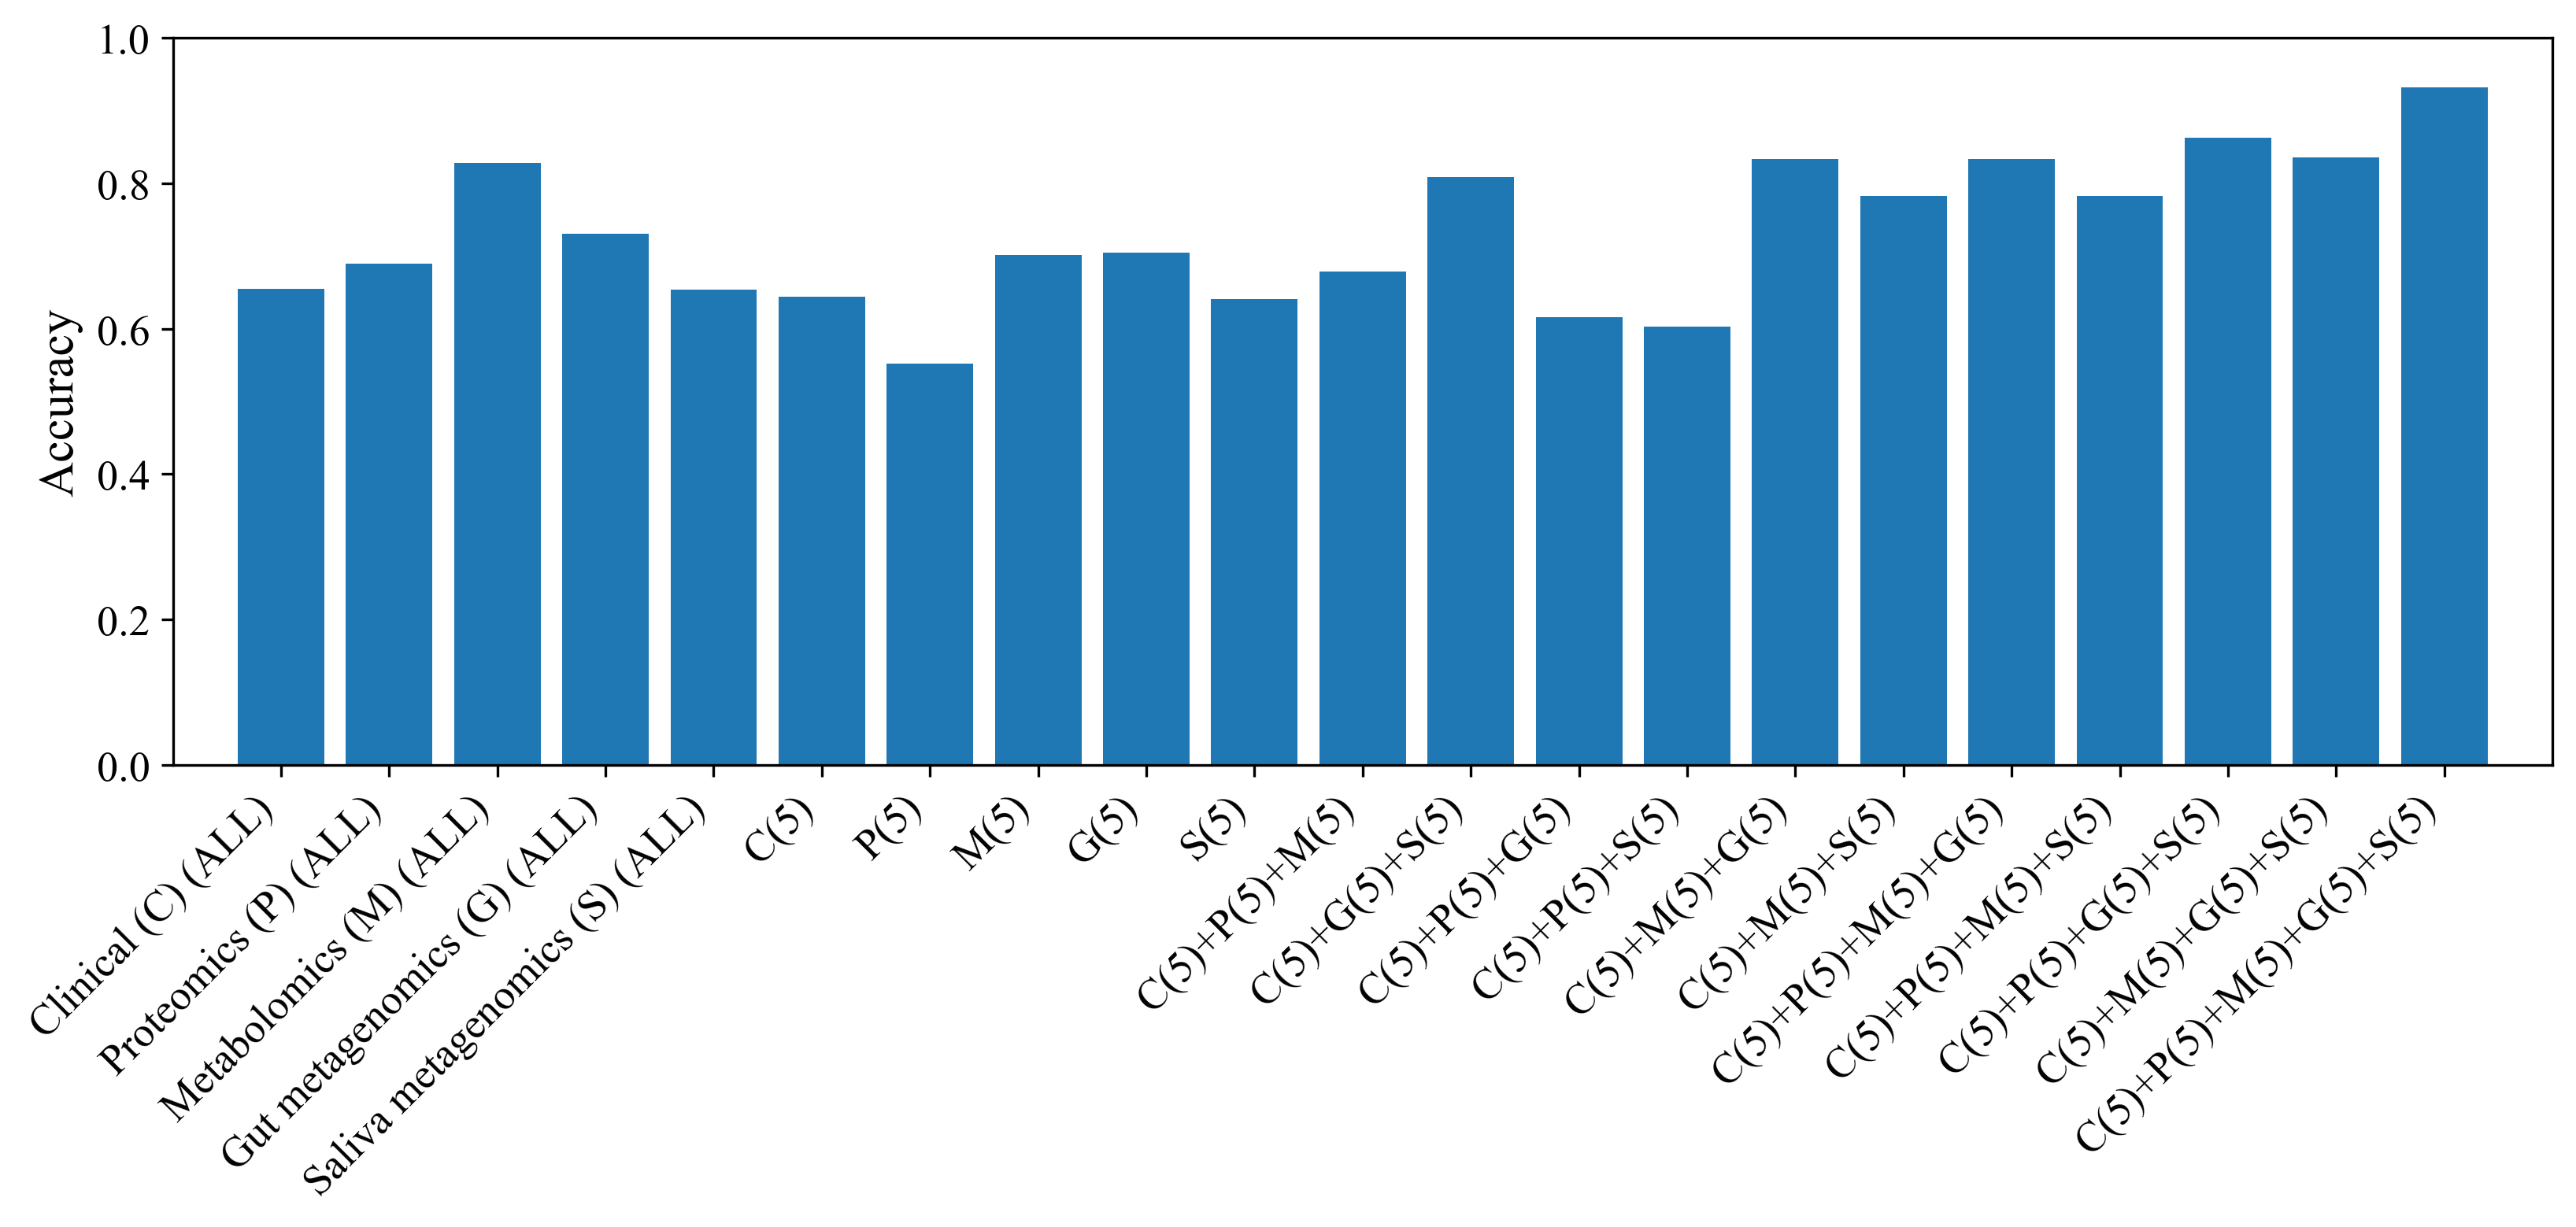

In [17]:
plt.rcParams['figure.figsize'] = [13.0, 4]
plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 7
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13

# Create bars
plt.bar(range(len(accuracy_XGB)), accuracy_XGB)

# # # Create names on the x-axis
plt.xticks(range(len(accuracy_XGB)), labels, ha='right', rotation=45)
plt.xlim(-1, 21)
plt.ylim(0, 1.0)
plt.ylabel('Accuracy', size=15)
# Show graphic
plt.show()

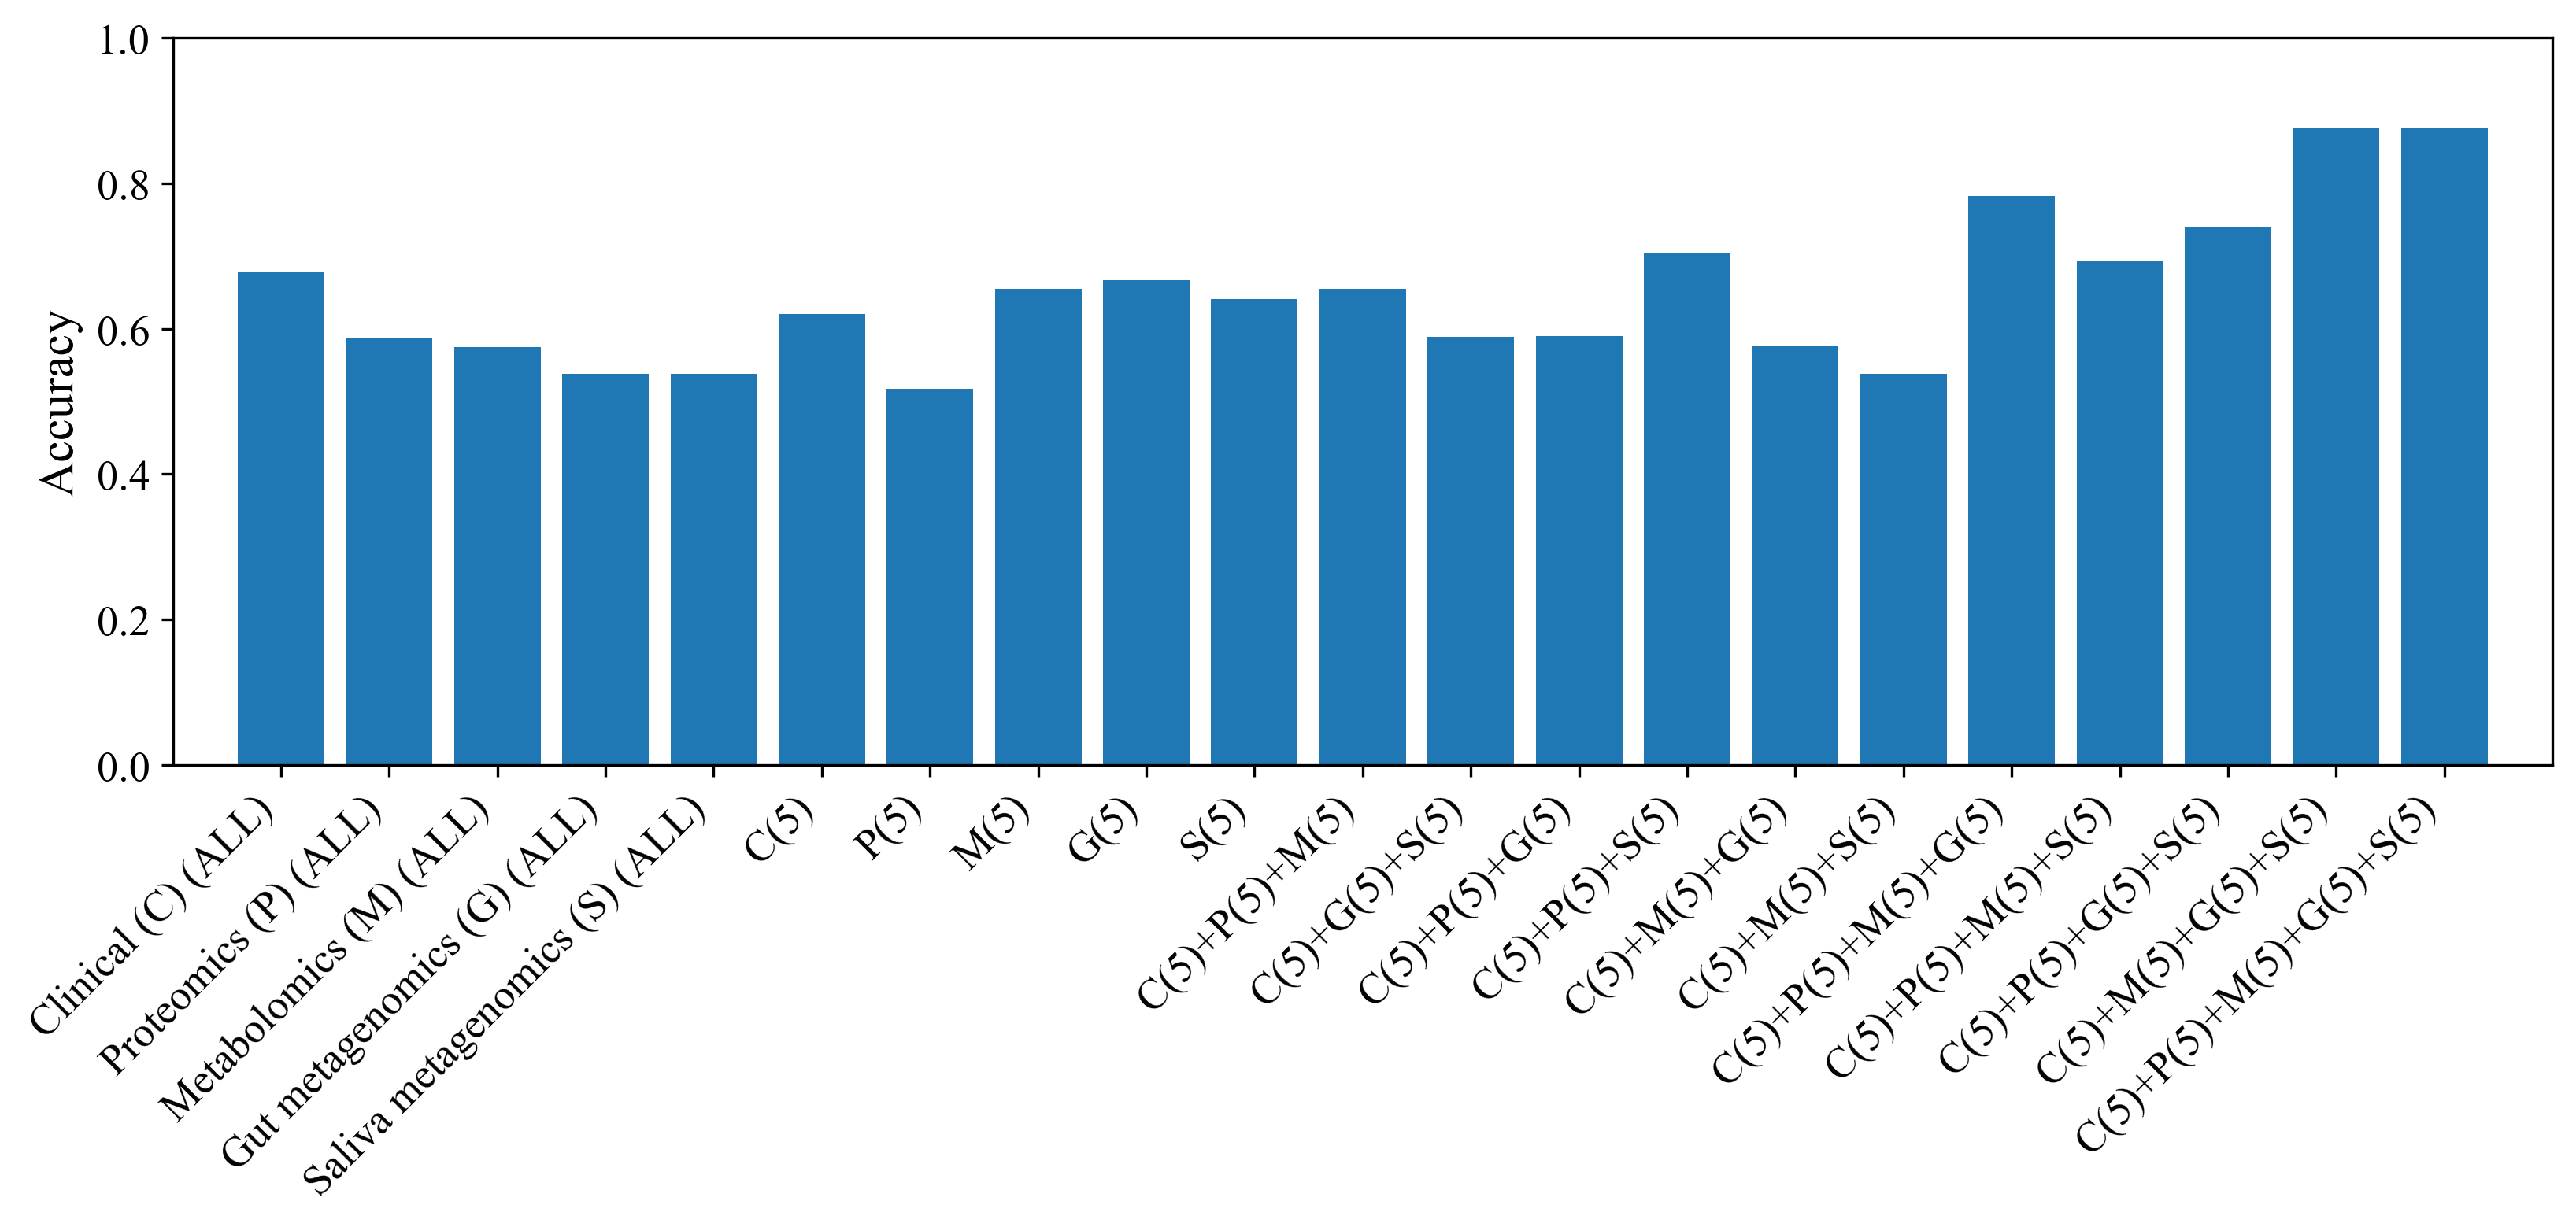

In [18]:
plt.rcParams['figure.figsize'] = [13.0, 4]
plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 7
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13

# Create bars
plt.bar(range(len(accuracy_RF)), accuracy_RF)

# # # Create names on the x-axis
plt.xticks(range(len(accuracy_RF)), labels, ha='right', rotation=45)
plt.xlim(-1, 21)
plt.ylim(0, 1.0)
plt.ylabel('Accuracy', size=15)
# Show graphic
plt.show()

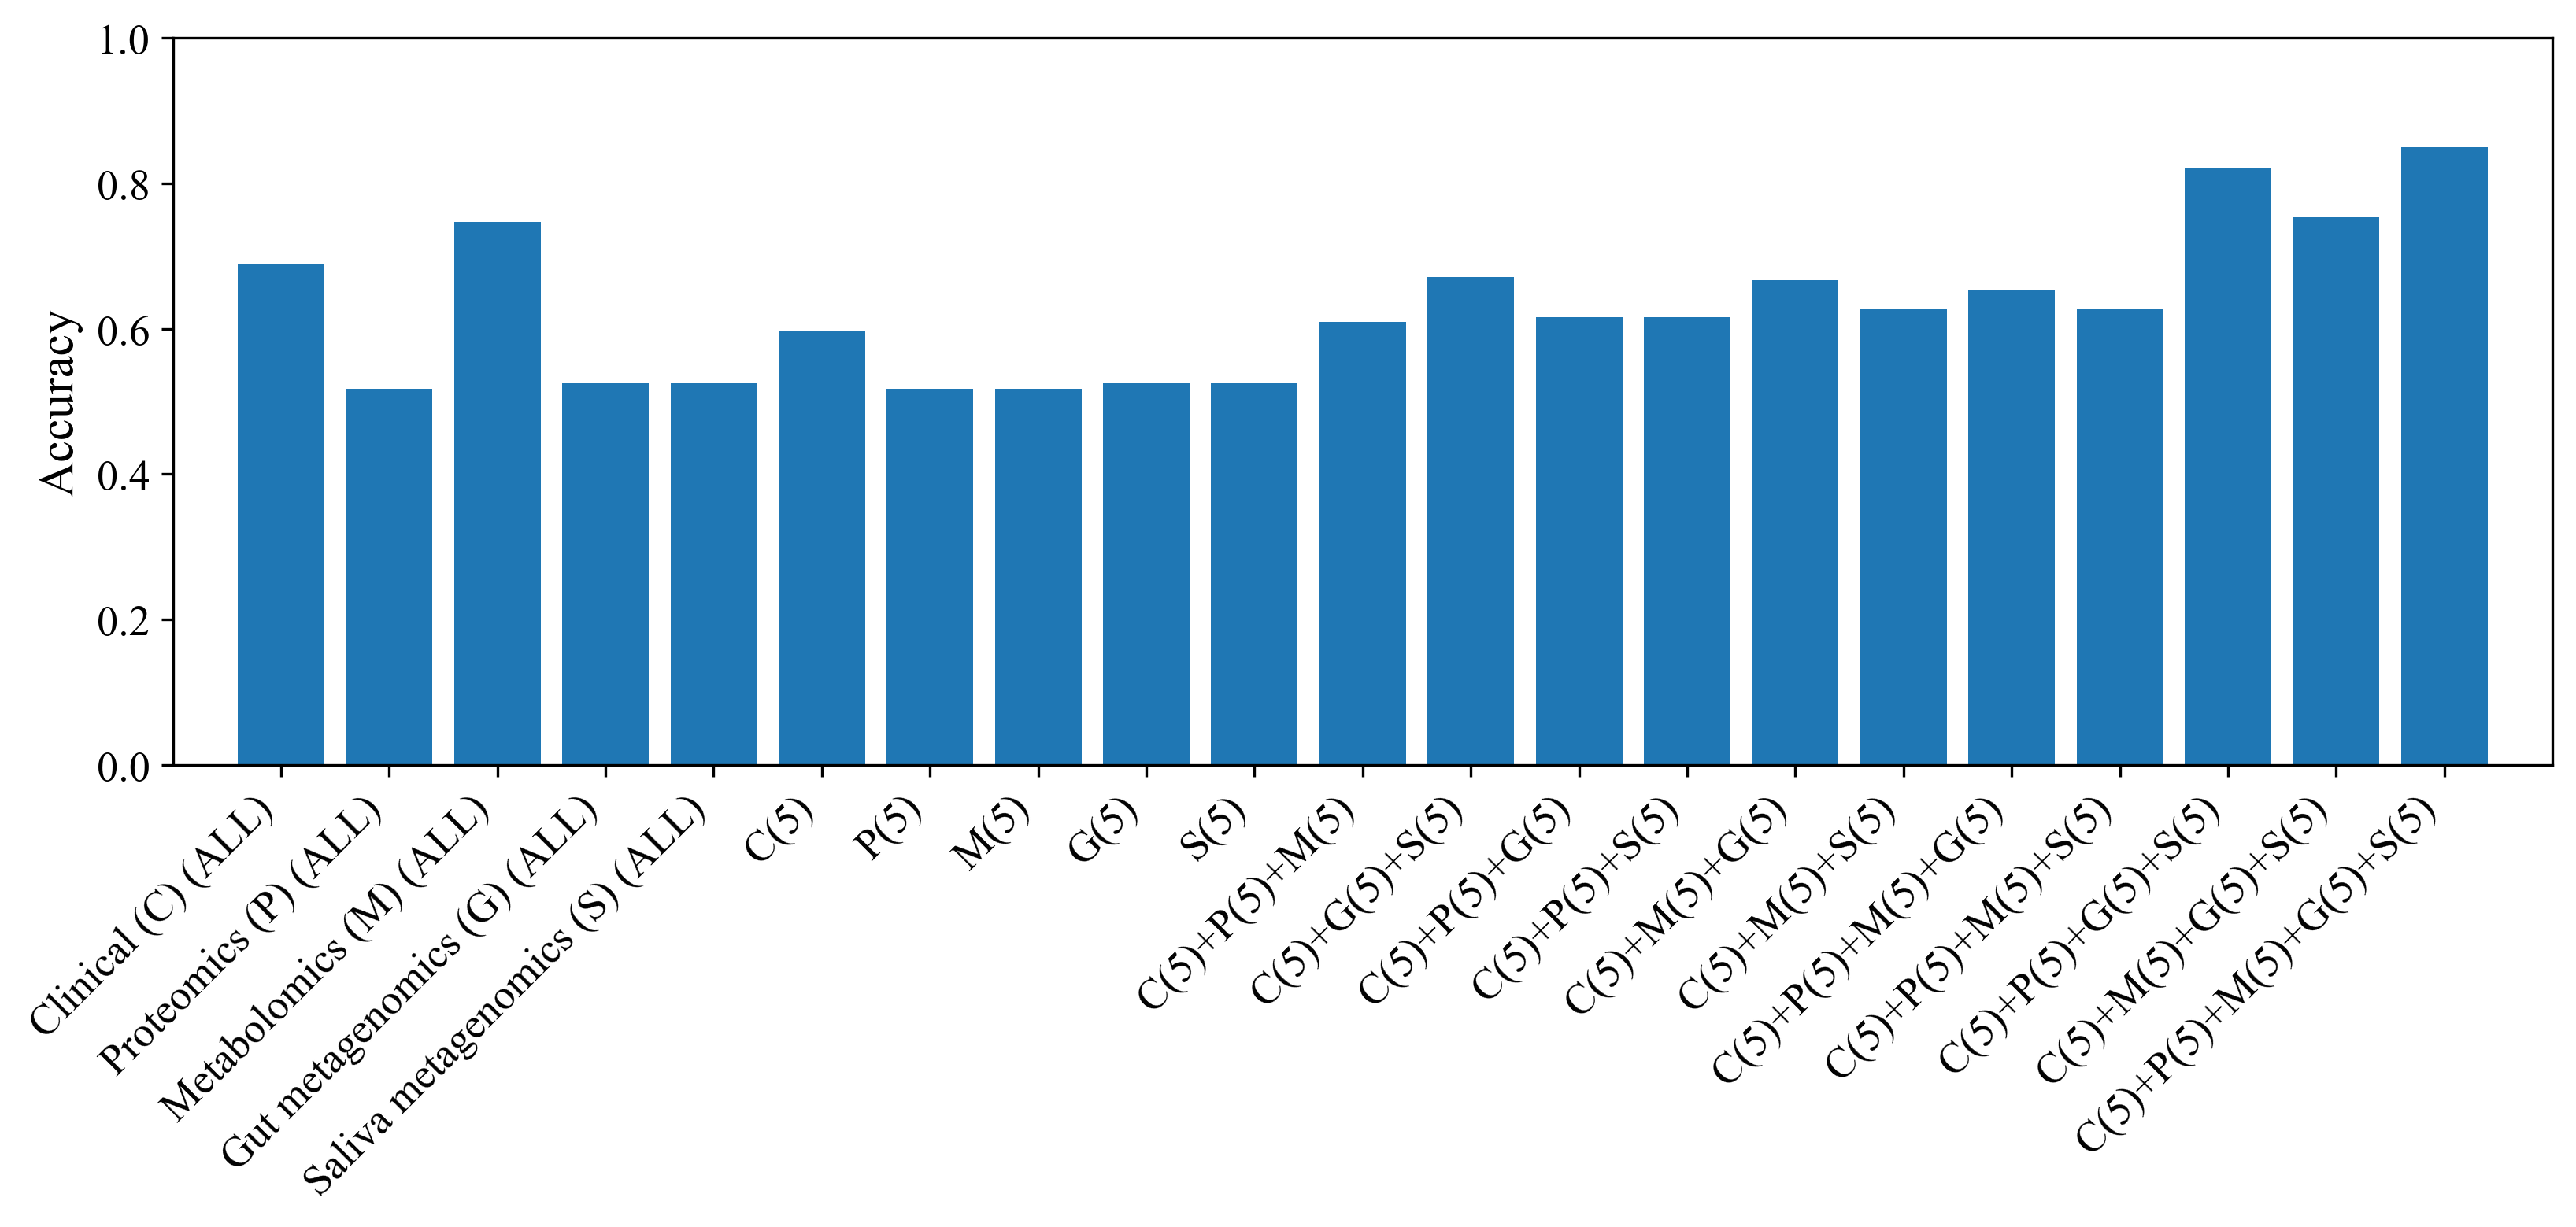

In [19]:
plt.rcParams['figure.figsize'] = [13.0, 4]
plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 7
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13

# Create bars
plt.bar(range(len(accuracy_SVM)), accuracy_SVM)

# # # Create names on the x-axis
plt.xticks(range(len(accuracy_SVM)), labels, ha='right', rotation=45)
plt.xlim(-1, 21)
plt.ylim(0, 1.0)
plt.ylabel('Accuracy', size=15)
# Show graphic
plt.show()

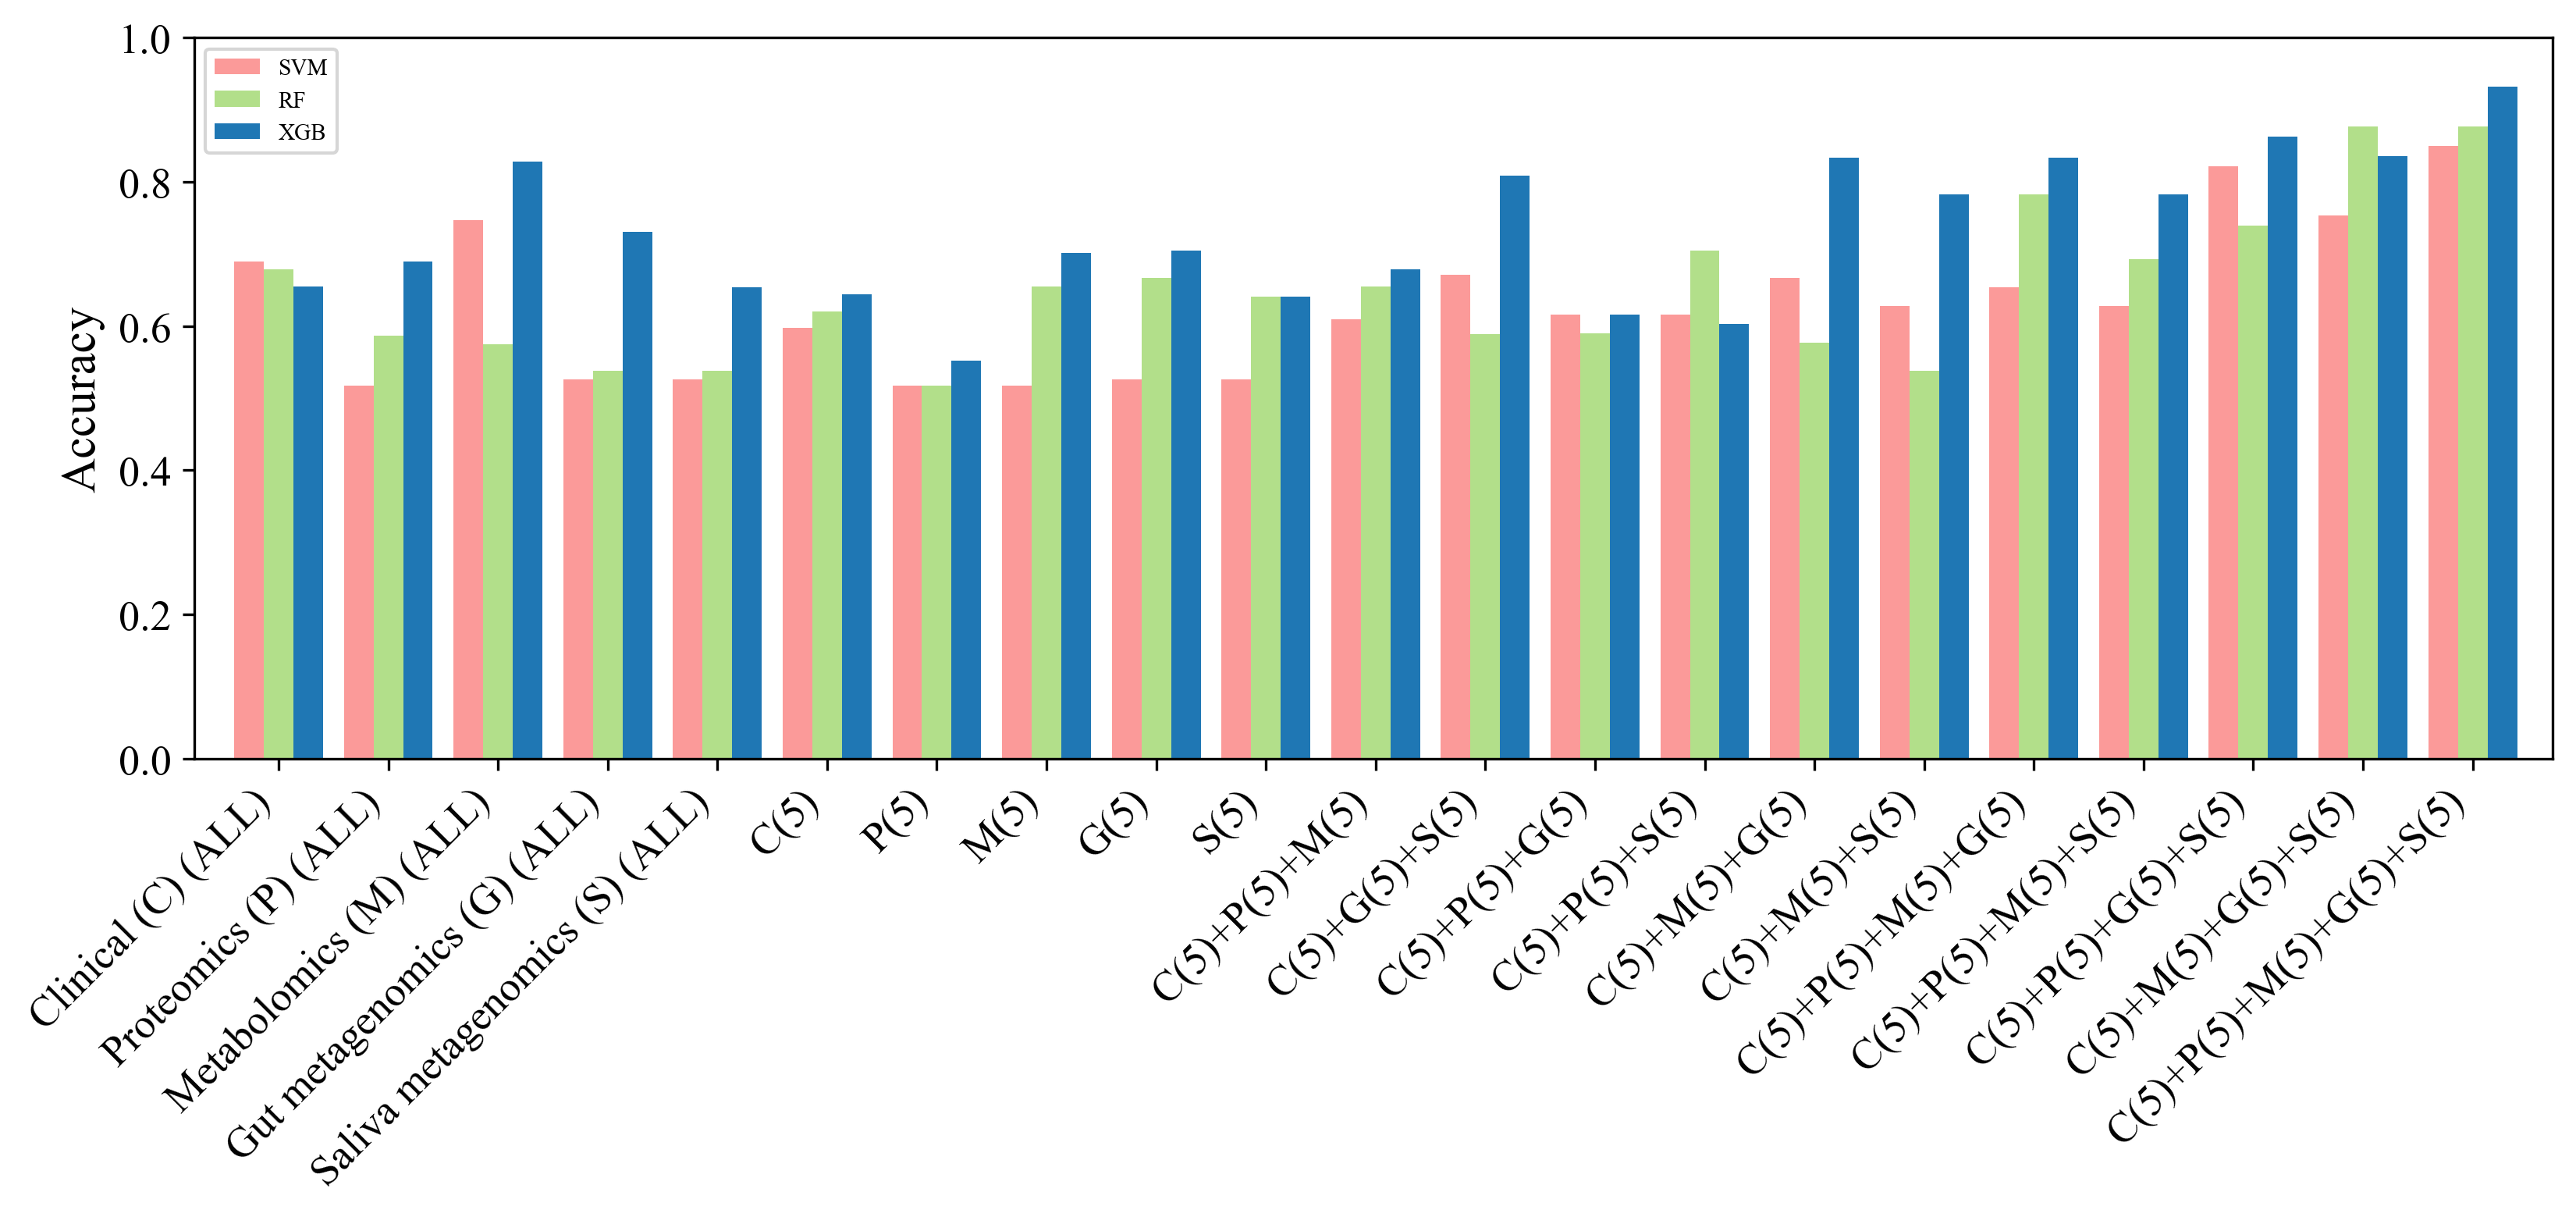

In [20]:
# Create bars
width = 0.27  # width of the bars
plt.bar(np.arange(len(accuracy_SVM)), accuracy_SVM, width=width, label='SVM', color = '#fb9a99')
plt.bar(np.arange(len(accuracy_RF)) + width, accuracy_RF, width=width, label='RF', color = '#b2df8a')
plt.bar(np.arange(len(accuracy_XGB)) + 2*width, accuracy_XGB, width=width, label='XGB', color = '#1f77b4')

positions = np.arange(len(accuracy_SVM)) + width

# Set x-axis labels and tick positions
plt.xticks(positions, labels, rotation=45, ha='right')

# Set x and y limits
plt.xlim(-0.5, 21)
plt.ylim(0, 1.0)

# Set y-axis label
plt.ylabel('Accuracy', size=15)

# Show legend
plt.legend()

# Show graphic
plt.show()

In [51]:
accuracy_XGB

[0.6551724137931034,
 0.6896551724137931,
 0.8275862068965517,
 0.7307692307692307,
 0.6538461538461539,
 0.6436781609195402,
 0.5517241379310345,
 0.7011494252873564,
 0.7051282051282052,
 0.6410256410256411,
 0.6781609195402298,
 0.8082191780821918,
 0.6153846153846154,
 0.6025641025641025,
 0.8333333333333334,
 0.782051282051282,
 0.8333333333333334,
 0.782051282051282,
 0.863013698630137,
 0.8356164383561644,
 0.9315068493150684,
 0.9726027397260274]

Find Kbest features

In [21]:
from sklearn.feature_selection import SelectKBest, f_classif

df_train = df_clin.copy()
df_train = df_train.merge(df_prot, on='Patient ID')
df_train = df_train.merge(df_meta, on='Patient ID')
df_train = df_train.merge(df_gut, on='Patient ID')
df_train = df_train.merge(df_saliva, on='Patient ID')
X, y = df_train.iloc[:, 2:].values, df_train.iloc[:, 1].values

selector = SelectKBest(score_func=f_classif, k=25)
X_kbest = selector.fit_transform(X, y)
selected_indices_kbest = selector.get_support(indices=True)

my_list = list(df_train.iloc[:, 2:].columns)
selected_items = [my_list[i] for i in selected_indices_kbest]
print(selected_items)

['Triglycerides', 'ATP6V1F', 'BMP4', 'CCS', 'EBI3_IL27', 'PSME2', 'RGS8', 'beta-alanine', '1-palmitoyl-2-oleoyl-GPE (16:0/18:1)', '1,2-dipalmitoyl-GPC (16:0/16:0)', '4-ethylphenylsulfate', '1-stearoyl-2-oleoyl-GPE (18:0/18:1)', '1-palmitoyl-2-linoleoyl-GPE (16:0/18:2)', 'oleoyl-linoleoyl-glycerol (18:1/18:2) [1]', 'oleoyl-linoleoyl-glycerol (18:1/18:2) [2]', 'tadalafil', '1-stearoyl-2-linoleoyl-GPE (18:0/18:2)*', '1-stearoyl-2-arachidonoyl-GPE (18:0/20:4)', 'palmitoyl-linoleoyl-glycerol (16:0/18:2) [2]*', 'trazadone', 'N,N,N-trimethyl-5-aminovalerate', '3-carboxy-4-methyl-5-pentyl-2-furanpropionate (3-CMPFP)**', 'montelukast', 'Paraprevotella_clara', 'Bifidobacterium_longum_y']


Features [1705 1707 1776 1787 2020 2021 2079 2080 2088 2090 2095 2110 2118 2177
 2178 2186 2229 2264 2291 2292 2319 2325 2470 2471 2472 2473 2474 2514
 2589 2630 2640] are constant.
invalid value encountered in divide


In [22]:
X = X[:,selected_indices_kbest]
SVM_excute(X, y, svm_hyperparameters5)
RF_excute(X, y, rf_hyperparameters5)
XGB_excute(X, y, xgb_hyperparameters5)

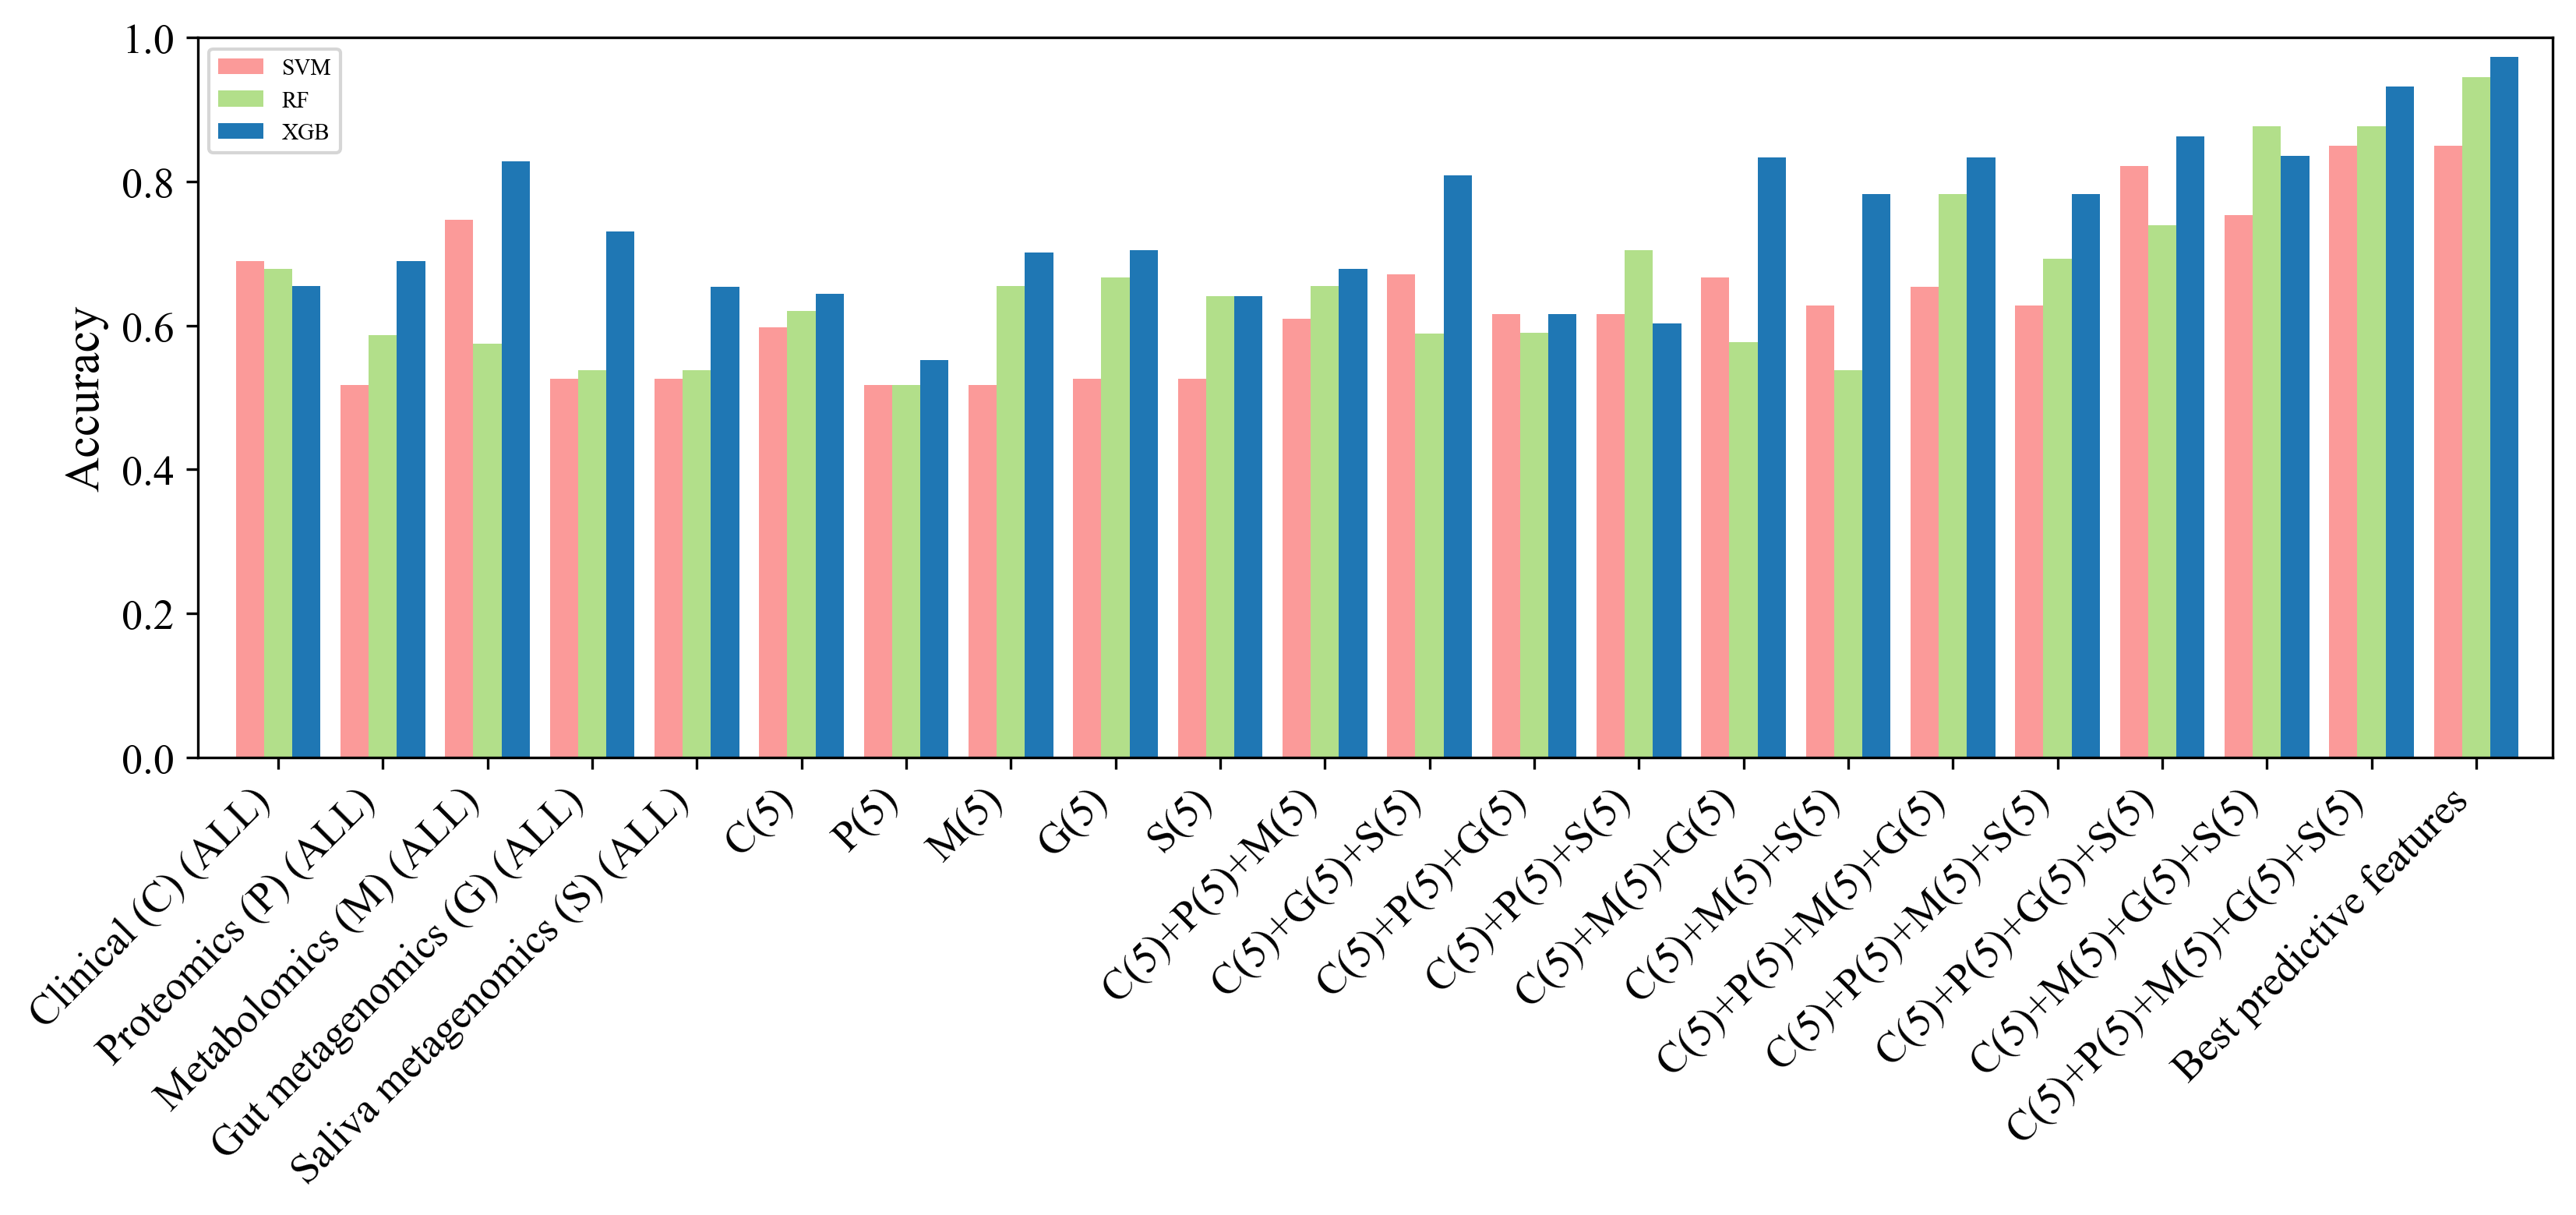

In [23]:
# Create bars
width = 0.27  # width of the bars
plt.bar(np.arange(len(accuracy_SVM)), accuracy_SVM, width=width, label='SVM', color = '#fb9a99')
plt.bar(np.arange(len(accuracy_RF)) + width, accuracy_RF, width=width, label='RF', color = '#b2df8a')
plt.bar(np.arange(len(accuracy_XGB)) + 2*width, accuracy_XGB, width=width, label='XGB', color = '#1f77b4')

positions = np.arange(len(accuracy_SVM)) + width

# Set x-axis labels and tick positions
plt.xticks(positions, labels+['Best predictive features'], rotation=45, ha='right')

# Set x and y limits
plt.xlim(-0.5, 22)
plt.ylim(0, 1.0)

# Set y-axis label
plt.ylabel('Accuracy', size=15)

# Show legend
plt.legend()

# Show graphic
plt.show()

ROC curve: High vs Low

In [24]:
df_train = df_clin.copy()
df_train = df_train[['Patient ID', 'ADAS group']]
df_train = df_train.merge(df_clin_5, on='Patient ID')
df_train = df_train.merge(df_prot_5, on='Patient ID')
df_train = df_train.merge(df_meta_5, on='Patient ID')
df_train = df_train.merge(df_gut_5, on='Patient ID')
df_train = df_train.merge(df_saliva_5, on='Patient ID')
df_train = df_train[df_train['ADAS group']!=1]
df_train['ADAS group'] = df_train['ADAS group'].replace({2: 1})
X, y = df_train.iloc[:, 2:].values, df_train.iloc[:, 1].values

In [25]:
temp = pd.read_excel('../Processed data copy 6/independent test cohort classification.xlsx', sheet_name='Clinical (C) (ALL)', header=0)
temp = temp[['Patient ID', 'ADAS group']]
test = pd.read_excel('../Processed data copy 6/independent test cohort classification.xlsx', sheet_name='C(5)+P(5)+M(5)+G(5)+S(5)', header=0)
test = temp.merge(test, on='Patient ID')
test = test[test['ADAS group']!=1]
test['ADAS group'] = test['ADAS group'].replace({2: 1})

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

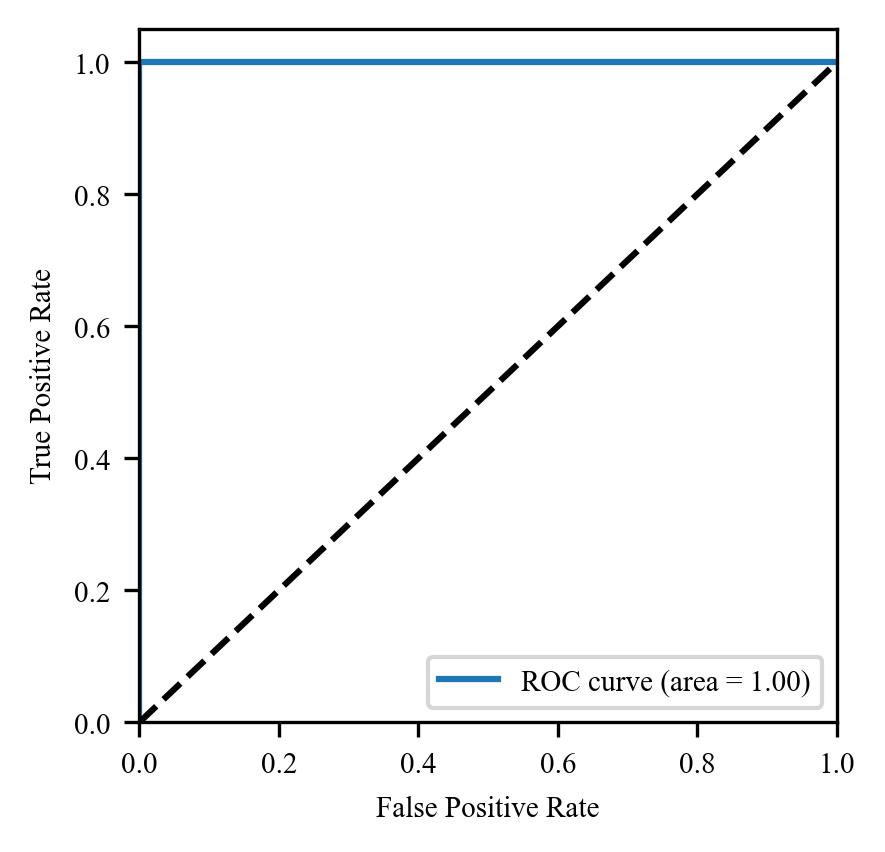

In [26]:
from sklearn.metrics import roc_curve, auc

plt.rcParams['figure.figsize'] = [3.0, 3.0]
plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 7
plt.rcParams['xtick.labelsize'] = 7
plt.rcParams['ytick.labelsize'] = 7

X_train, X_test, y_train, y_test = df_train.iloc[:, 2:].values, test.iloc[:, 2:].values, df_train.iloc[:, 1].values, test.iloc[:, 1].values

clf = XGBClassifier(learning_rate=0.01, n_estimators=50, max_depth=2, random_state=0).fit(X_train, y_train)

y_pred_prob = clf.predict_proba(X_train)[:, 1]

fpr, tpr, thresholds = roc_curve(y_train, y_pred_prob)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

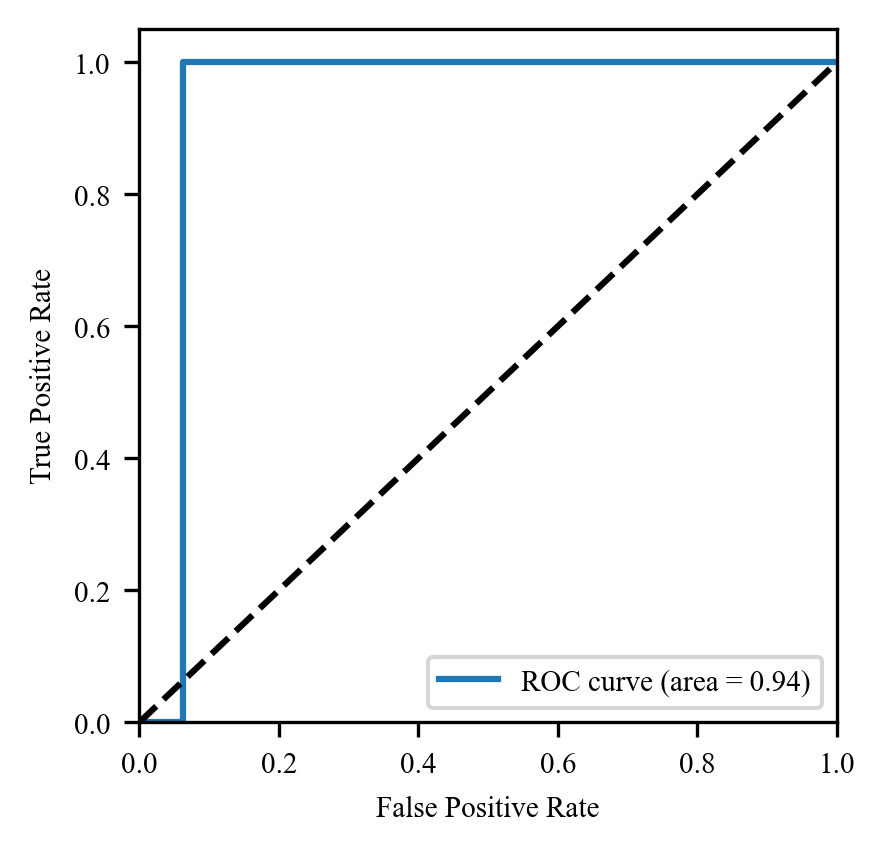

In [27]:
y_pred_prob = clf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title

ROC curve: Non-Low vs Low

In [28]:
df_train = df_clin.copy()
df_train = df_train[['Patient ID', 'ADAS group']]
df_train = df_train.merge(df_clin_5, on='Patient ID')
df_train = df_train.merge(df_prot_5, on='Patient ID')
df_train = df_train.merge(df_meta_5, on='Patient ID')
df_train = df_train.merge(df_gut_5, on='Patient ID')
df_train = df_train.merge(df_saliva_5, on='Patient ID')
df_train['ADAS group'] = df_train['ADAS group'].replace({2: 1})
df_train = pd.concat([df_train, test.head(5)], ignore_index=True) # for unbalanced data
X, y = df_train.iloc[:, 2:].values, df_train.iloc[:, 1].values

In [29]:
temp = pd.read_excel('../Processed data copy 6/independent test cohort classification.xlsx', sheet_name='Clinical (C) (ALL)', header=0)
temp = temp[['Patient ID', 'ADAS group']]
test = pd.read_excel('../Processed data copy 6/independent test cohort classification.xlsx', sheet_name='C(5)+P(5)+M(5)+G(5)+S(5)', header=0)
test = temp.merge(test, on='Patient ID')
test['ADAS group'] = test['ADAS group'].replace({2: 1})

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

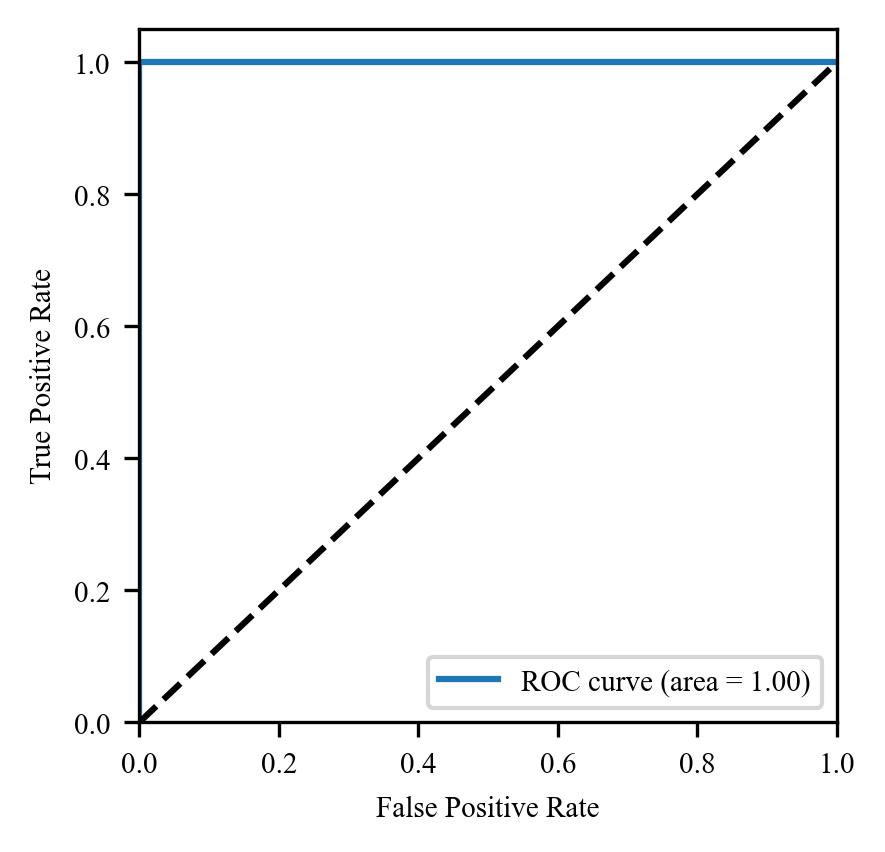

In [30]:
from sklearn.metrics import roc_curve, auc

plt.rcParams['figure.figsize'] = [3.0, 3.0]
plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 7
plt.rcParams['xtick.labelsize'] = 7
plt.rcParams['ytick.labelsize'] = 7

X_train, X_test, y_train, y_test = df_train.iloc[:, 2:].values, test.iloc[:, 2:].values, df_train.iloc[:, 1].values, test.iloc[:, 1].values

clf = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=0).fit(X_train, y_train)

y_pred_prob = clf.predict_proba(X_train)[:, 1]

fpr, tpr, thresholds = roc_curve(y_train, y_pred_prob)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

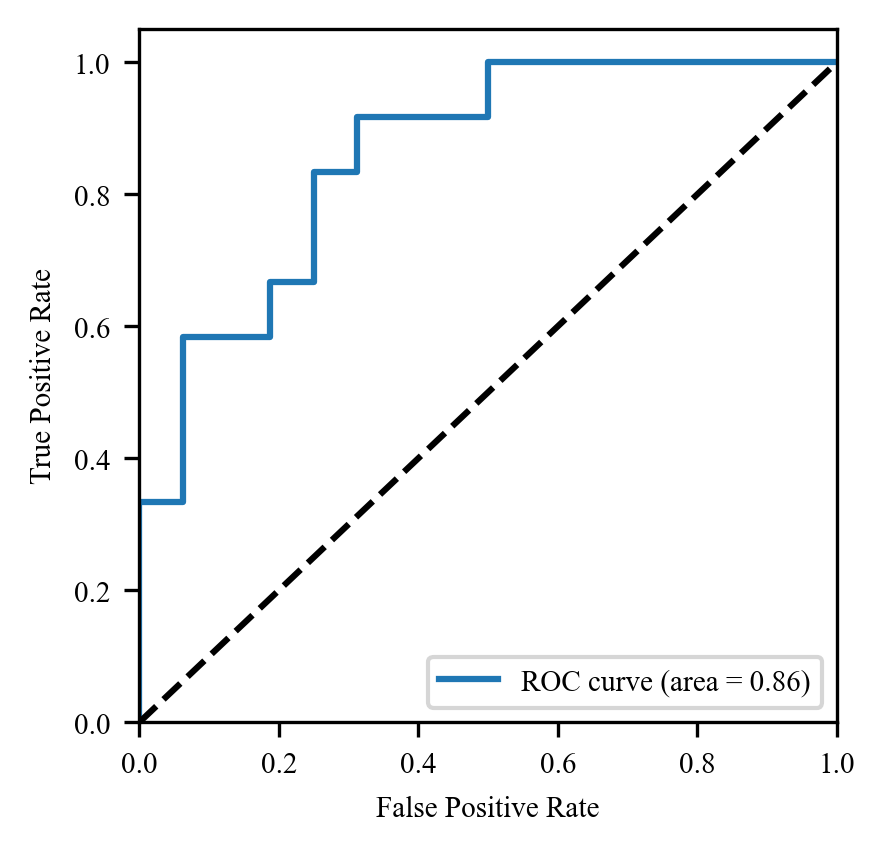

In [31]:
y_pred_prob = clf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title

Feature importance

In [32]:
from xgboost import XGBRegressor

temp = pd.read_excel('../Processed data copy 6/Clinic.xlsx', sheet_name='TC1', header=0)

df_train = df_clin_5.copy()
df_train = df_train.merge(df_prot_5, on='Patient ID')
df_train = df_train.merge(df_meta_5, on='Patient ID')
df_train = df_train.merge(df_gut_5, on='Patient ID')
df_train = df_train.merge(df_saliva_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_train.merge(temp, on='Patient ID')['ADAS-COG']
regr = XGBRegressor(max_depth=3, learning_rate=0.01, n_estimators=200, random_state=0).fit(X, y)

In [33]:
explainer = shap.TreeExplainer(regr)
shap_values = explainer.shap_values(X)
features = list(df_train.iloc[:, 1:].columns)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


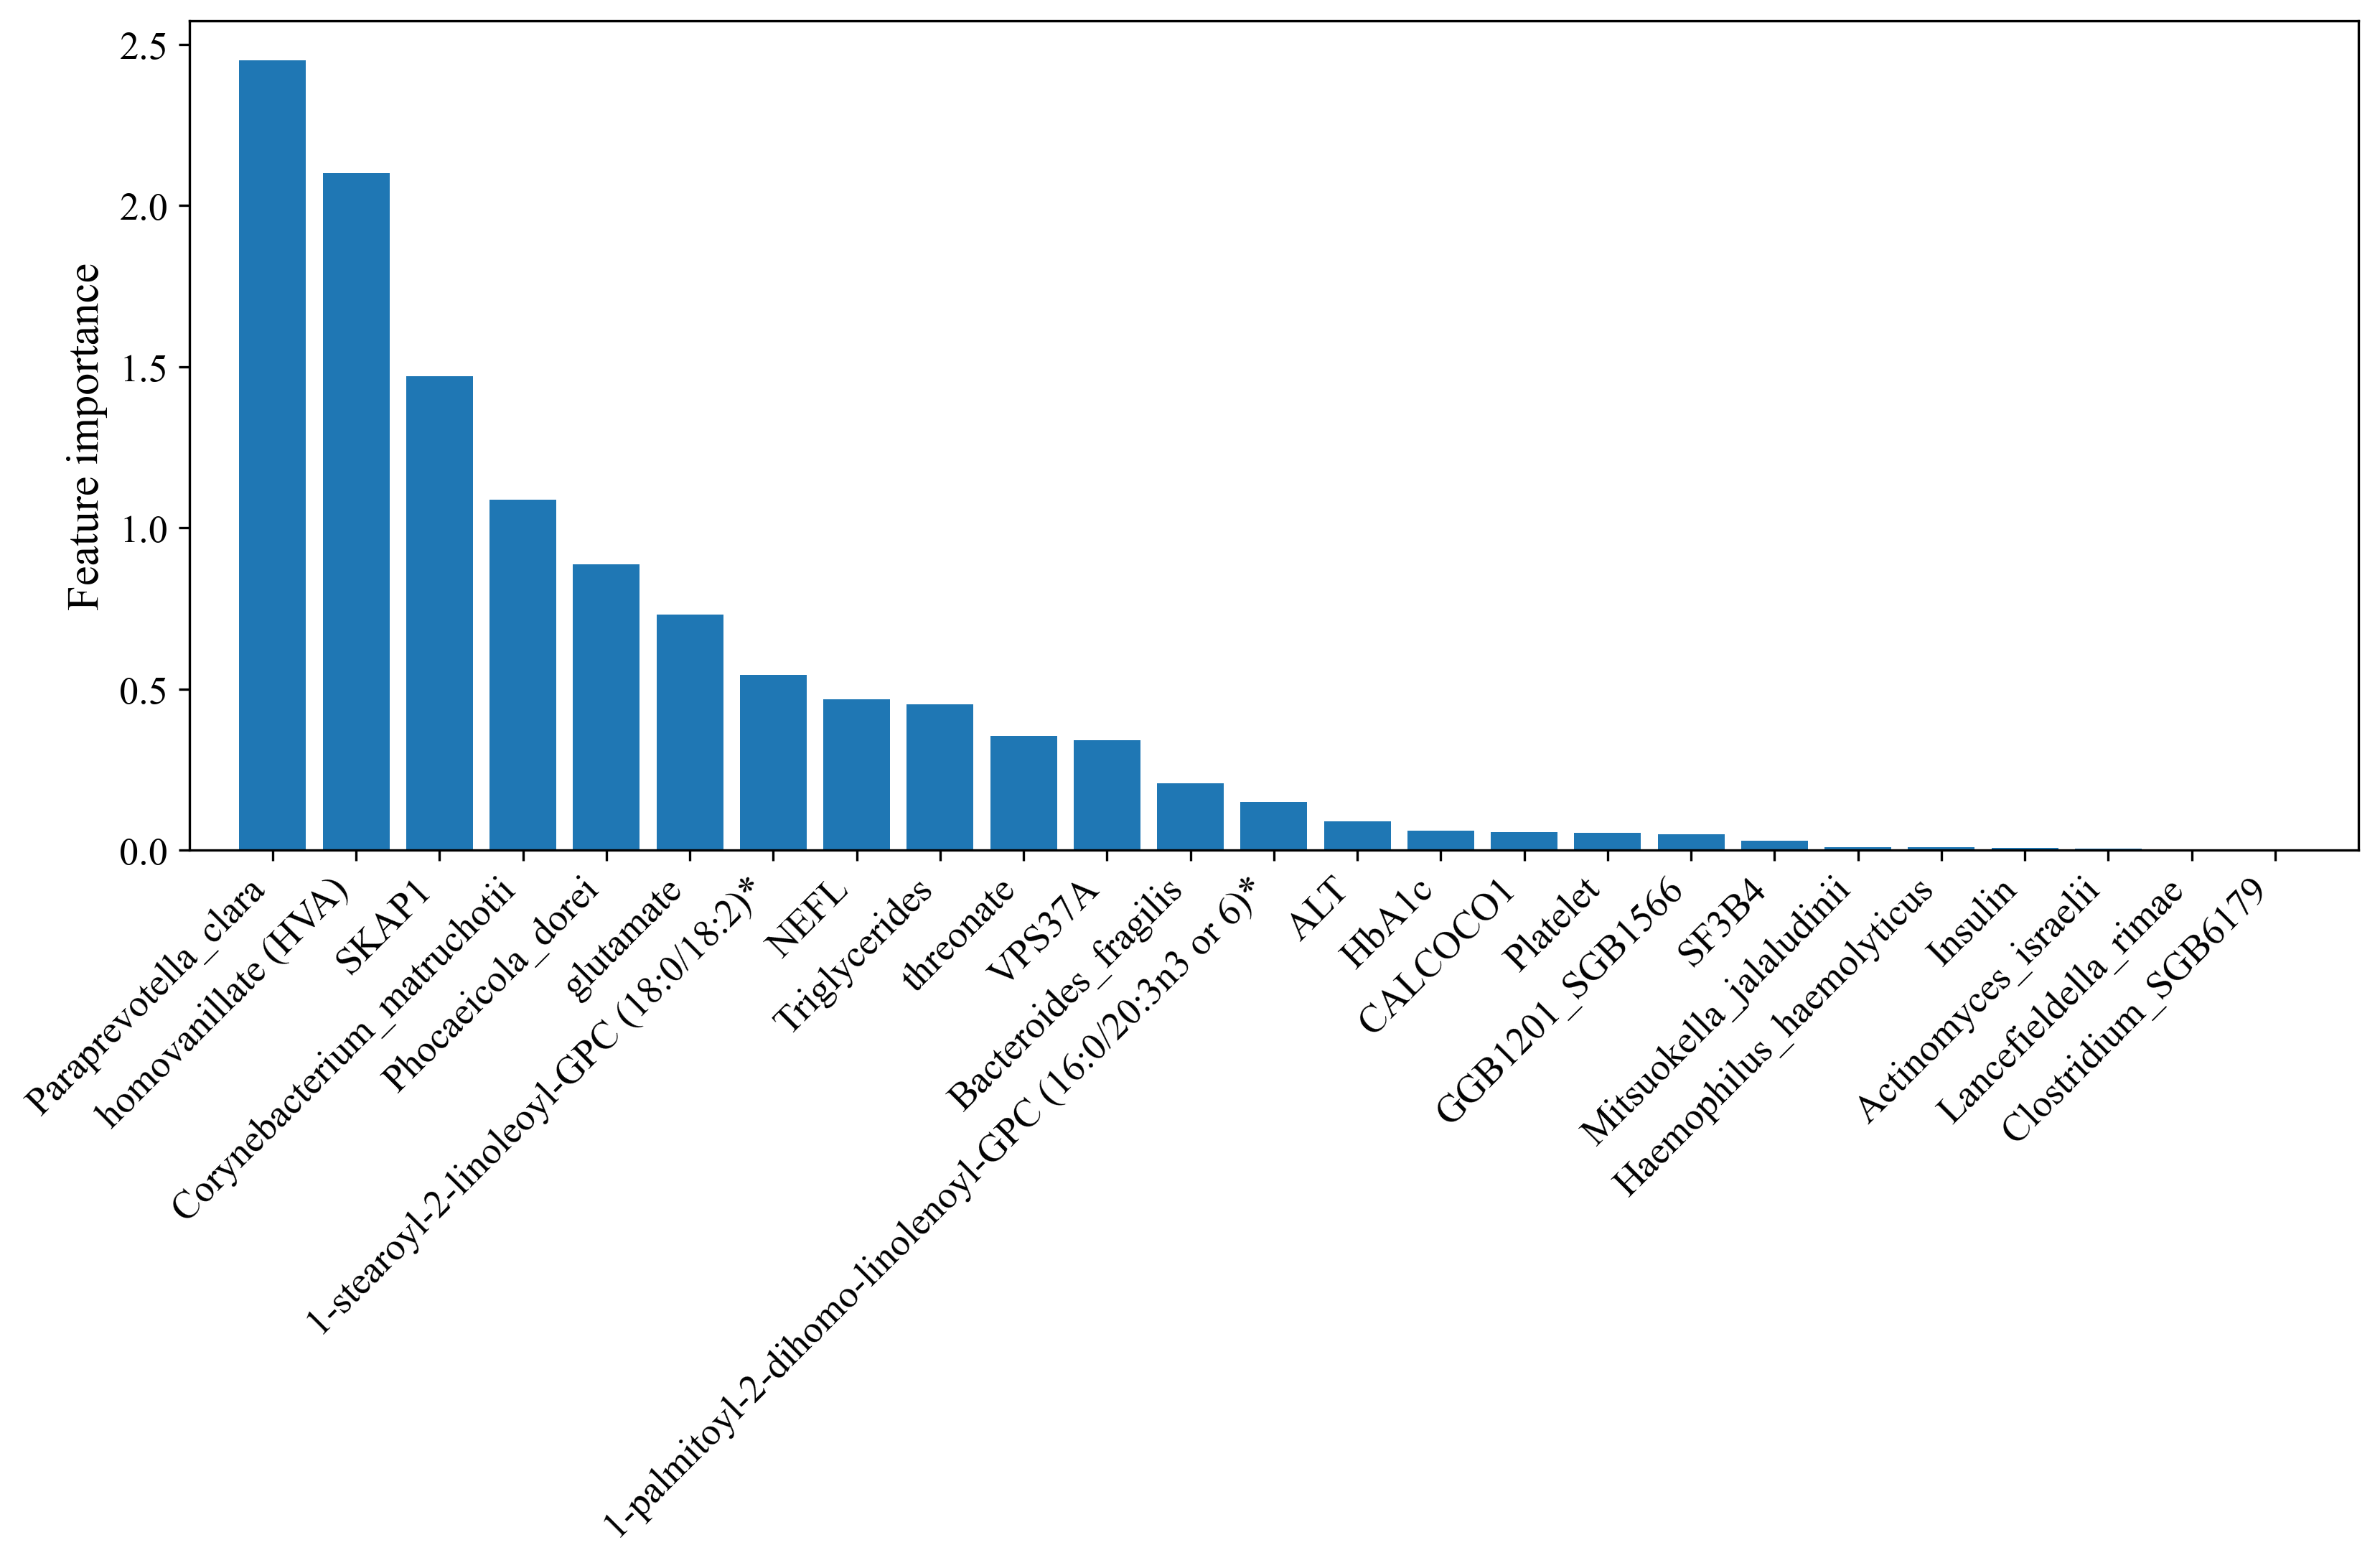

In [34]:
shap = list(np.sum(np.abs(shap_values), axis=0)/len(df_train))

combined_list = list(zip(shap, features))
sorted_list = sorted(combined_list)
sorted_score, sorted_labels = zip(*sorted_list)
sorted_score = list(sorted_score)
sorted_labels = list(sorted_labels)
sorted_score.reverse()
sorted_labels.reverse()

plt.rcParams['figure.figsize'] = [13.0, 5.0]
plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 7
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13

# Create bars
plt.bar(range(len(sorted_score)), sorted_score)

# # # Create names on the x-axis
plt.xticks(range(len(sorted_score)), sorted_labels, ha='right', rotation=45)
plt.xlim(-1, 25)
plt.ylabel('Feature importance', size=15)
# Show graphic
plt.show()

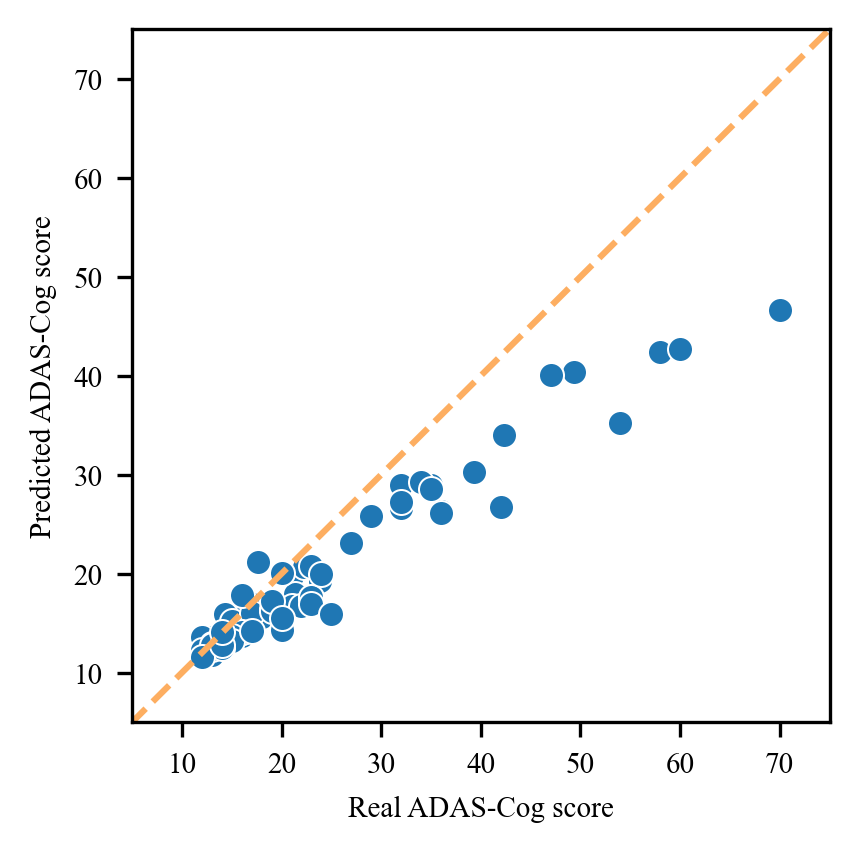

In [35]:
plt.rcParams['font.size'] = 7
plt.rcParams['xtick.labelsize'] = 7
plt.rcParams['ytick.labelsize'] = 7
plt.rcParams['figure.figsize'] = [3.0, 3.0]
plt.rcParams['figure.dpi'] = 300

sns.lineplot(x=[0,80], y=[0,80], color='#fdae61', linestyle='--')
sns.scatterplot(x=y, y=regr.predict(df_train.iloc[:,1:]))

plt.xlim(5, 75)
plt.ylim(5, 75)
plt.xlabel('Real ADAS-Cog score', size=7)
plt.ylabel('Predicted ADAS-Cog score', size=7)
# Show graphic
plt.show()

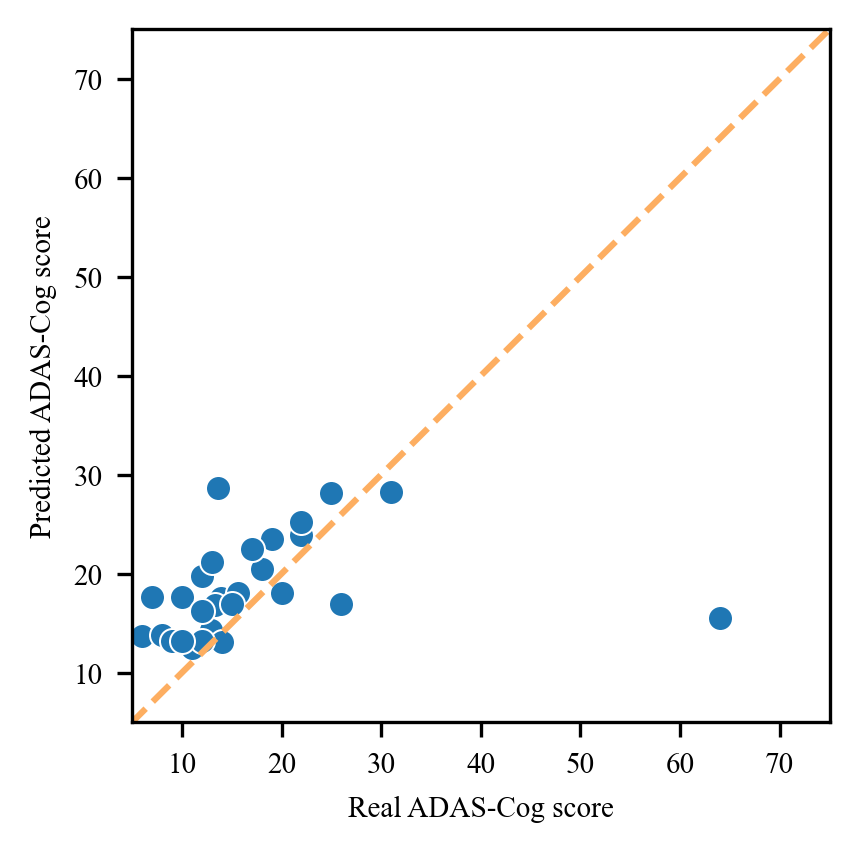

In [36]:
df_test = pd.read_excel('../Processed data copy 6/independent test cohort.xlsx', sheet_name='C(5)+P(5)+M(5)+G(5)+S(5)', header=0)

plt.rcParams['font.size'] = 7
plt.rcParams['xtick.labelsize'] = 7
plt.rcParams['ytick.labelsize'] = 7
plt.rcParams['figure.figsize'] = [3.0, 3.0]
plt.rcParams['figure.dpi'] = 300

sns.lineplot(x=[0,80], y=[0,80], color='#fdae61', linestyle='--')
sns.scatterplot(x=df_test.iloc[:,1], y=regr.predict(df_test.iloc[:,2:]))

plt.xlim(5, 75)
plt.ylim(5, 75)
plt.xlabel('Real ADAS-Cog score', size=7)
plt.ylabel('Predicted ADAS-Cog score', size=7)
# Show graphic
plt.show()

Find best features in regression

In [37]:
from sklearn.feature_selection import SelectKBest, f_regression

temp = pd.read_excel('../Processed data copy 6/Clinic.xlsx', sheet_name='TC1', header=0)
temp = temp.drop(columns=['ADAS group', 'Mini Mental', 'SEX', 'Age', 'Cigarette'])
df_train = temp.copy()
df_train = df_train.merge(df_prot, on='Patient ID')
df_train = df_train.merge(df_meta, on='Patient ID')
df_train = df_train.merge(df_gut, on='Patient ID')
df_train = df_train.merge(df_saliva, on='Patient ID')
X, y = df_train.iloc[:, 2:].values, df_train.iloc[:, 1].values

selector = SelectKBest(score_func=f_regression, k=25)
X_new = selector.fit_transform(X, y)
selected_indices = selector.get_support(indices=True)

my_list = list(df_train.iloc[:, 2:].columns)
selected_items = [my_list[i] for i in selected_indices]
print(selected_items)
X = X[:,selected_indices]

regr = XGBRegressor(max_depth=3, learning_rate=0.01, n_estimators=200, random_state=0).fit(X, y)

invalid value encountered in sqrt
divide by zero encountered in divide
invalid value encountered in divide


['BAG3', 'BTN3A2', 'CD5', 'CDNF', 'HNMT', 'SH2D1A', 'TNFSF14', 'VWC2', 'indolelactate', 'Fibrinopeptide A, des-ala(1)*', '2-methylbutyrylcarnitine (C5)', 'N-octanoylglycine', 'N-methyltaurine', 'dimethyl sulfone', '1-palmitoyl-2-arachidonoyl-GPI (16:0/20:4)*', 'heneicosapentaenoate (21:5n3)', 'levetiracetam', 'hydroxy-CMPF*', 'branched-chain, straight-chain, or cyclopropyl 12:1 fatty acid*', 'Desulfovibrionaceae_bacterium', 'Prevotella_sp_885', 'Streptococcus_cristatus', 'Olsenella_sp_oral_taxon_807', 'Bifidobacterium_longum_y', 'Actinomyces_sp_oral_taxon_897']


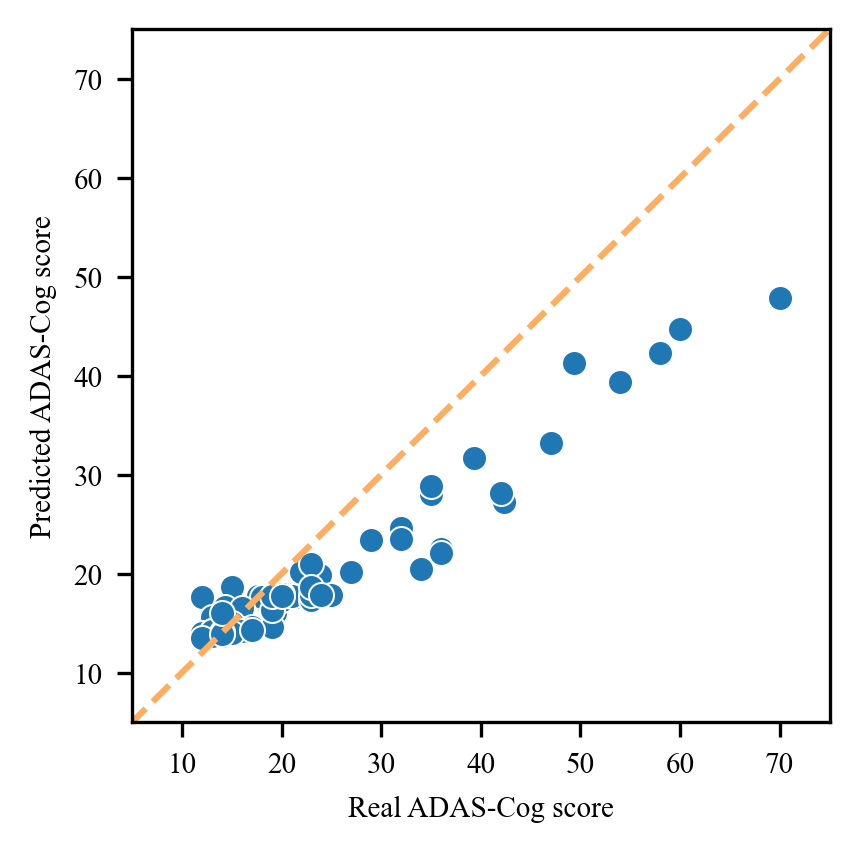

In [38]:
plt.rcParams['font.size'] = 7
plt.rcParams['xtick.labelsize'] = 7
plt.rcParams['ytick.labelsize'] = 7
plt.rcParams['figure.figsize'] = [3.0, 3.0]
plt.rcParams['figure.dpi'] = 300

sns.lineplot(x=[0,80], y=[0,80], color='#fdae61', linestyle='--')
sns.scatterplot(x=y, y=regr.predict(X))

plt.xlim(5, 75)
plt.ylim(5, 75)
plt.xlabel('Real ADAS-Cog score', size=7)
plt.ylabel('Predicted ADAS-Cog score', size=7)
# Show graphic
plt.show()

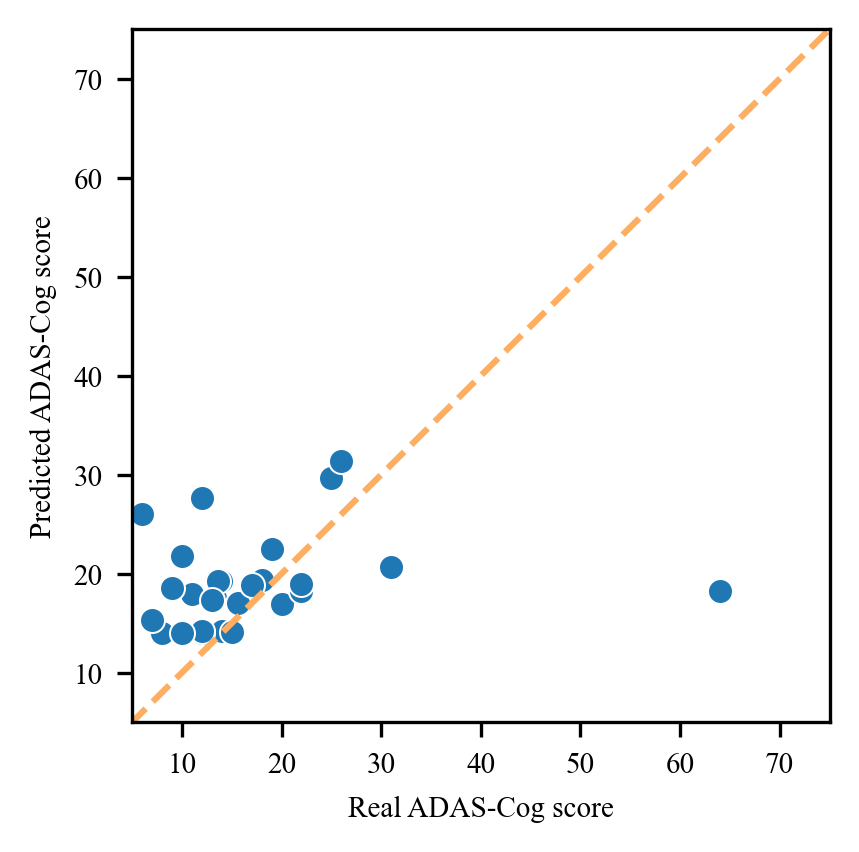

In [39]:
df_test_clin = pd.read_excel('../Processed data copy 6/independent test cohort.xlsx', sheet_name='Clinical (C) (ALL)', header=0)
df_test_clin = df_test_clin.drop(columns=['Group', 'SEX', 'Cigarette'])
df_test_prot = pd.read_excel('../Processed data copy 6/independent test cohort.xlsx', sheet_name='Proteomics (P) (ALL)', header=0)
df_test_meta = pd.read_excel('../Processed data copy 6/independent test cohort.xlsx', sheet_name='Metabolomics (M) (ALL)', header=0)
df_test_gut = pd.read_excel('../Processed data copy 6/independent test cohort.xlsx', sheet_name='Gut metagenomics (G) (ALL)', header=0)
df_test_saliva = pd.read_excel('../Processed data copy 6/independent test cohort.xlsx', sheet_name='Saliva metagenomics (S) (ALL)', header=0)

df_test = df_test_clin.copy()
df_test = df_test.merge(df_test_prot, on='Patient ID')
df_test = df_test.merge(df_test_meta, on='Patient ID')
df_test = df_test.merge(df_test_gut, on='Patient ID')
df_test = df_test.merge(df_test_saliva, on='Patient ID')

X, y = df_test.iloc[:, 2:].values, df_test.iloc[:, 1].values
X = X[:,selected_indices]

plt.rcParams['font.size'] = 7
plt.rcParams['xtick.labelsize'] = 7
plt.rcParams['ytick.labelsize'] = 7
plt.rcParams['figure.figsize'] = [3.0, 3.0]
plt.rcParams['figure.dpi'] = 300

sns.lineplot(x=[0,80], y=[0,80], color='#fdae61', linestyle='--')
sns.scatterplot(x=y, y=regr.predict(X))

plt.xlim(5, 75)
plt.ylim(5, 75)
plt.xlabel('Real ADAS-Cog score', size=7)
plt.ylabel('Predicted ADAS-Cog score', size=7)
# Show graphic
plt.show()

Regression scores for ML algorithms

In [40]:
df_clin = pd.read_excel('../Processed data copy 6/Clinic.xlsx', sheet_name='TC1', header=0)
df_clin = df_clin.drop(columns=['ADAS group', 'Mini Mental', 'SEX', 'Age', 'Cigarette'])
df_clin

Patient ID  ADAS-COG    HB   HCT   RBC   WBC  Platelet  Neutrophil%  \
0     TR10001      18.3  13.6  40.0  4.75  7.32       224         69.2   
1     TR10002      32.0  11.2  33.7  3.92  5.70        80         56.1   
2     TR10004      36.0  11.9  36.3  4.42  8.43       225         72.2   
3     TR10005      39.3  13.1  38.5  4.76  5.28       195         60.9   
4     TR10006      29.0  13.0  35.7  4.21  5.67       229         58.4   
..        ...       ...   ...   ...   ...   ...       ...          ...   
82    TR20109      13.0  11.9  36.0  4.47  8.13       190         65.5   
83    TR20114      20.0  11.9  37.7  5.47  7.17       203         64.1   
84    TR20117      60.0  12.2  38.5  3.83  8.45       333         66.7   
85    TR20118      24.0  12.8  39.2  4.79  6.07       223         52.9   
86    TR20119      14.0  15.0  42.5  4.56  5.11       166         58.7   

    Lymphocyte%  Monocyte%  ...  HbA1c   TSH  Diastolic blood pressure (mmHg)  \
0          22.3        7.2  ...   5.58  1.58                             79.0   
1          34.2        7.2  ...   5.19  3.02                             70.0   
2          18.3        7.5  ...   6.85  2.65                             80.0   
3          28.8        8.0  ...   5.79  2.17                             68.0   
4          31.0        5.8  ...   6.08  3.57                             80.0   
..          ...        ...  ...    ...   ...                              ...   
82         19.4       11.1  ...   5.67  0.88                             78.0   
83         25.5        8.5  ...   6.50  1.07                             81.0   
84         22.0        8.2  ...   5.05  0.52                             79.0   
85         34.3        9.1  ...   6.08  1.09                             74.0   
86         28.6       12.1  ...   5.73  0.59                             70.0   

    Sistolic blood pressure (mmHg)  Pulse (beats per minute)  \
0                            141.0                      58.0   
1                            120.0                      67.0   
2                            140.0                      72.0   
3                            125.0                      65.0   
4                            130.0                      74.0   
..                             ...                       ...   
82                           171.0                      66.0   
83                           166.0                      52.0   
84                           122.0                      81.0   
85                           145.0                      70.0   
86                           128.0                      61.0   

    Waist circumference (cm)  Hip circumference (cm)  Weight  Height    BMI  
0                      106.0                   112.0    76.0   170.0  26.30  
1                       79.0                    93.0    50.6   152.0  21.60  
2                      142.0                   150.0   135.0   170.0  46.71  
3                       74.0                    94.0    60.0   159.0  23.70  
4                       87.0                   101.0    61.0   149.0  27.40  
..                       ...                     ...     ...     ...    ...  
82                      95.0                    93.0    70.0   164.0  26.03  
83                      89.0                    96.0    67.0   154.0  28.25  
84                      71.0                    85.0    55.0   158.0  22.03  
85                     112.0                   133.0   110.0   159.0  43.51  
86                     107.0                   103.0    83.0   158.0  33.25  

[87 rows x 45 columns]

In [41]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV, KFold

def xgb_regression_hyperparameters0(X, y):
    param_grid = {'max_depth': [2, 3],'learning_rate': [0.15],'n_estimators': [20, 30]}
    cv = KFold(n_splits=5, shuffle=True, random_state=0)
    regr = XGBRegressor(random_state=0)
    grid_search = GridSearchCV(regr, param_grid=param_grid, cv=cv, n_jobs=-1)
    grid_search.fit(X, y)
    return grid_search.best_params_

def xgb_regression_hyperparameters1(X, y):
    param_grid = {'max_depth': [3, 4],'learning_rate': [0.1, 0.01],'n_estimators': [20, 30]}
    cv = KFold(n_splits=5, shuffle=True, random_state=0)
    regr = XGBRegressor(random_state=0)
    grid_search = GridSearchCV(regr, param_grid=param_grid, cv=cv, n_jobs=-1)
    grid_search.fit(X, y)
    return grid_search.best_params_

def xgb_regression_hyperparameters3(X, y):
    param_grid = {'max_depth': [4, 5],'learning_rate': [0.1, 0.01],'n_estimators': [20, 30]}
    cv = KFold(n_splits=5, shuffle=True, random_state=0)
    regr = XGBRegressor(random_state=0)
    grid_search = GridSearchCV(regr, param_grid=param_grid, cv=cv, n_jobs=-1)
    grid_search.fit(X, y)
    return grid_search.best_params_

def xgb_regression_hyperparameters4(X, y):
    param_grid = {'max_depth': [4, 5],'learning_rate': [0.1, 0.01],'n_estimators': [20, 30]}
    cv = KFold(n_splits=5, shuffle=True, random_state=0)
    regr = XGBRegressor(random_state=0)
    grid_search = GridSearchCV(regr, param_grid=param_grid, cv=cv, n_jobs=-1)
    grid_search.fit(X, y)
    return grid_search.best_params_


def xgb_regression_hyperparameters5(X, y):
    param_grid = {'max_depth': [4, 5],'learning_rate': [0.1, 0.05],'n_estimators': [50, 100]}
    cv = KFold(n_splits=5, shuffle=True, random_state=0)
    regr = XGBRegressor(random_state=0)
    grid_search = GridSearchCV(regr, param_grid=param_grid, cv=cv, n_jobs=-1)
    grid_search.fit(X, y)
    return grid_search.best_params_


def rf_regression_hyperparameters0(X, y):
    param_grid = {'max_depth': [1, 2], 'n_estimators': [10, 20]}
    cv = KFold(n_splits=5, shuffle=True, random_state=0)
    regr = RandomForestRegressor(random_state=0)
    grid_search = GridSearchCV(regr, param_grid=param_grid, cv=cv, n_jobs=-1)
    grid_search.fit(X, y)
    return grid_search.best_params_

def rf_regression_hyperparameters1(X, y):
    param_grid = {'max_depth': [1, 2], 'n_estimators': [10, 20]}
    cv = KFold(n_splits=5, shuffle=True, random_state=0)
    regr = RandomForestRegressor(random_state=0)
    grid_search = GridSearchCV(regr, param_grid=param_grid, cv=cv, n_jobs=-1)
    grid_search.fit(X, y)
    return grid_search.best_params_

def rf_regression_hyperparameters3(X, y):
    param_grid = {'max_depth': [1, 2], 'n_estimators': [10, 20]}
    cv = KFold(n_splits=5, shuffle=True, random_state=0)
    regr = RandomForestRegressor(random_state=0)
    grid_search = GridSearchCV(regr, param_grid=param_grid, cv=cv, n_jobs=-1)
    grid_search.fit(X, y)
    return grid_search.best_params_

def rf_regression_hyperparameters4(X, y):
    param_grid = {'max_depth': [2, 3], 'n_estimators': [30, 50]}
    cv = KFold(n_splits=5, shuffle=True, random_state=0)
    regr = RandomForestRegressor(random_state=0)
    grid_search = GridSearchCV(regr, param_grid=param_grid, cv=cv, n_jobs=-1)
    grid_search.fit(X, y)
    return grid_search.best_params_

def rf_regression_hyperparameters5(X, y):
    param_grid = {'max_depth': [2, 3], 'n_estimators': [30, 50]}
    cv = KFold(n_splits=5, shuffle=True, random_state=0)
    regr = RandomForestRegressor(random_state=0)
    grid_search = GridSearchCV(regr, param_grid=param_grid, cv=cv, n_jobs=-1)
    grid_search.fit(X, y)
    return grid_search.best_params_

def svm_regression_hyperparameters0(X, y):
    param_grid = {'C': [0.0003, 0.003]}
    cv = KFold(n_splits=5, shuffle=True, random_state=0)
    regr = SVR(kernel='linear')
    grid_search = GridSearchCV(regr, param_grid=param_grid, cv=cv, n_jobs=-1)
    grid_search.fit(X, y)
    return grid_search.best_params_

def svm_regression_hyperparameters1(X, y):
    param_grid = {'C': [0.001, 0.01]}
    cv = KFold(n_splits=5, shuffle=True, random_state=0)
    regr = SVR(kernel='linear')
    grid_search = GridSearchCV(regr, param_grid=param_grid, cv=cv, n_jobs=-1)
    grid_search.fit(X, y)
    return grid_search.best_params_

def svm_regression_hyperparameters3(X, y):
    param_grid = {'C': [0.01, 0.1]}
    cv = KFold(n_splits=5, shuffle=True, random_state=0)
    regr = SVR(kernel='linear')
    grid_search = GridSearchCV(regr, param_grid=param_grid, cv=cv, n_jobs=-1)
    grid_search.fit(X, y)
    return grid_search.best_params_

def svm_regression_hyperparameters4(X, y):
    param_grid = {'C': [0.05, 0.5]}
    cv = KFold(n_splits=5, shuffle=True, random_state=0)
    regr = SVR(kernel='linear')
    grid_search = GridSearchCV(regr, param_grid=param_grid, cv=cv, n_jobs=-1)
    grid_search.fit(X, y)
    return grid_search.best_params_

def svm_regression_hyperparameters5(X, y):
    param_grid = {'C': [0.08, 0.8]}
    cv = KFold(n_splits=5, shuffle=True, random_state=0)
    regr = SVR(kernel='linear')
    grid_search = GridSearchCV(regr, param_grid=param_grid, cv=cv, n_jobs=-1)
    grid_search.fit(X, y)
    return grid_search.best_params_

In [42]:
# def SVM_regression_excute(X, y, svm_regression_hyperparameters):
#     regr = SVR(**svm_regression_hyperparameters(X, y), kernel='linear').fit(X, y)
#     score_SVM.append(r2_score(regr.predict(X), y))

# def RF_regression_excute(X, y, rf_regression_hyperparameters):
#     regr = RandomForestRegressor(**rf_regression_hyperparameters(X, y), random_state=0).fit(X, y)
#     score_RF.append(r2_score(regr.predict(X), y))

# def XGB_regression_excute(X, y, xgb_regression_hyperparameters):
#     regr = XGBRegressor(**xgb_regression_hyperparameters(X, y), random_state=0).fit(X, y)
#     score_XGB.append(r2_score(regr.predict(X), y))

def SVM_regression_excute(X, y, C, gamma=0.1, epsilon=0.1):
    regr = SVR(C=C, gamma=gamma, epsilon=epsilon, kernel='rbf').fit(X, y)
    score_SVM.append(r2_score(regr.predict(X), y))

def RF_regression_excute(X, y, max_depth, n_estimators):
    regr = RandomForestRegressor(max_depth = max_depth, n_estimators = n_estimators, random_state=0).fit(X, y)
    score_RF.append(r2_score(regr.predict(X), y))

def XGB_regression_excute(X, y, max_depth = 2, learning_rate = 0.15, n_estimators = 20):
    regr = XGBRegressor(max_depth = max_depth, learning_rate = learning_rate, n_estimators = n_estimators, random_state=0).fit(X, y)
    score_XGB.append(r2_score(regr.predict(X), y))

In [43]:
score_XGB = []
labels = ['Clinical (C) (ALL)', 'Proteomics (P) (ALL)', 'Metabolomics (M) (ALL)', 'Gut metagenomics (G) (ALL)', 'Saliva metagenomics (S) (ALL)', 
           'C(5)', 'P(5)', 'M(5)', 'G(5)', 'S(5)', 'C(5)+P(5)+M(5)', 'C(5)+G(5)+S(5)', 'C(5)+P(5)+G(5)', 'C(5)+P(5)+S(5)', 'C(5)+M(5)+G(5)', 'C(5)+M(5)+S(5)',
           'C(5)+P(5)+M(5)+G(5)', 'C(5)+P(5)+M(5)+S(5)', 'C(5)+P(5)+G(5)+S(5)', 'C(5)+M(5)+G(5)+S(5)', 'C(5)+P(5)+M(5)+G(5)+S(5)']

X, y = df_clin.iloc[:, 2:].values, df_clin['ADAS-COG']
XGB_regression_excute(X, y, max_depth = 3, learning_rate = 0.15, n_estimators = 20)
print(labels[0], score_XGB[-1])

X, y = df_prot.iloc[:, 1:].values, df_clin['ADAS-COG']
XGB_regression_excute(X, y, max_depth = 2, learning_rate = 0.15, n_estimators = 20)
print(labels[1], score_XGB[-1])

X, y = df_meta.iloc[:, 1:].values, df_clin['ADAS-COG']
XGB_regression_excute(X, y, max_depth = 2, learning_rate = 0.15, n_estimators = 20)
print(labels[2], score_XGB[-1])

X, y = df_gut.iloc[:, 1:].values, df_gut.merge(df_clin, on='Patient ID')['ADAS-COG']
XGB_regression_excute(X, y, max_depth = 2, learning_rate = 0.17, n_estimators = 20)
print(labels[3], score_XGB[-1])

X, y = df_saliva.iloc[:, 1:].values, df_saliva.merge(df_clin, on='Patient ID')['ADAS-COG']
XGB_regression_excute(X, y, max_depth = 2, learning_rate = 0.2, n_estimators = 20)
print(labels[4], score_XGB[-1])

X, y = df_clin_5.iloc[:, 1:].values, df_clin['ADAS-COG']
XGB_regression_excute(X, y, max_depth = 4, learning_rate = 0.15, n_estimators = 20)
print(labels[5], score_XGB[-1])

X, y = df_prot_5.iloc[:, 1:].values, df_clin['ADAS-COG']
XGB_regression_excute(X, y, max_depth = 3, learning_rate = 0.15, n_estimators = 20)
print(labels[6], score_XGB[-1])

X, y = df_meta_5.iloc[:, 1:].values, df_clin['ADAS-COG']
XGB_regression_excute(X, y, max_depth = 3, learning_rate = 0.15, n_estimators = 20)
print(labels[7], score_XGB[-1])

X, y = df_gut_5.iloc[:, 1:].values, df_gut.merge(df_clin, on='Patient ID')['ADAS-COG']
XGB_regression_excute(X, y, max_depth = 4, learning_rate = 0.15, n_estimators = 20)
print(labels[8], score_XGB[-1])

X, y = df_saliva_5.iloc[:, 1:].values, df_saliva.merge(df_clin, on='Patient ID')['ADAS-COG']
XGB_regression_excute(X, y, max_depth = 4, learning_rate = 0.15, n_estimators = 20)
print(labels[9], score_XGB[-1])

df_train = df_clin_5.copy()
df_train = df_train.merge(df_prot_5, on='Patient ID')
df_train = df_train.merge(df_meta_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_clin['ADAS-COG']
XGB_regression_excute(X, y, max_depth = 3, learning_rate = 0.15, n_estimators = 20)
print(labels[10], score_XGB[-1])

df_train = df_clin_5.copy()
df_train = df_train.merge(df_gut_5, on='Patient ID')
df_train = df_train.merge(df_saliva_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_gut.merge(df_saliva, on='Patient ID').merge(df_clin, on='Patient ID')['ADAS-COG']
XGB_regression_excute(X, y, max_depth = 3, learning_rate = 0.15, n_estimators = 20)
print(labels[11], score_XGB[-1])

df_train = df_clin_5.copy()
df_train = df_train.merge(df_prot_5, on='Patient ID')
df_train = df_train.merge(df_gut_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_gut.merge(df_clin, on='Patient ID')['ADAS-COG']
XGB_regression_excute(X, y, max_depth = 3, learning_rate = 0.15, n_estimators = 20)
print(labels[12], score_XGB[-1])

df_train = df_clin_5.copy()
df_train = df_train.merge(df_prot_5, on='Patient ID')
df_train = df_train.merge(df_saliva_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_saliva.merge(df_clin, on='Patient ID')['ADAS-COG']
XGB_regression_excute(X, y, max_depth = 3, learning_rate = 0.15, n_estimators = 20)
print(labels[13], score_XGB[-1])

df_train = df_clin_5.copy()
df_train = df_train.merge(df_meta_5, on='Patient ID')
df_train = df_train.merge(df_gut_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_gut.merge(df_clin, on='Patient ID')['ADAS-COG']
XGB_regression_excute(X, y, max_depth = 3, learning_rate = 0.14, n_estimators = 20)
print(labels[14], score_XGB[-1])


df_train = df_clin_5.copy()
df_train = df_train.merge(df_meta_5, on='Patient ID')
df_train = df_train.merge(df_saliva_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_saliva.merge(df_clin, on='Patient ID')['ADAS-COG']
XGB_regression_excute(X, y, max_depth = 3, learning_rate = 0.15, n_estimators = 20)
print(labels[15], score_XGB[-1])


df_train = df_clin_5.copy()
df_train = df_train.merge(df_prot_5, on='Patient ID')
df_train = df_train.merge(df_meta_5, on='Patient ID')
df_train = df_train.merge(df_gut_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_gut.merge(df_clin, on='Patient ID')['ADAS-COG']
XGB_regression_excute(X, y, max_depth = 3, learning_rate = 0.14, n_estimators = 20)
print(labels[16], score_XGB[-1])

df_train = df_clin_5.copy()
df_train = df_train.merge(df_prot_5, on='Patient ID')
df_train = df_train.merge(df_meta_5, on='Patient ID')
df_train = df_train.merge(df_saliva_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_saliva.merge(df_clin, on='Patient ID')['ADAS-COG']
XGB_regression_excute(X, y, max_depth = 3, learning_rate = 0.15, n_estimators = 20)
print(labels[17], score_XGB[-1])


df_train = df_clin_5.copy()
df_train = df_train.merge(df_prot_5, on='Patient ID')
df_train = df_train.merge(df_gut_5, on='Patient ID')
df_train = df_train.merge(df_saliva_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_gut.merge(df_saliva, on='Patient ID').merge(df_clin, on='Patient ID')['ADAS-COG']
XGB_regression_excute(X, y, max_depth = 3, learning_rate = 0.15, n_estimators = 20)
print(labels[18], score_XGB[-1])

df_train = df_clin_5.copy()
df_train = df_train.merge(df_meta_5, on='Patient ID')
df_train = df_train.merge(df_gut_5, on='Patient ID')
df_train = df_train.merge(df_saliva_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_gut.merge(df_saliva, on='Patient ID').merge(df_clin, on='Patient ID')['ADAS-COG']
XGB_regression_excute(X, y, max_depth = 3, learning_rate = 0.14, n_estimators = 20)
print(labels[19], score_XGB[-1])

df_train = df_clin_5.copy()
df_train = df_train.merge(df_prot_5, on='Patient ID')
df_train = df_train.merge(df_meta_5, on='Patient ID')
df_train = df_train.merge(df_gut_5, on='Patient ID')
df_train = df_train.merge(df_saliva_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_gut.merge(df_saliva, on='Patient ID').merge(df_clin, on='Patient ID')['ADAS-COG']
XGB_regression_excute(X, y, max_depth = 3, learning_rate = 0.14, n_estimators = 20)
print(labels[20], score_XGB[-1])

Clinical (C) (ALL) 0.5697511094357683
Proteomics (P) (ALL) 0.78361280121867
Metabolomics (M) (ALL) 0.7189932936550637
Gut metagenomics (G) (ALL) 0.6374812168633852
Saliva metagenomics (S) (ALL) 0.5716889830702996
C(5) 0.6186720975204895
P(5) 0.46149882077323257
M(5) 0.6966161949424323
G(5) 0.32273141509131864
S(5) 0.583173135117177
C(5)+P(5)+M(5) 0.7866842081054204
C(5)+G(5)+S(5) 0.6432506411673313
C(5)+P(5)+G(5) 0.6467442843434156
C(5)+P(5)+S(5) 0.530299328065646
C(5)+M(5)+G(5) 0.8097418606404735
C(5)+M(5)+S(5) 0.7225046182990804
C(5)+P(5)+M(5)+G(5) 0.8249904091576824
C(5)+P(5)+M(5)+S(5) 0.8015612297194458
C(5)+P(5)+G(5)+S(5) 0.6868438422129572
C(5)+M(5)+G(5)+S(5) 0.8510853909388094
C(5)+P(5)+M(5)+G(5)+S(5) 0.8559209772253308


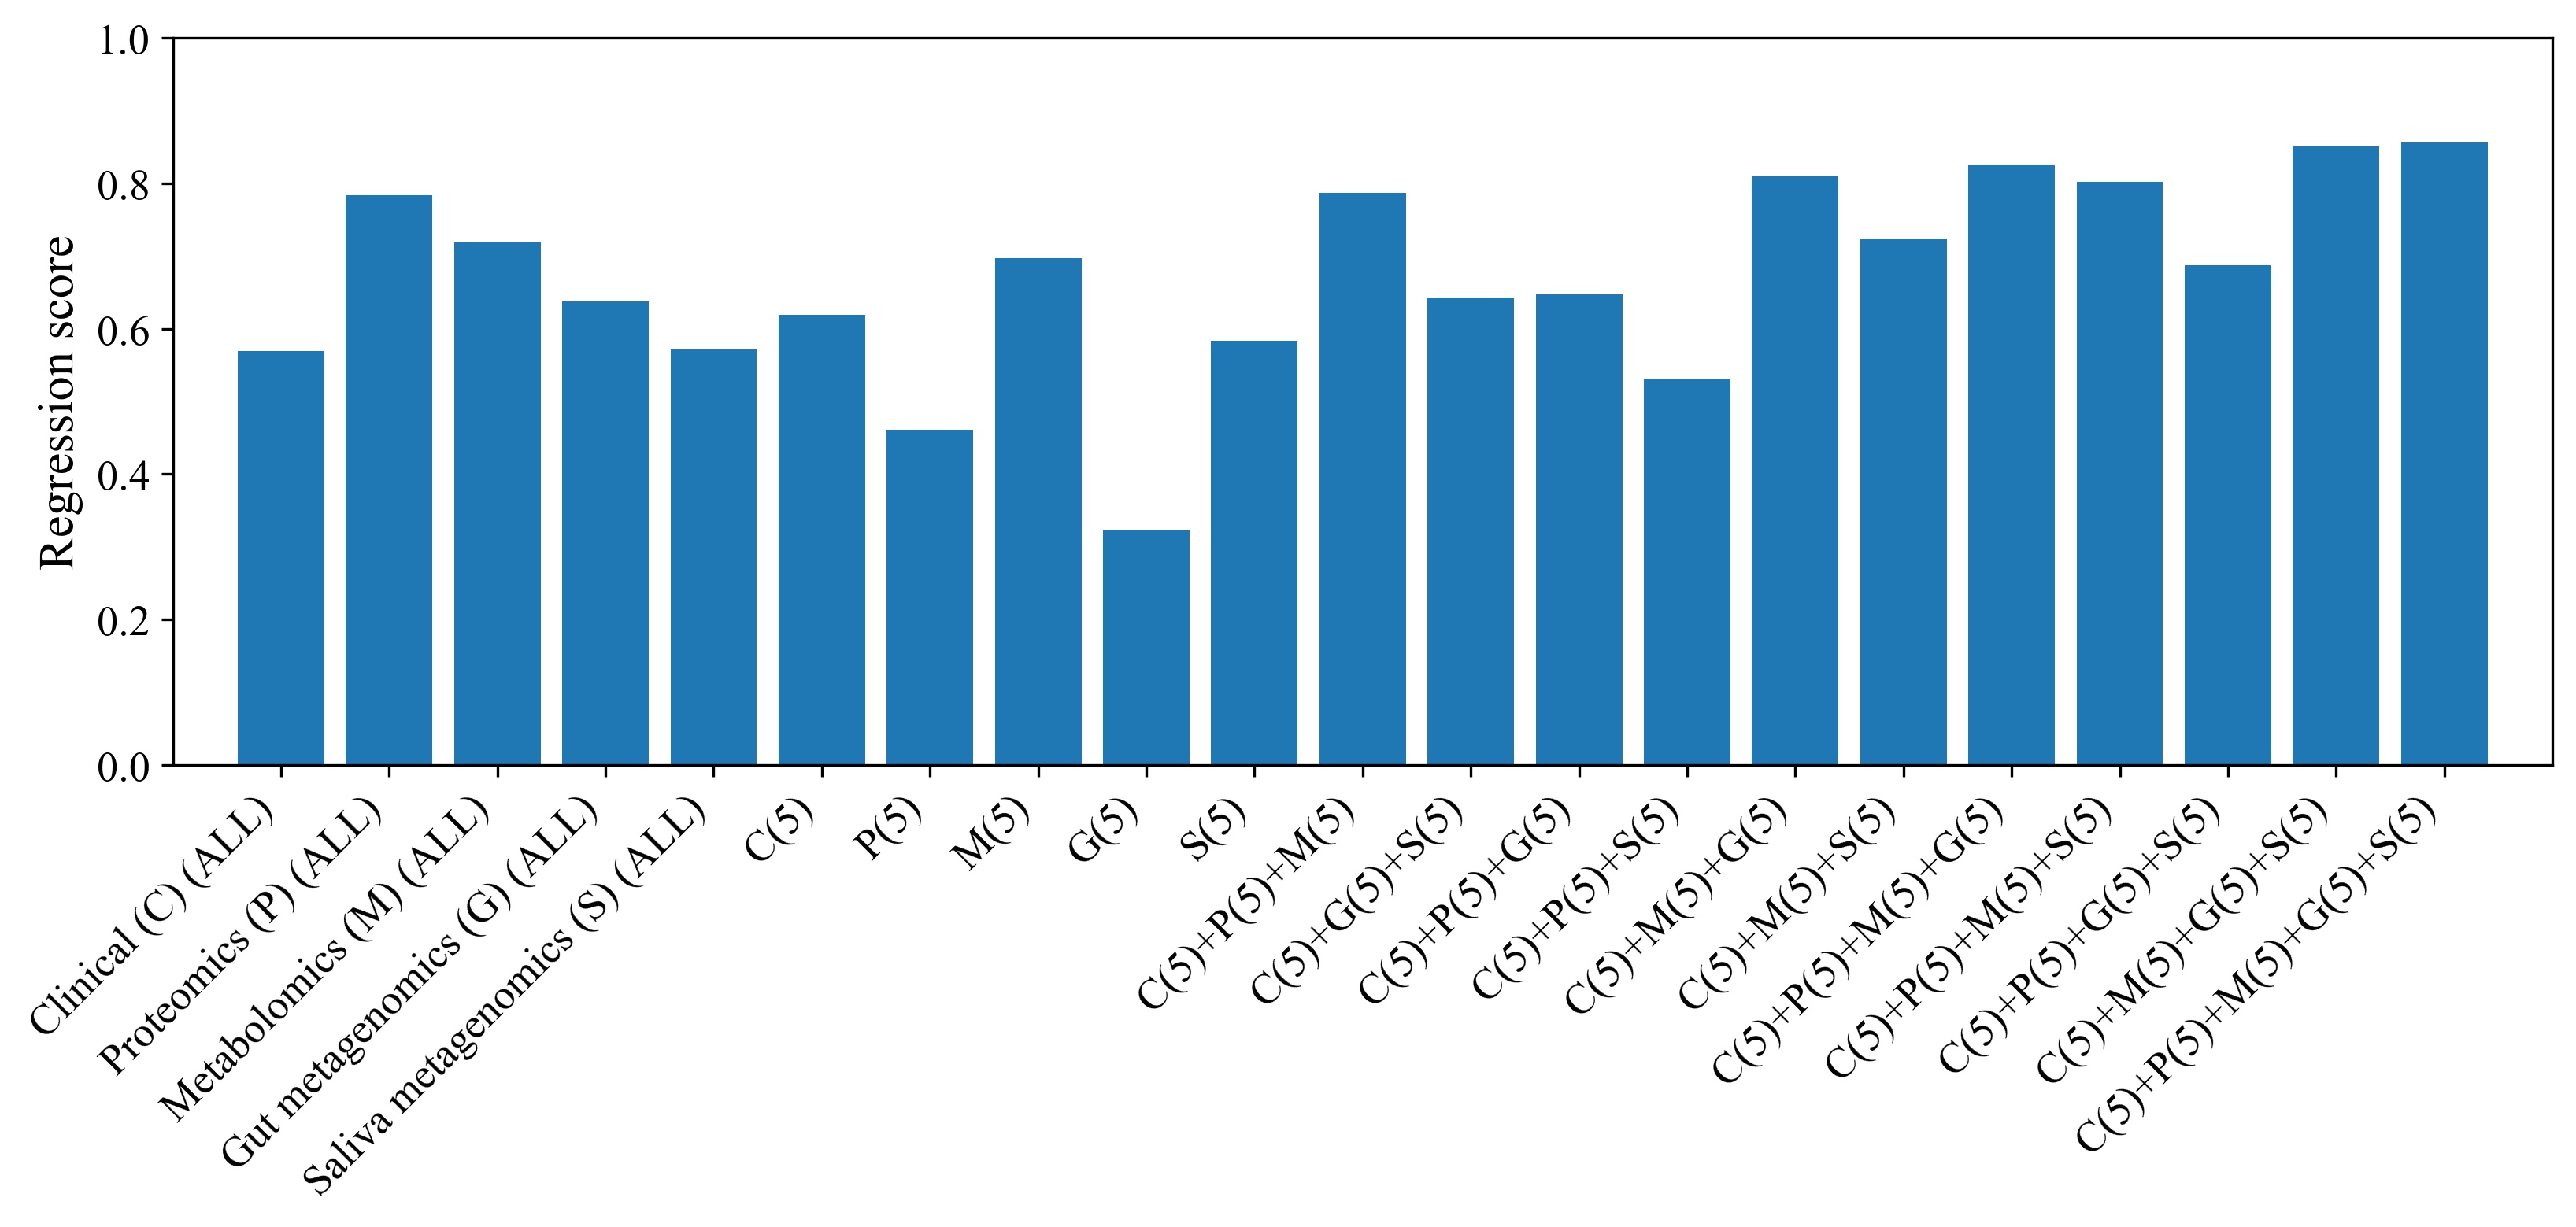

In [44]:
plt.rcParams['figure.figsize'] = [13.0, 4]
plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 7
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13

# Create bars
plt.bar(range(len(score_XGB)), score_XGB)

# # # Create names on the x-axis
plt.xticks(range(len(score_XGB)), labels, ha='right', rotation=45)
plt.xlim(-1, 21)
plt.ylim(0, 1.0)
plt.ylabel('Regression score', size=15)
# Show graphic
plt.show()

In [45]:
score_RF = []
labels = ['Clinical (C) (ALL)', 'Proteomics (P) (ALL)', 'Metabolomics (M) (ALL)', 'Gut metagenomics (G) (ALL)', 'Saliva metagenomics (S) (ALL)', 
           'C(5)', 'P(5)', 'M(5)', 'G(5)', 'S(5)', 'C(5)+P(5)+M(5)', 'C(5)+G(5)+S(5)', 'C(5)+P(5)+G(5)', 'C(5)+P(5)+S(5)', 'C(5)+M(5)+G(5)', 'C(5)+M(5)+S(5)',
           'C(5)+P(5)+M(5)+G(5)', 'C(5)+P(5)+M(5)+S(5)', 'C(5)+P(5)+G(5)+S(5)', 'C(5)+M(5)+G(5)+S(5)', 'C(5)+P(5)+M(5)+G(5)+S(5)']

X, y = df_clin.iloc[:, 2:].values, df_clin['ADAS-COG']
RF_regression_excute(X, y, max_depth = 5, n_estimators = 100)
print(labels[0], score_RF[-1])

X, y = df_prot.iloc[:, 1:].values, df_clin['ADAS-COG']
RF_regression_excute(X, y, max_depth = 5, n_estimators = 100)
print(labels[1], score_RF[-1])

X, y = df_meta.iloc[:, 1:].values, df_clin['ADAS-COG']
RF_regression_excute(X, y, max_depth = 5, n_estimators = 100)
print(labels[2], score_RF[-1])

X, y = df_gut.iloc[:, 1:].values, df_gut.merge(df_clin, on='Patient ID')['ADAS-COG']
RF_regression_excute(X, y, max_depth = 5, n_estimators = 100)
print(labels[3], score_RF[-1])

X, y = df_saliva.iloc[:, 1:].values, df_saliva.merge(df_clin, on='Patient ID')['ADAS-COG']
RF_regression_excute(X, y, max_depth = 5, n_estimators = 100)
print(labels[4], score_RF[-1])

X, y = df_clin_5.iloc[:, 1:].values, df_clin['ADAS-COG']
RF_regression_excute(X, y, max_depth = 6, n_estimators = 100)
print(labels[5], score_RF[-1])

X, y = df_prot_5.iloc[:, 1:].values, df_clin['ADAS-COG']
RF_regression_excute(X, y, max_depth = 5, n_estimators = 100)
print(labels[6], score_RF[-1])

X, y = df_meta_5.iloc[:, 1:].values, df_clin['ADAS-COG']
RF_regression_excute(X, y, max_depth = 5, n_estimators = 100)
print(labels[7], score_RF[-1])

X, y = df_gut_5.iloc[:, 1:].values, df_gut.merge(df_clin, on='Patient ID')['ADAS-COG']
RF_regression_excute(X, y, max_depth = 6, n_estimators = 100)
print(labels[8], score_RF[-1])

X, y = df_saliva_5.iloc[:, 1:].values, df_saliva.merge(df_clin, on='Patient ID')['ADAS-COG']
RF_regression_excute(X, y, max_depth = 6, n_estimators = 100)
print(labels[9], score_RF[-1])

df_train = df_clin_5.copy()
df_train = df_train.merge(df_prot_5, on='Patient ID')
df_train = df_train.merge(df_meta_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_clin['ADAS-COG']
RF_regression_excute(X, y, max_depth = 5, n_estimators = 100)
print(labels[10], score_RF[-1])

df_train = df_clin_5.copy()
df_train = df_train.merge(df_gut_5, on='Patient ID')
df_train = df_train.merge(df_saliva_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_gut.merge(df_saliva, on='Patient ID').merge(df_clin, on='Patient ID')['ADAS-COG']
RF_regression_excute(X, y, max_depth = 5, n_estimators = 100)
print(labels[11], score_RF[-1])

df_train = df_clin_5.copy()
df_train = df_train.merge(df_prot_5, on='Patient ID')
df_train = df_train.merge(df_gut_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_gut.merge(df_clin, on='Patient ID')['ADAS-COG']
RF_regression_excute(X, y, max_depth = 5, n_estimators = 100)
print(labels[12], score_RF[-1])

df_train = df_clin_5.copy()
df_train = df_train.merge(df_prot_5, on='Patient ID')
df_train = df_train.merge(df_saliva_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_saliva.merge(df_clin, on='Patient ID')['ADAS-COG']
RF_regression_excute(X, y, max_depth = 5, n_estimators = 100)
print(labels[13], score_RF[-1])

df_train = df_clin_5.copy()
df_train = df_train.merge(df_meta_5, on='Patient ID')
df_train = df_train.merge(df_gut_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_gut.merge(df_clin, on='Patient ID')['ADAS-COG']
RF_regression_excute(X, y, max_depth = 5, n_estimators = 100)
print(labels[14], score_RF[-1])


df_train = df_clin_5.copy()
df_train = df_train.merge(df_meta_5, on='Patient ID')
df_train = df_train.merge(df_saliva_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_saliva.merge(df_clin, on='Patient ID')['ADAS-COG']
RF_regression_excute(X, y, max_depth = 6, n_estimators = 100)
print(labels[15], score_RF[-1])


df_train = df_clin_5.copy()
df_train = df_train.merge(df_prot_5, on='Patient ID')
df_train = df_train.merge(df_meta_5, on='Patient ID')
df_train = df_train.merge(df_gut_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_gut.merge(df_clin, on='Patient ID')['ADAS-COG']
RF_regression_excute(X, y, max_depth = 6, n_estimators = 100)
print(labels[16], score_RF[-1])

df_train = df_clin_5.copy()
df_train = df_train.merge(df_prot_5, on='Patient ID')
df_train = df_train.merge(df_meta_5, on='Patient ID')
df_train = df_train.merge(df_saliva_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_saliva.merge(df_clin, on='Patient ID')['ADAS-COG']
RF_regression_excute(X, y, max_depth = 6, n_estimators = 100)
print(labels[17], score_RF[-1])


df_train = df_clin_5.copy()
df_train = df_train.merge(df_prot_5, on='Patient ID')
df_train = df_train.merge(df_gut_5, on='Patient ID')
df_train = df_train.merge(df_saliva_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_gut.merge(df_saliva, on='Patient ID').merge(df_clin, on='Patient ID')['ADAS-COG']
RF_regression_excute(X, y, max_depth = 6, n_estimators = 100)
print(labels[18], score_RF[-1])

df_train = df_clin_5.copy()
df_train = df_train.merge(df_meta_5, on='Patient ID')
df_train = df_train.merge(df_gut_5, on='Patient ID')
df_train = df_train.merge(df_saliva_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_gut.merge(df_saliva, on='Patient ID').merge(df_clin, on='Patient ID')['ADAS-COG']
RF_regression_excute(X, y, max_depth = 6, n_estimators = 100)
print(labels[19], score_RF[-1])

df_train = df_clin_5.copy()
df_train = df_train.merge(df_prot_5, on='Patient ID')
df_train = df_train.merge(df_meta_5, on='Patient ID')
df_train = df_train.merge(df_gut_5, on='Patient ID')
df_train = df_train.merge(df_saliva_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_gut.merge(df_saliva, on='Patient ID').merge(df_clin, on='Patient ID')['ADAS-COG']
RF_regression_excute(X, y, max_depth = None, n_estimators = 500)
print(labels[20], score_RF[-1])

Clinical (C) (ALL) 0.3132595961082507
Proteomics (P) (ALL) 0.5635264805477098
Metabolomics (M) (ALL) 0.6102294617366394
Gut metagenomics (G) (ALL) 0.47816549246920803
Saliva metagenomics (S) (ALL) 0.5230603630432086
C(5) 0.27714993045539715
P(5) 0.524638684132529
M(5) 0.6329435631486214
G(5) 0.31420565738654194
S(5) 0.47979762889945665
C(5)+P(5)+M(5) 0.6494430820080364
C(5)+G(5)+S(5) 0.494051609857184
C(5)+P(5)+G(5) 0.5752383780512724
C(5)+P(5)+S(5) 0.4211795344451815
C(5)+M(5)+G(5) 0.6815596643464485
C(5)+M(5)+S(5) 0.6328558765219896
C(5)+P(5)+M(5)+G(5) 0.7037647114592281
C(5)+P(5)+M(5)+S(5) 0.6523765196829014
C(5)+P(5)+G(5)+S(5) 0.6001748385854961
C(5)+M(5)+G(5)+S(5) 0.6653849678850956
C(5)+P(5)+M(5)+G(5)+S(5) 0.7019771039038494


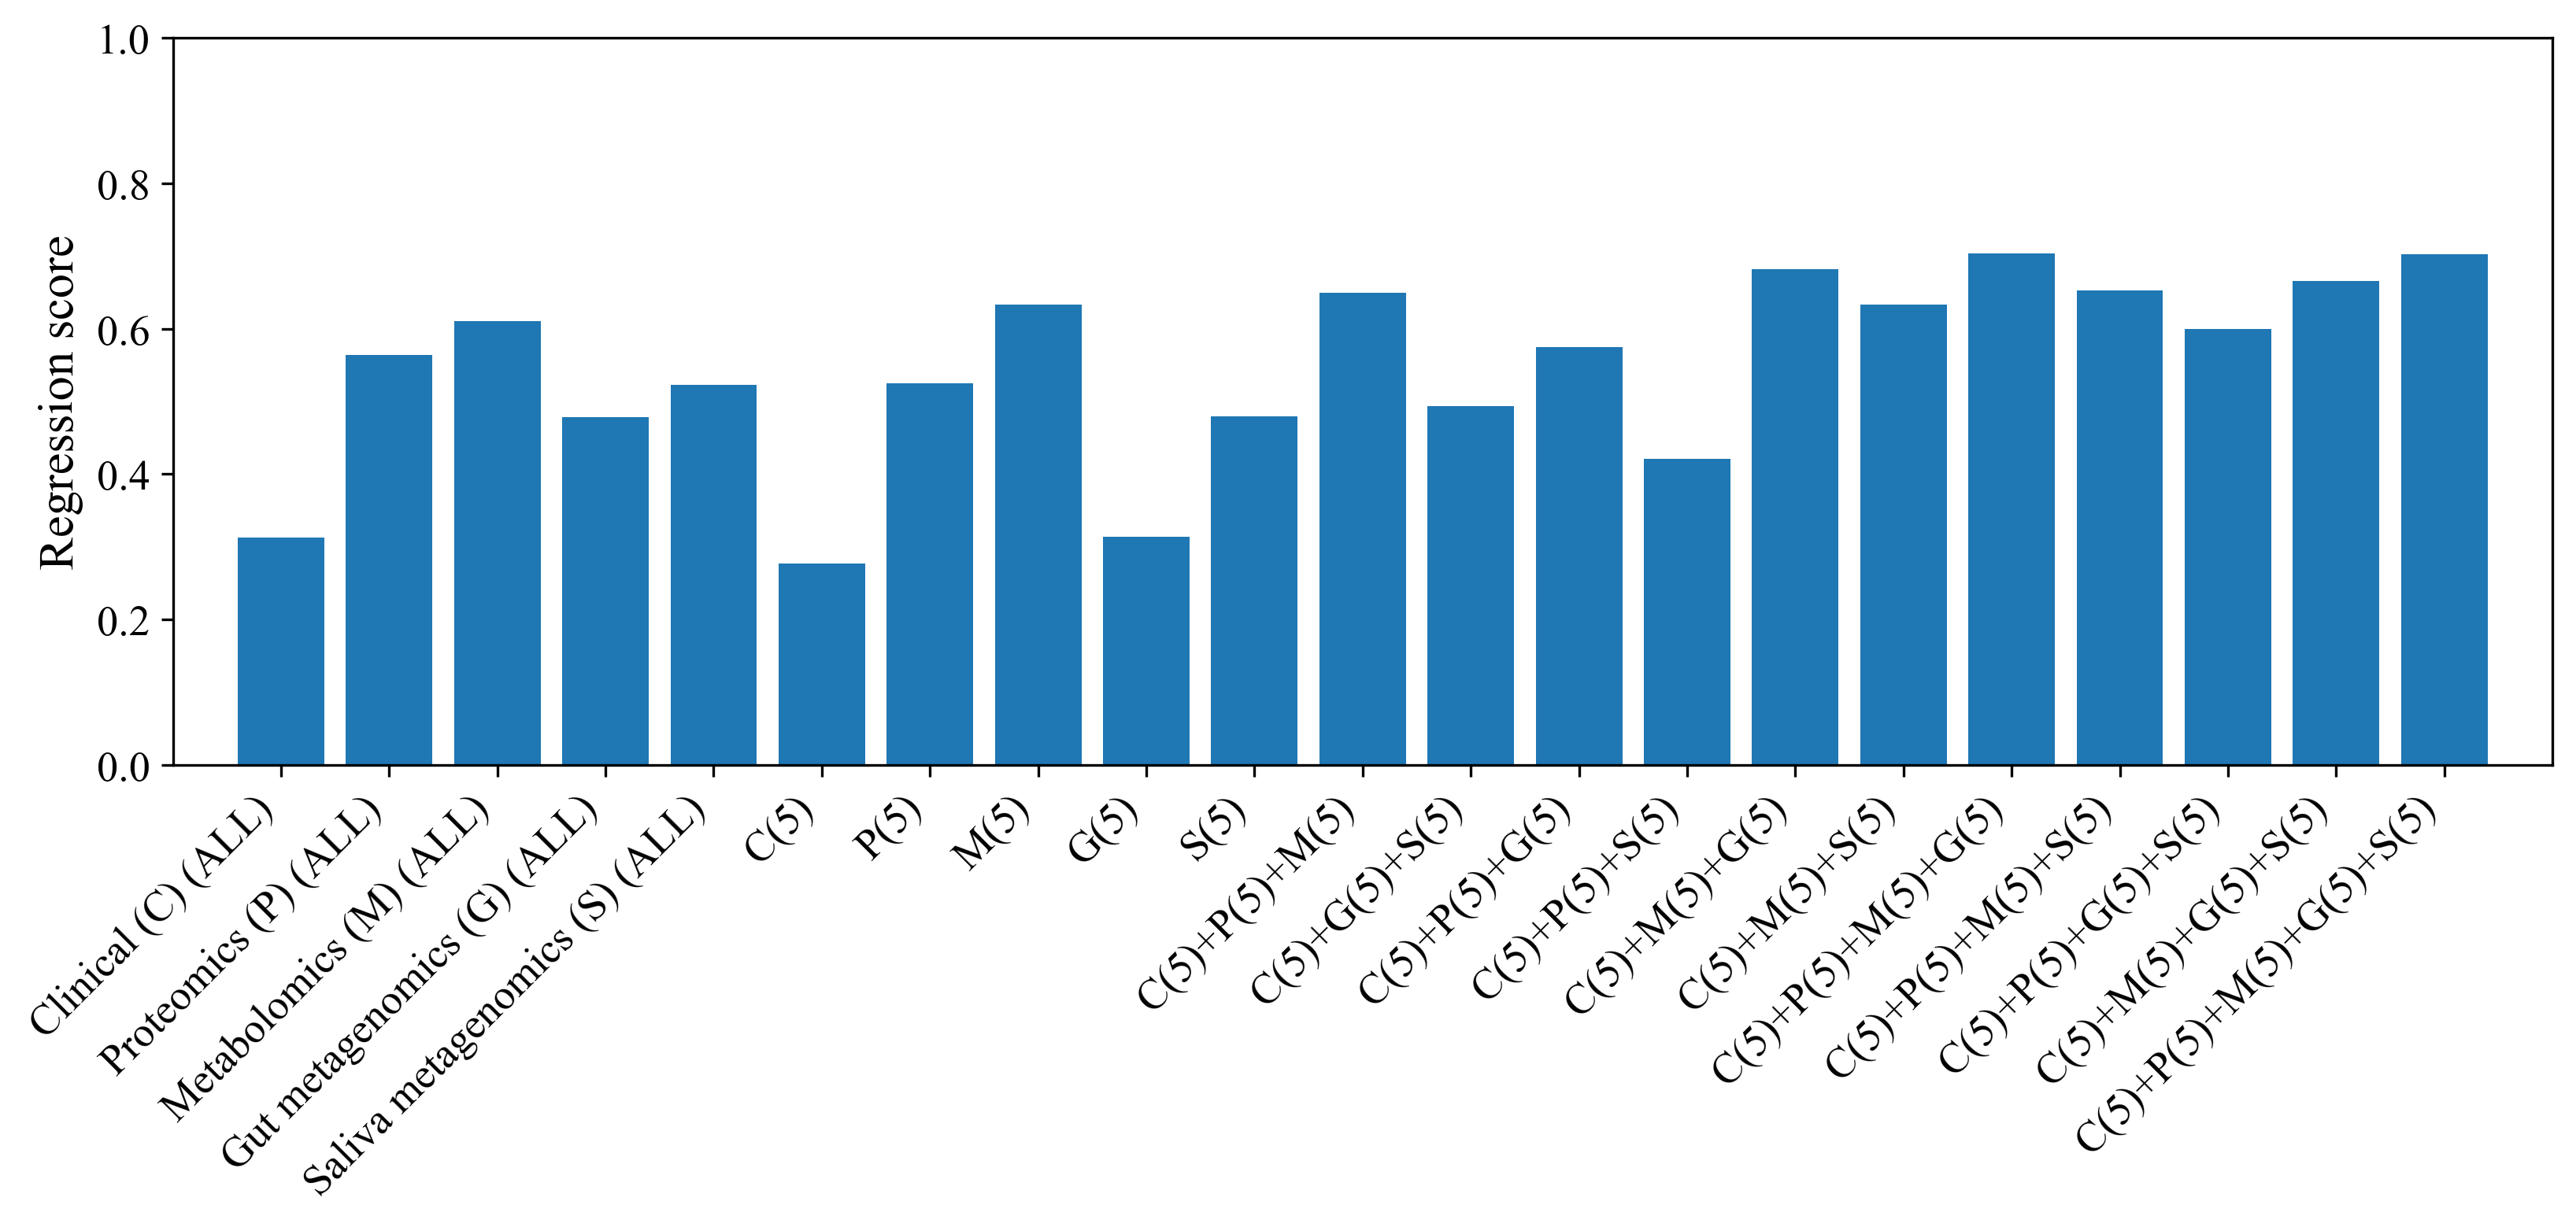

In [46]:
plt.rcParams['figure.figsize'] = [13.0, 4]
plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 7
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13

# Create bars
plt.bar(range(len(score_RF)), score_RF)

# # # Create names on the x-axis
plt.xticks(range(len(score_RF)), labels, ha='right', rotation=45)
plt.xlim(-1, 21)
plt.ylim(0, 1.0)
plt.ylabel('Regression score', size=15)
# Show graphic
plt.show()

In [47]:
from sklearn.ensemble import AdaBoostRegressor
def ADA_regression_excute(X, y, learning_rate=1.0, n_estimators=100):
    regr = AdaBoostRegressor(learning_rate=learning_rate, n_estimators=n_estimators, random_state=0).fit(X, y)
    score_ADA.append(r2_score(regr.predict(X), y))


score_ADA = []
labels = ['Clinical (C) (ALL)', 'Proteomics (P) (ALL)', 'Metabolomics (M) (ALL)', 'Gut metagenomics (G) (ALL)', 'Saliva metagenomics (S) (ALL)', 
           'C(5)', 'P(5)', 'M(5)', 'G(5)', 'S(5)', 'C(5)+P(5)+M(5)', 'C(5)+G(5)+S(5)', 'C(5)+P(5)+G(5)', 'C(5)+P(5)+S(5)', 'C(5)+M(5)+G(5)', 'C(5)+M(5)+S(5)',
           'C(5)+P(5)+M(5)+G(5)', 'C(5)+P(5)+M(5)+S(5)', 'C(5)+P(5)+G(5)+S(5)', 'C(5)+M(5)+G(5)+S(5)', 'C(5)+P(5)+M(5)+G(5)+S(5)']

X, y = df_clin.iloc[:, 2:].values, df_clin['ADAS-COG']
ADA_regression_excute(X, y, learning_rate=0.05, n_estimators=40)
print(labels[0], score_ADA[-1])

X, y = df_prot.iloc[:, 1:].values, df_clin['ADAS-COG']
ADA_regression_excute(X, y, learning_rate=0.005, n_estimators=20)
print(labels[1], score_ADA[-1])

X, y = df_meta.iloc[:, 1:].values, df_clin['ADAS-COG']
ADA_regression_excute(X, y, learning_rate=0.008, n_estimators=30)
print(labels[2], score_ADA[-1])

X, y = df_gut.iloc[:, 1:].values, df_gut.merge(df_clin, on='Patient ID')['ADAS-COG']
ADA_regression_excute(X, y, learning_rate=0.007, n_estimators=20)
print(labels[3], score_ADA[-1])

X, y = df_saliva.iloc[:, 1:].values, df_saliva.merge(df_clin, on='Patient ID')['ADAS-COG']
ADA_regression_excute(X, y, learning_rate=0.007, n_estimators=20)
print(labels[4], score_ADA[-1])

X, y = df_clin_5.iloc[:, 1:].values, df_clin['ADAS-COG']
ADA_regression_excute(X, y, learning_rate=1.5, n_estimators=100)
print(labels[5], score_ADA[-1])

X, y = df_prot_5.iloc[:, 1:].values, df_clin['ADAS-COG']
ADA_regression_excute(X, y, learning_rate=0.5, n_estimators=100)
print(labels[6], score_ADA[-1])

X, y = df_meta_5.iloc[:, 1:].values, df_clin['ADAS-COG']
ADA_regression_excute(X, y, learning_rate=0.5, n_estimators=40)
print(labels[7], score_ADA[-1])

X, y = df_gut_5.iloc[:, 1:].values, df_gut.merge(df_clin, on='Patient ID')['ADAS-COG']
ADA_regression_excute(X, y, learning_rate=0.8, n_estimators=100)
print(labels[8], score_ADA[-1])

X, y = df_saliva_5.iloc[:, 1:].values, df_saliva.merge(df_clin, on='Patient ID')['ADAS-COG']
ADA_regression_excute(X, y, learning_rate=0.5, n_estimators=100)
print(labels[9], score_ADA[-1])

df_train = df_clin_5.copy()
df_train = df_train.merge(df_prot_5, on='Patient ID')
df_train = df_train.merge(df_meta_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_clin['ADAS-COG']
ADA_regression_excute(X, y, learning_rate=0.01, n_estimators=40)
print(labels[10], score_ADA[-1])

df_train = df_clin_5.copy()
df_train = df_train.merge(df_gut_5, on='Patient ID')
df_train = df_train.merge(df_saliva_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_gut.merge(df_saliva, on='Patient ID').merge(df_clin, on='Patient ID')['ADAS-COG']
ADA_regression_excute(X, y, learning_rate=0.1, n_estimators=50)
print(labels[11], score_ADA[-1])

df_train = df_clin_5.copy()
df_train = df_train.merge(df_prot_5, on='Patient ID')
df_train = df_train.merge(df_gut_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_gut.merge(df_clin, on='Patient ID')['ADAS-COG']
ADA_regression_excute(X, y, learning_rate=0.1, n_estimators=50)
print(labels[12], score_ADA[-1])

df_train = df_clin_5.copy()
df_train = df_train.merge(df_prot_5, on='Patient ID')
df_train = df_train.merge(df_saliva_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_saliva.merge(df_clin, on='Patient ID')['ADAS-COG']
ADA_regression_excute(X, y, learning_rate=0.5, n_estimators=50)
print(labels[13], score_ADA[-1])

df_train = df_clin_5.copy()
df_train = df_train.merge(df_meta_5, on='Patient ID')
df_train = df_train.merge(df_gut_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_gut.merge(df_clin, on='Patient ID')['ADAS-COG']
ADA_regression_excute(X, y, learning_rate=0.05, n_estimators=40)
print(labels[14], score_ADA[-1])


df_train = df_clin_5.copy()
df_train = df_train.merge(df_meta_5, on='Patient ID')
df_train = df_train.merge(df_saliva_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_saliva.merge(df_clin, on='Patient ID')['ADAS-COG']
ADA_regression_excute(X, y, learning_rate=0.01, n_estimators=40)
print(labels[15], score_ADA[-1])


df_train = df_clin_5.copy()
df_train = df_train.merge(df_prot_5, on='Patient ID')
df_train = df_train.merge(df_meta_5, on='Patient ID')
df_train = df_train.merge(df_gut_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_gut.merge(df_clin, on='Patient ID')['ADAS-COG']
ADA_regression_excute(X, y, learning_rate=0.09, n_estimators=40)
print(labels[16], score_ADA[-1])

df_train = df_clin_5.copy()
df_train = df_train.merge(df_prot_5, on='Patient ID')
df_train = df_train.merge(df_meta_5, on='Patient ID')
df_train = df_train.merge(df_saliva_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_saliva.merge(df_clin, on='Patient ID')['ADAS-COG']
ADA_regression_excute(X, y, learning_rate=0.1, n_estimators=40)
print(labels[17], score_ADA[-1])


df_train = df_clin_5.copy()
df_train = df_train.merge(df_prot_5, on='Patient ID')
df_train = df_train.merge(df_gut_5, on='Patient ID')
df_train = df_train.merge(df_saliva_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_gut.merge(df_saliva, on='Patient ID').merge(df_clin, on='Patient ID')['ADAS-COG']
ADA_regression_excute(X, y, learning_rate=0.1, n_estimators=40)
print(labels[18], score_ADA[-1])

df_train = df_clin_5.copy()
df_train = df_train.merge(df_meta_5, on='Patient ID')
df_train = df_train.merge(df_gut_5, on='Patient ID')
df_train = df_train.merge(df_saliva_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_gut.merge(df_saliva, on='Patient ID').merge(df_clin, on='Patient ID')['ADAS-COG']
ADA_regression_excute(X, y, learning_rate=0.01, n_estimators=40)
print(labels[19], score_ADA[-1])

df_train = df_clin_5.copy()
df_train = df_train.merge(df_prot_5, on='Patient ID')
df_train = df_train.merge(df_meta_5, on='Patient ID')
df_train = df_train.merge(df_gut_5, on='Patient ID')
df_train = df_train.merge(df_saliva_5, on='Patient ID')
X, y = df_train.iloc[:, 1:].values, df_gut.merge(df_saliva, on='Patient ID').merge(df_clin, on='Patient ID')['ADAS-COG']
ADA_regression_excute(X, y, learning_rate=0.08, n_estimators=50)
print(labels[20], score_ADA[-1])

Clinical (C) (ALL) 0.30956482096074767
Proteomics (P) (ALL) 0.5782965400463415
Metabolomics (M) (ALL) 0.7406674149014979
Gut metagenomics (G) (ALL) 0.5230628594593727
Saliva metagenomics (S) (ALL) 0.32691370747308135
C(5) 0.2261929460266049
P(5) 0.37332055512590934
M(5) 0.6808505306219936
G(5) 0.15475431664961647
S(5) 0.3265040839069281
C(5)+P(5)+M(5) 0.5359285576723982
C(5)+G(5)+S(5) 0.6507715513146339
C(5)+P(5)+G(5) 0.6920978308478425
C(5)+P(5)+S(5) 0.660248601790592
C(5)+M(5)+G(5) 0.7221499807899757
C(5)+M(5)+S(5) 0.5968379899020902
C(5)+P(5)+M(5)+G(5) 0.8217931679212113
C(5)+P(5)+M(5)+S(5) 0.7279668239836579
C(5)+P(5)+G(5)+S(5) 0.6473352716646477
C(5)+M(5)+G(5)+S(5) 0.8003797831306394
C(5)+P(5)+M(5)+G(5)+S(5) 0.8367678904726604


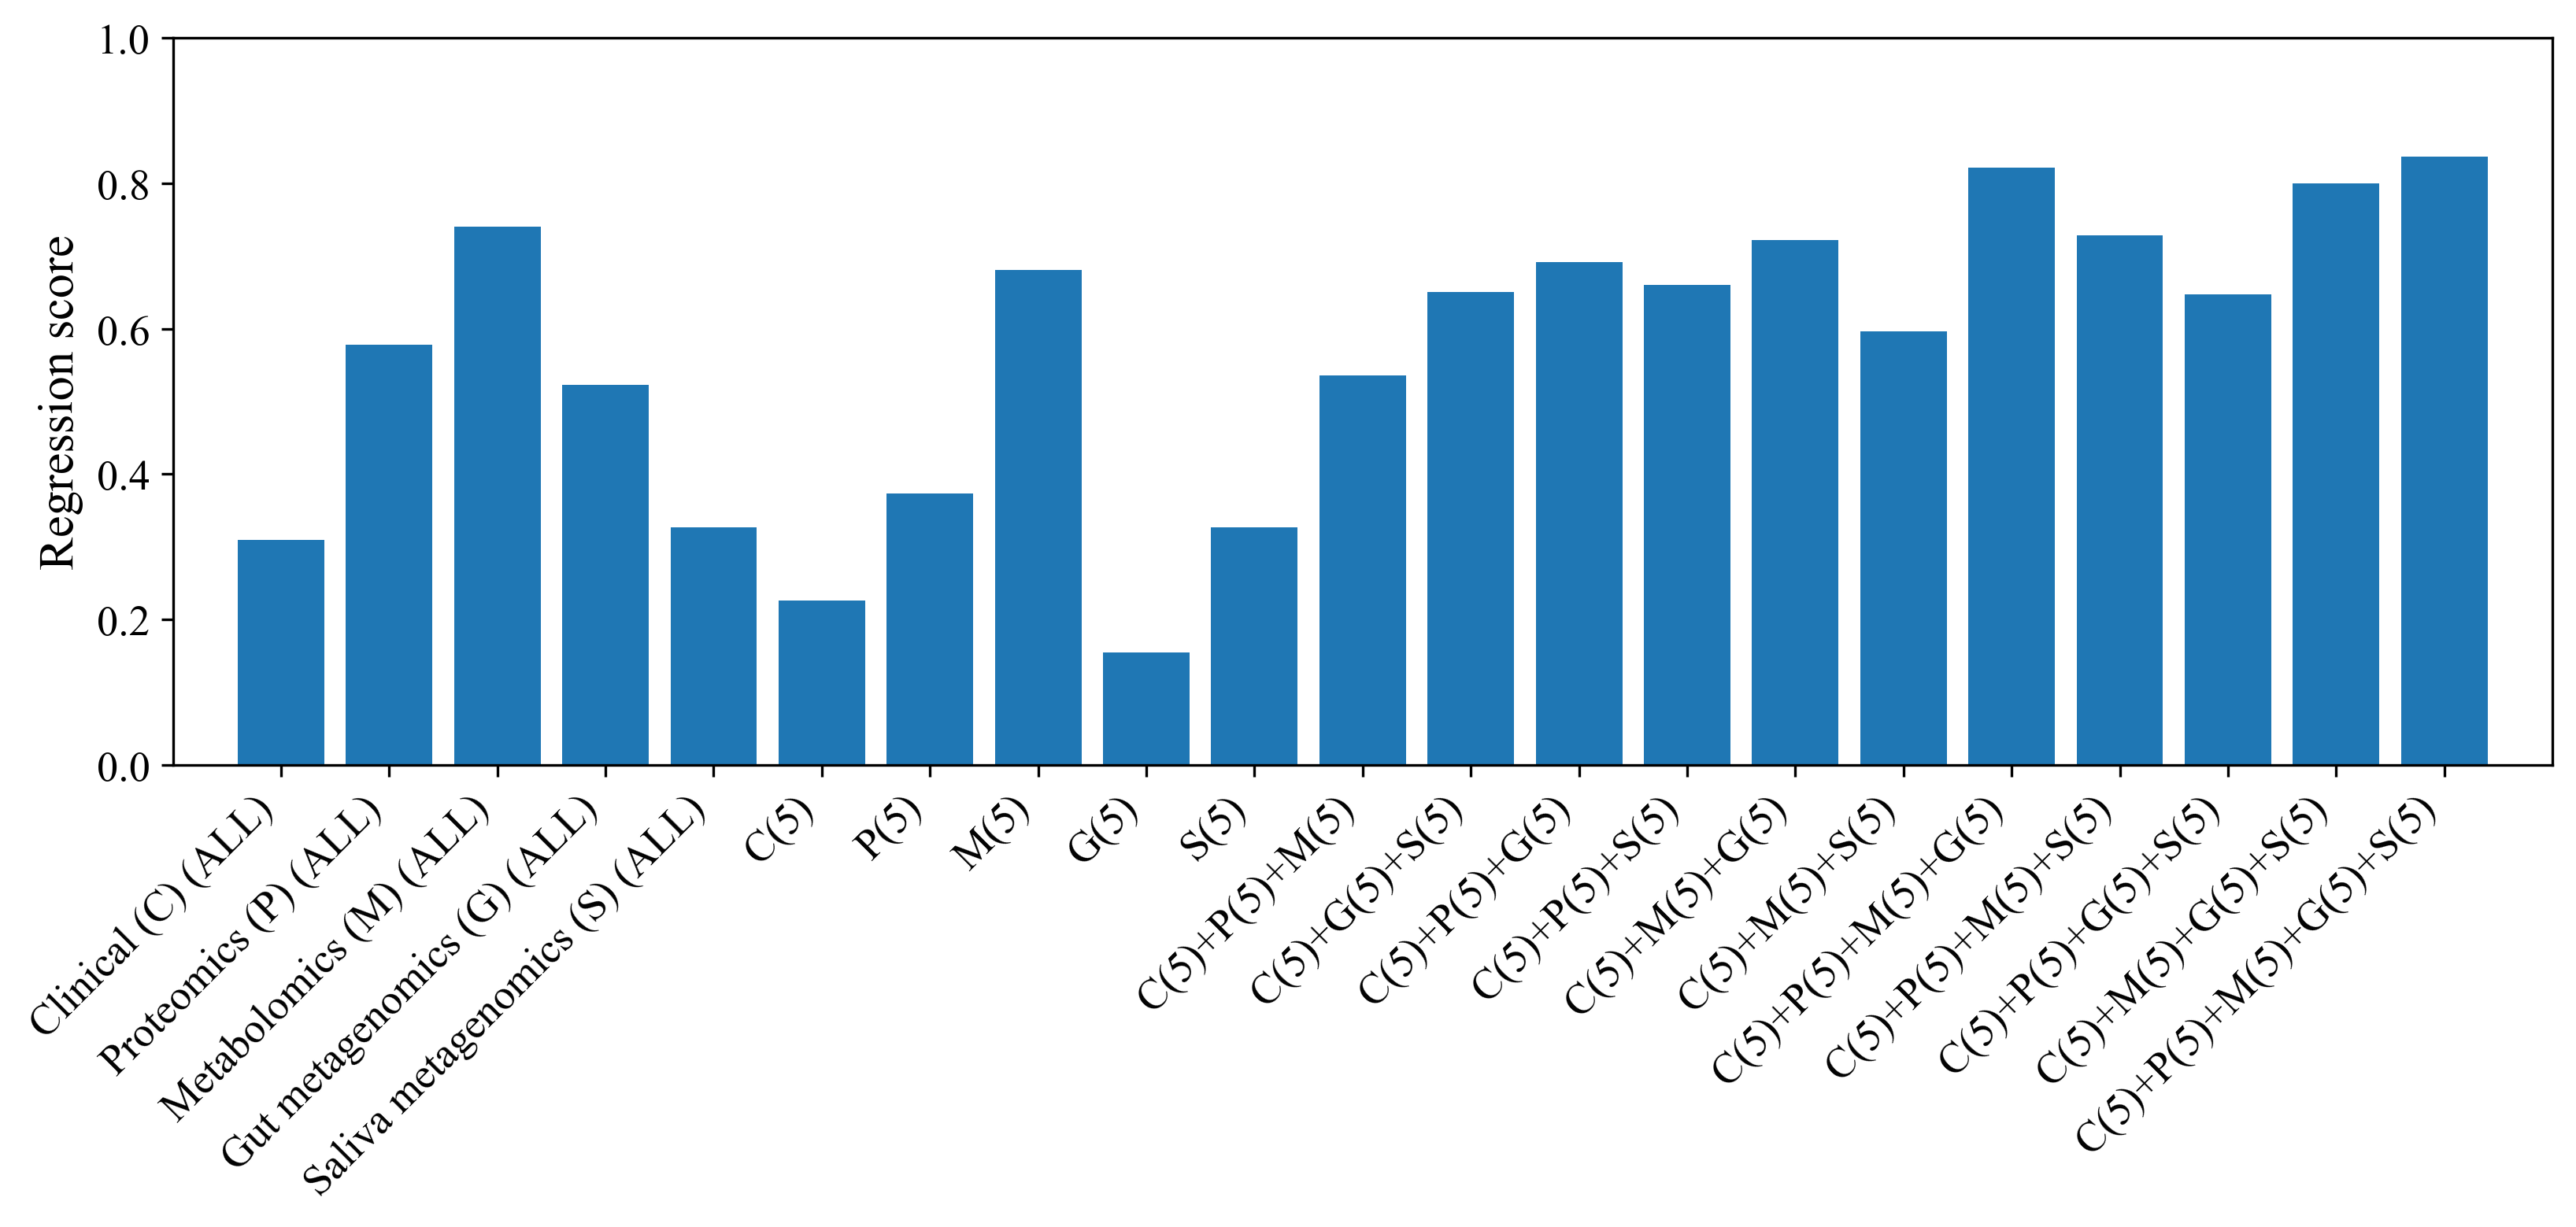

In [48]:
plt.rcParams['figure.figsize'] = [13.0, 4]
plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 7
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13

# Create bars
plt.bar(range(len(score_ADA)), score_ADA)

# # # Create names on the x-axis
plt.xticks(range(len(score_ADA)), labels, ha='right', rotation=45)
plt.xlim(-1, 21)
plt.ylim(0, 1.0)
plt.ylabel('Regression score', size=15)
# Show graphic
plt.show()

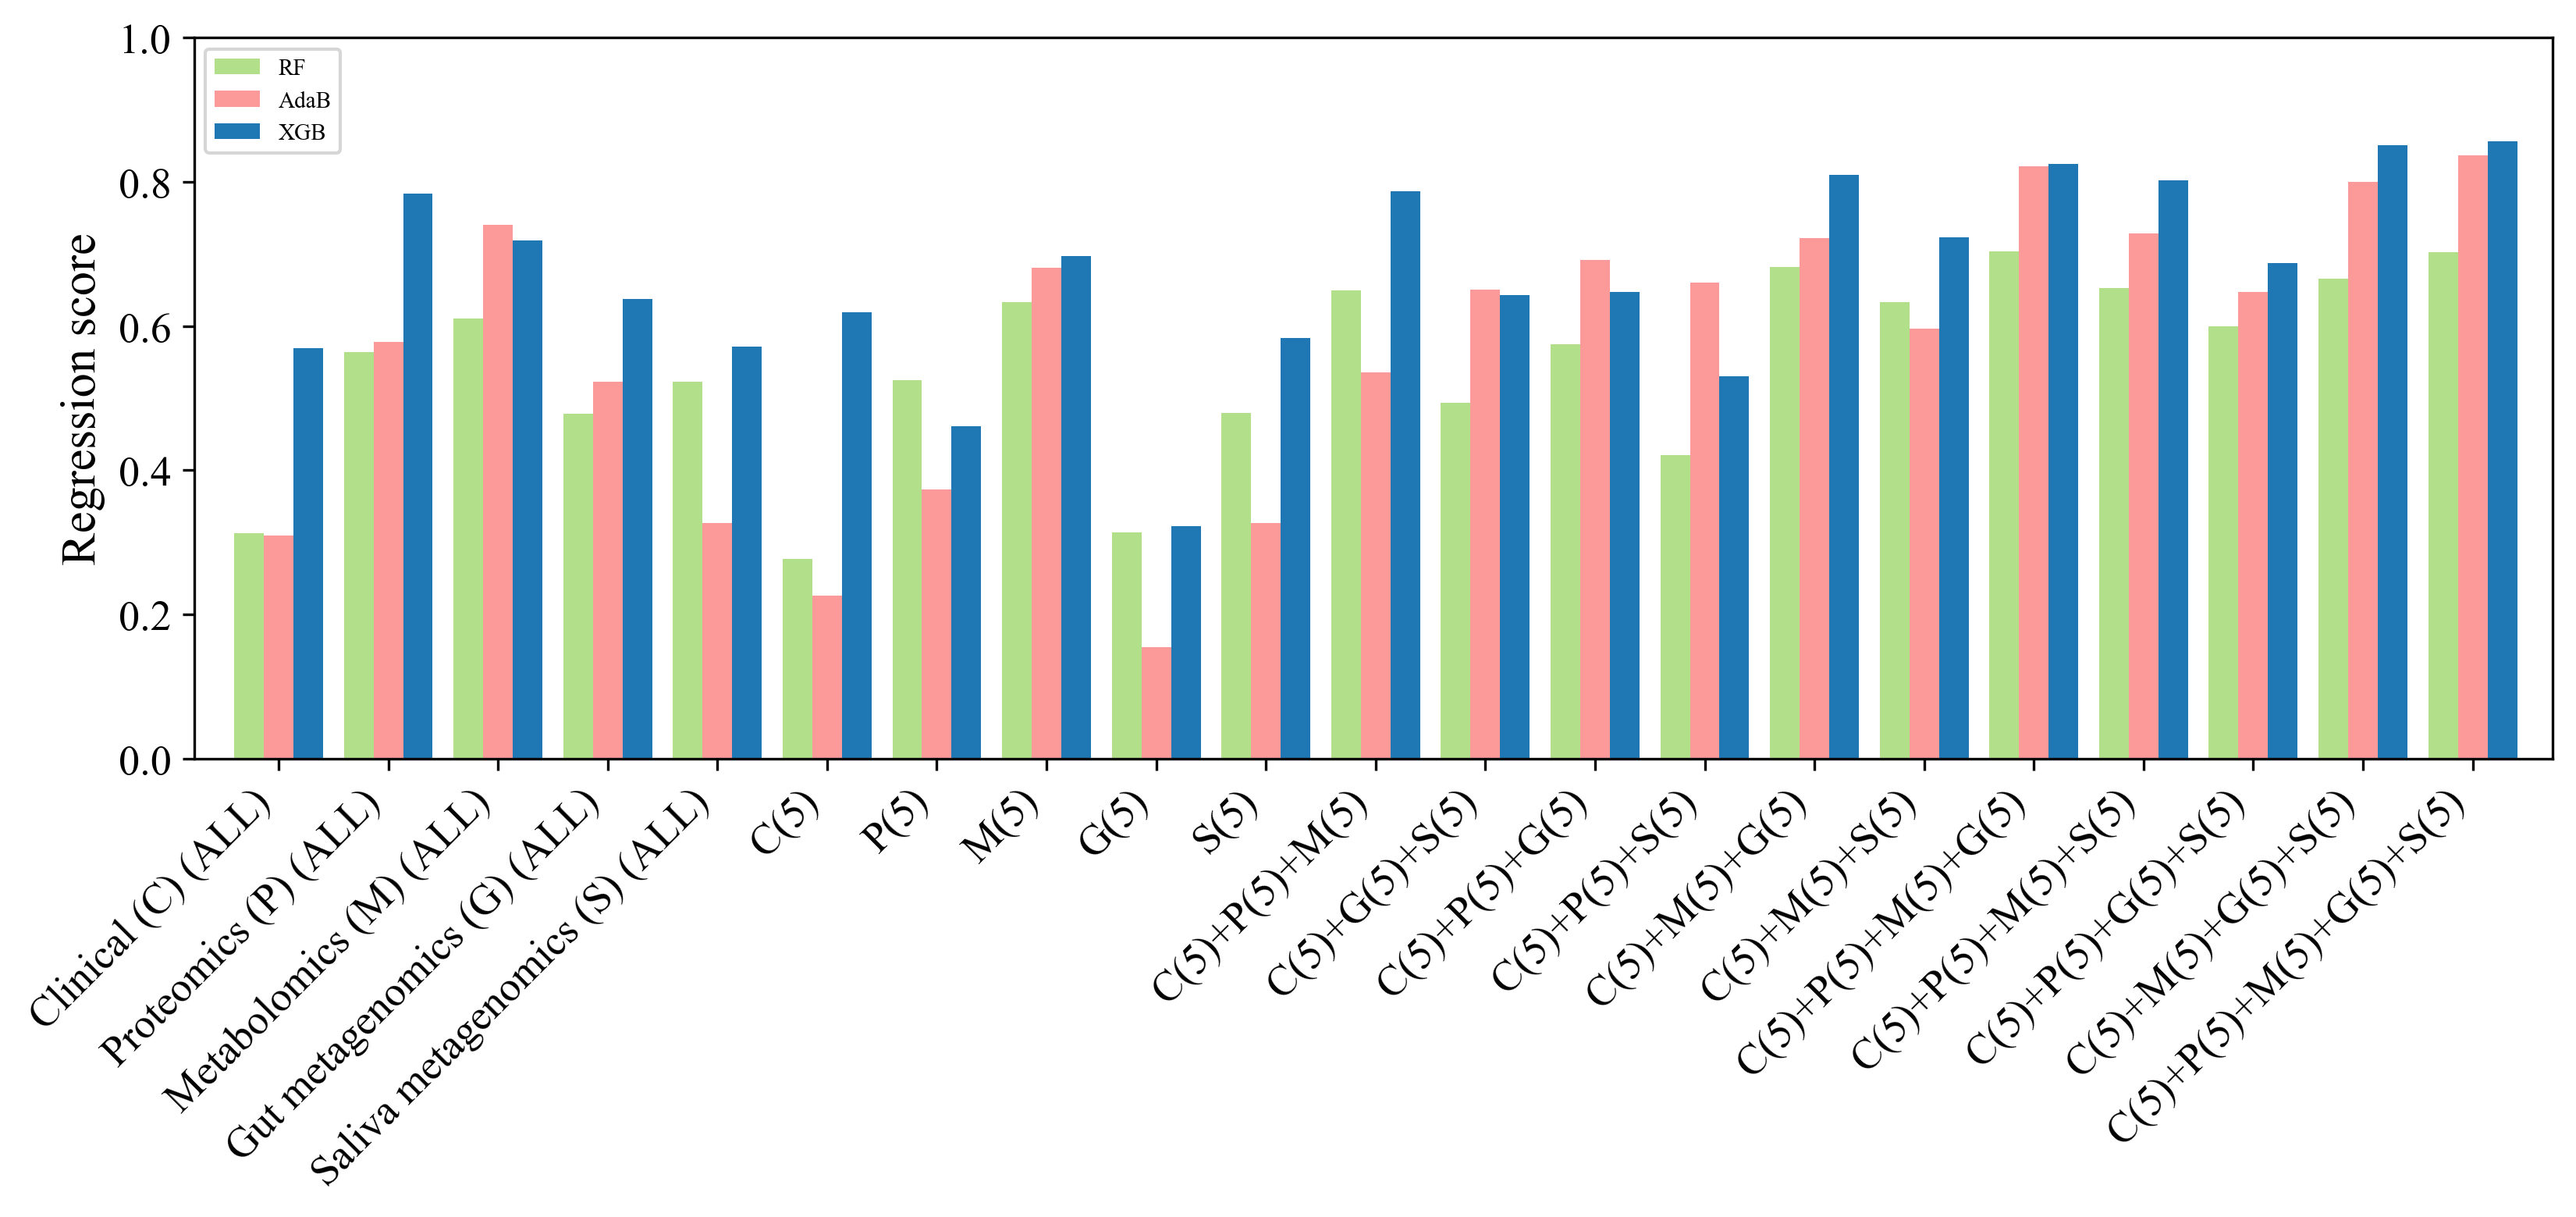

In [50]:
# Create bars
width = 0.27  # width of the bars
plt.bar(np.arange(len(score_RF)), score_RF, width=width, label='RF', color = '#b2df8a')
plt.bar(np.arange(len(score_ADA)) + width, score_ADA, width=width, label='AdaB', color = '#fb9a99')
plt.bar(np.arange(len(score_XGB)) + 2*width, score_XGB, width=width, label='XGB', color = '#1f77b4')

positions = np.arange(len(score_ADA)) + width

# Set x-axis labels and tick positions
plt.xticks(positions, labels, rotation=45, ha='right')

# Set x and y limits
plt.xlim(-0.5, 21)
plt.ylim(0, 1.0)

# Set y-axis label
plt.ylabel('Regression score', size=15)

# Show legend
plt.legend()

# Show graphic
plt.show()